# (A) Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# (B) Dataset

### Downloading the dataset via kaggle api
- [Kaggle  Dataset](https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset?datasetId=1169027&sortBy=voteCount)

In [2]:
# Download kaggle api
!pip install -q kaggle

In [3]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [4]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [5]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [6]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download your data "Competition-name"
#! kaggle competitions download -c 'competition-name'
!kaggle datasets download -d fedesoriano/traffic-prediction-dataset

  0% 0.00/277k [00:00<?, ?B/s]
100% 277k/277k [00:00<00:00, 86.7MB/s]


In [8]:
!unzip traffic-prediction-dataset

Archive:  traffic-prediction-dataset.zip
  inflating: traffic.csv             


In [9]:
!ls

sample_data  traffic.csv  traffic-prediction-dataset.zip


## Loading the dataset

In [10]:
df = pd.read_csv("traffic.csv") #header=None, delimiter=r"\s+",names=columns
target_var = "Vehicles"
df.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

## Dataset Information

Investors are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months.

## Attributes & Stats of the dataset

In [11]:
# statistical info
df.describe()

Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10

In [12]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

DateTime    14592
Junction        4
Vehicles      141
ID          48120
dtype: int64

In [14]:
# Subvalues of the categorical datas
for col in df.select_dtypes(include=["object"]):
    print(f"{col}\n" ,df[col].value_counts(), end="\n"*2)

DateTime
 2017-06-30 23:00:00    4
2017-03-02 02:00:00    4
2017-03-02 16:00:00    4
2017-03-02 15:00:00    4
2017-03-02 14:00:00    4
                      ..
2016-05-21 19:00:00    3
2016-05-21 20:00:00    3
2016-05-21 21:00:00    3
2016-05-21 22:00:00    3
2016-08-31 00:00:00    3
Name: DateTime, Length: 14592, dtype: int64



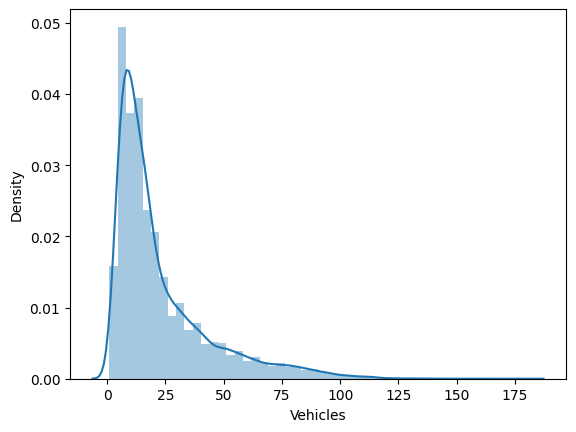

In [15]:
sns.distplot(df[target_var]);

# (C) Preprocessing the dataset

### Adjusting Variables


In [16]:
# dropping the unnessesary columns
df = df.drop(["ID"], axis=1) 

In [17]:
# Type Casting
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [18]:
df_J = df.pivot(columns="Junction", index="DateTime")
df_J

Vehicles                  
Junction                   1     2     3     4
DateTime                                      
2015-11-01 00:00:00     15.0   6.0   9.0   NaN
2015-11-01 01:00:00     13.0   6.0   7.0   NaN
2015-11-01 02:00:00     10.0   5.0   5.0   NaN
2015-11-01 03:00:00      7.0   6.0   1.0   NaN
2015-11-01 04:00:00      9.0   7.0   2.0   NaN
...                      ...   ...   ...   ...
2017-06-30 19:00:00    105.0  34.0  33.0  11.0
2017-06-30 20:00:00     96.0  35.0  31.0  30.0
2017-06-30 21:00:00     90.0  31.0  28.0  16.0
2017-06-30 22:00:00     84.0  29.0  26.0  22.0
2017-06-30 23:00:00     78.0  27.0  39.0  12.0

[14592 rows x 4 columns]

In [19]:
for col in df.select_dtypes(include=("object")).columns: df[col] = df[col].astype("category")

In [20]:
num_cols = df.select_dtypes(exclude=["object","category"]).columns
cat_cols = df.select_dtypes(include=["object","category"]).columns

len(num_cols), len(cat_cols)

(3, 0)

## (1) Quick (EDA) Checks

### Checking the Variable Relations
- Checking the Variable Relations for deterninating variables which we will be focued on 

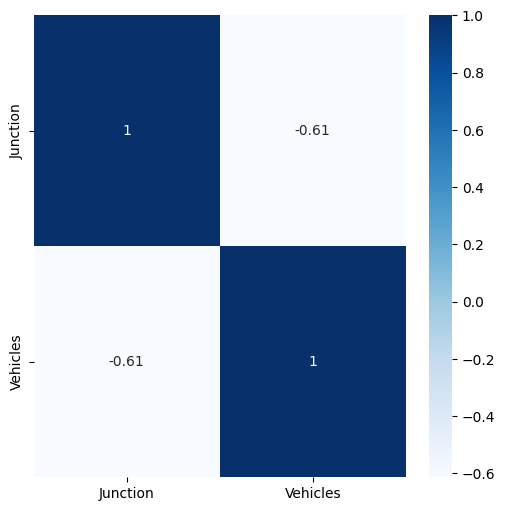

In [21]:
# Extracting the relations
corr = df.corr()

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(col_size*2,col_size*2))

# Plotting
sns.heatmap(corr, annot=True, cmap="Blues");

Text(0.5, 1.0, 'Negative Correlation (neg> 0.7)')

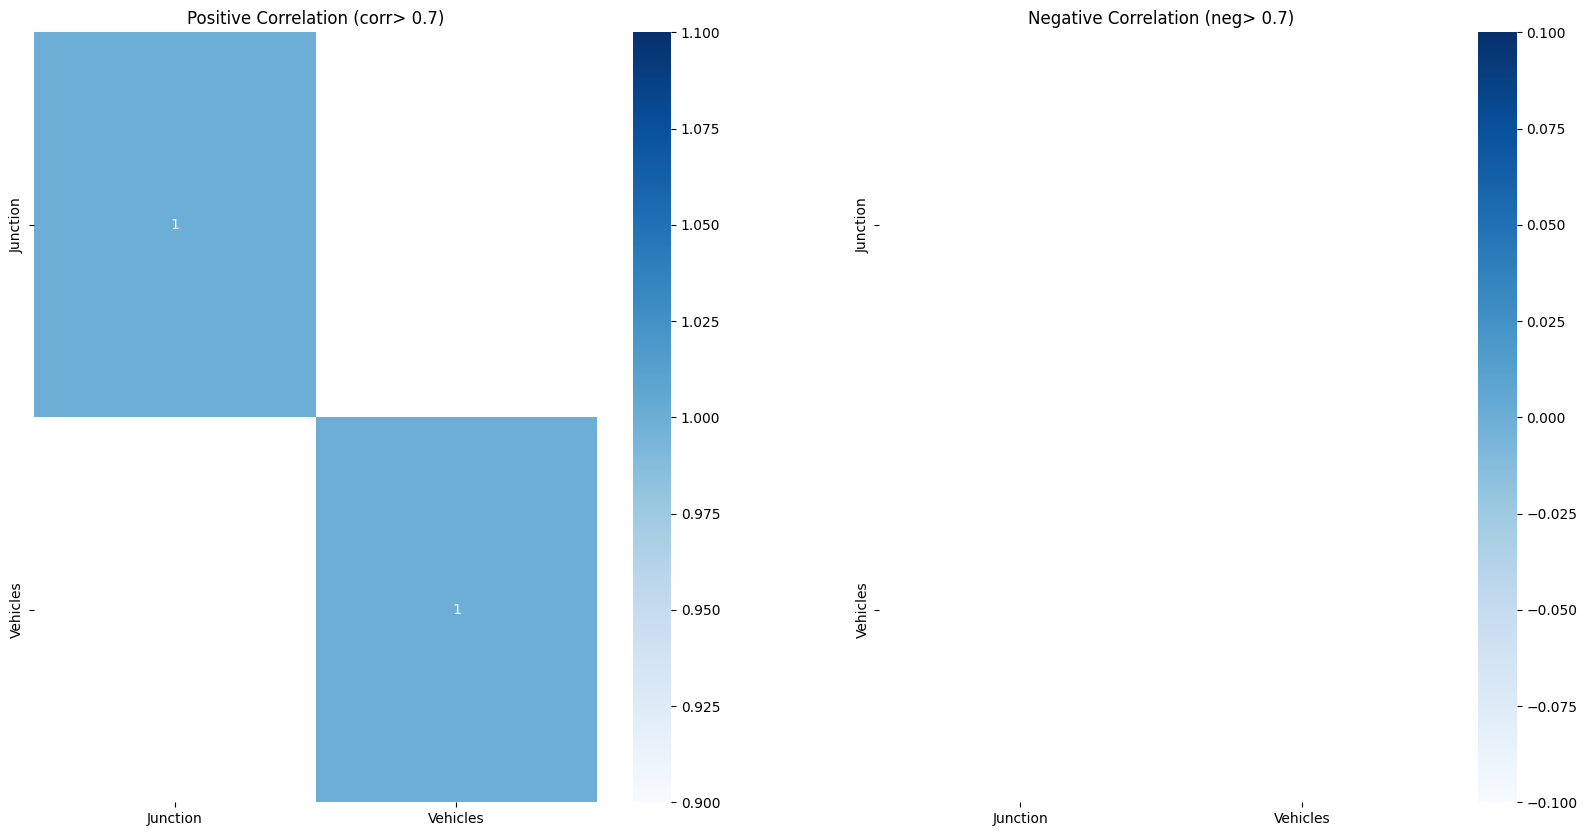

In [22]:
# Extracting the pos & neg corrs
p_th = 0.7
positive = corr[corr>p_th]

n_th = -0.7
negative = corr[corr<n_th]

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(20,10))

# plotting as multiple axis
plt.subplot(1,2,1)
sns.heatmap(positive, annot=True, cmap="Blues");
plt.title("Positive Correlation (corr> 0.7)")

plt.subplot(1,2,2)
sns.heatmap(negative, annot=True, cmap="Blues");
plt.title("Negative Correlation (neg> 0.7)")

Text(0.5, 1.0, 'Negative Correlation (neg> 0.5)')

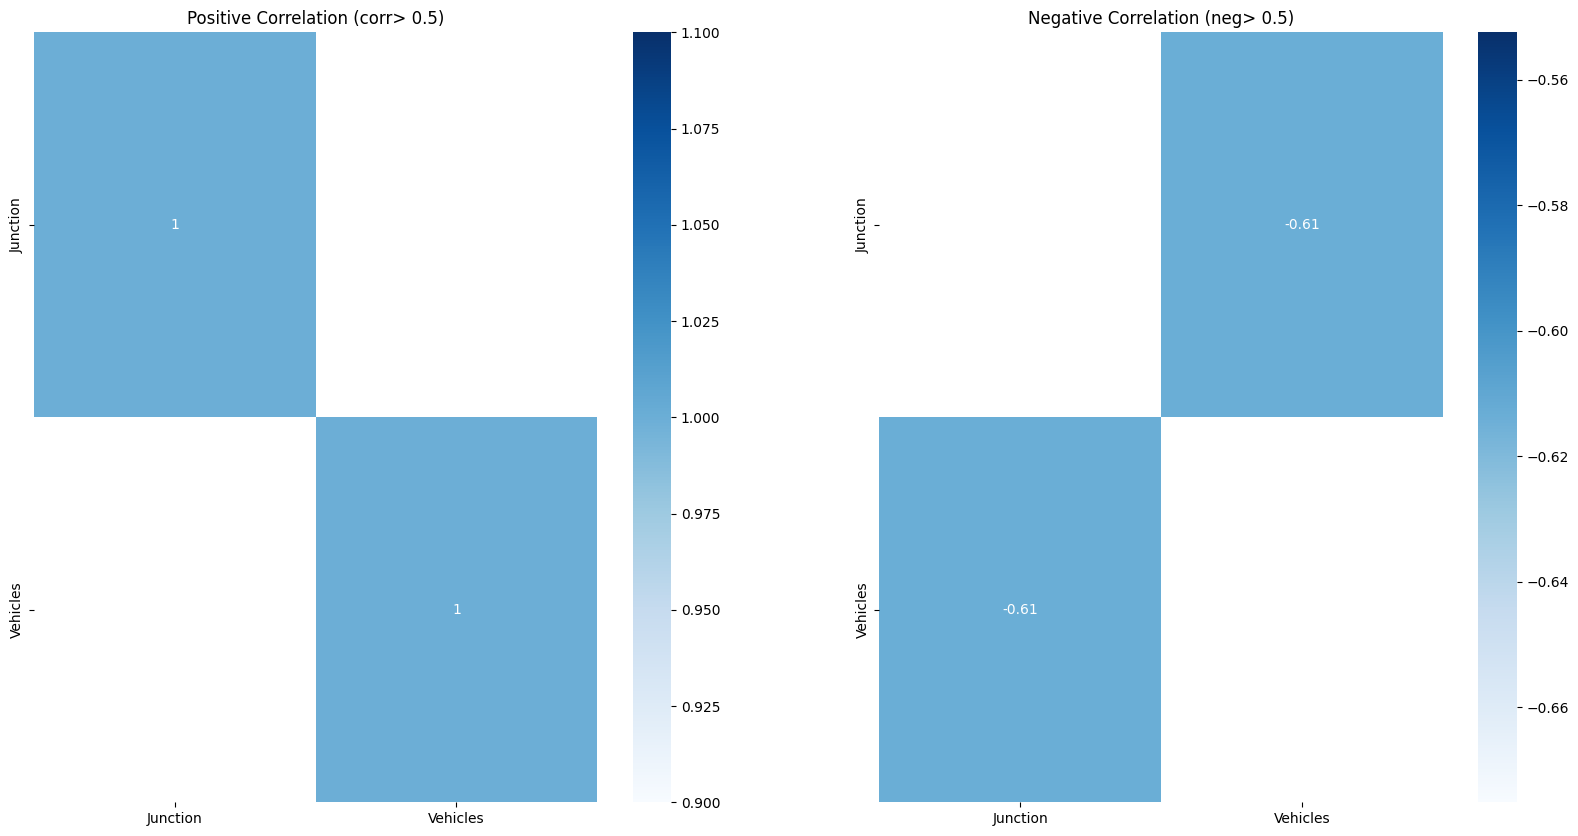

In [23]:
# Extracting the pos & neg corrs
p_th = 0.5
positive = corr[corr>p_th]

n_th = -0.5
negative = corr[corr<n_th]

# Configurating plot
col_size = len(df.columns)
plt.figure(figsize=(20,10))

# plotting as multiple axis
plt.subplot(1,2,1)
sns.heatmap(positive, annot=True, cmap="Blues");
plt.title("Positive Correlation (corr> 0.5)")

plt.subplot(1,2,2)
sns.heatmap(negative, annot=True, cmap="Blues");
plt.title("Negative Correlation (neg> 0.5)")

### Distribution Check

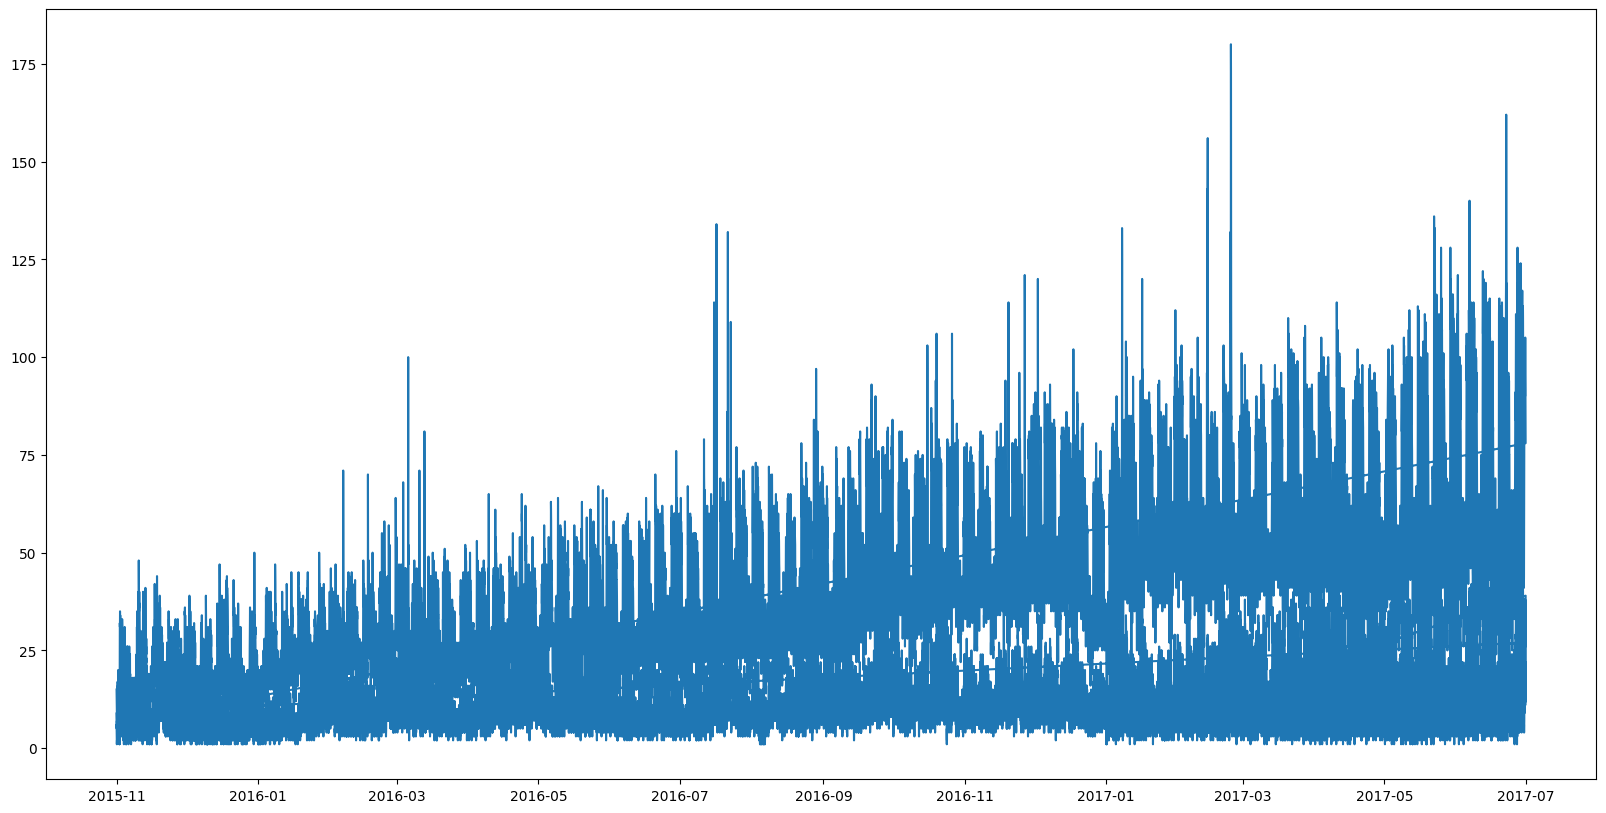

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['Vehicles'])
plt.show()

Text(0.5, 1.0, 'Vehicle Line PLot With Juntion')

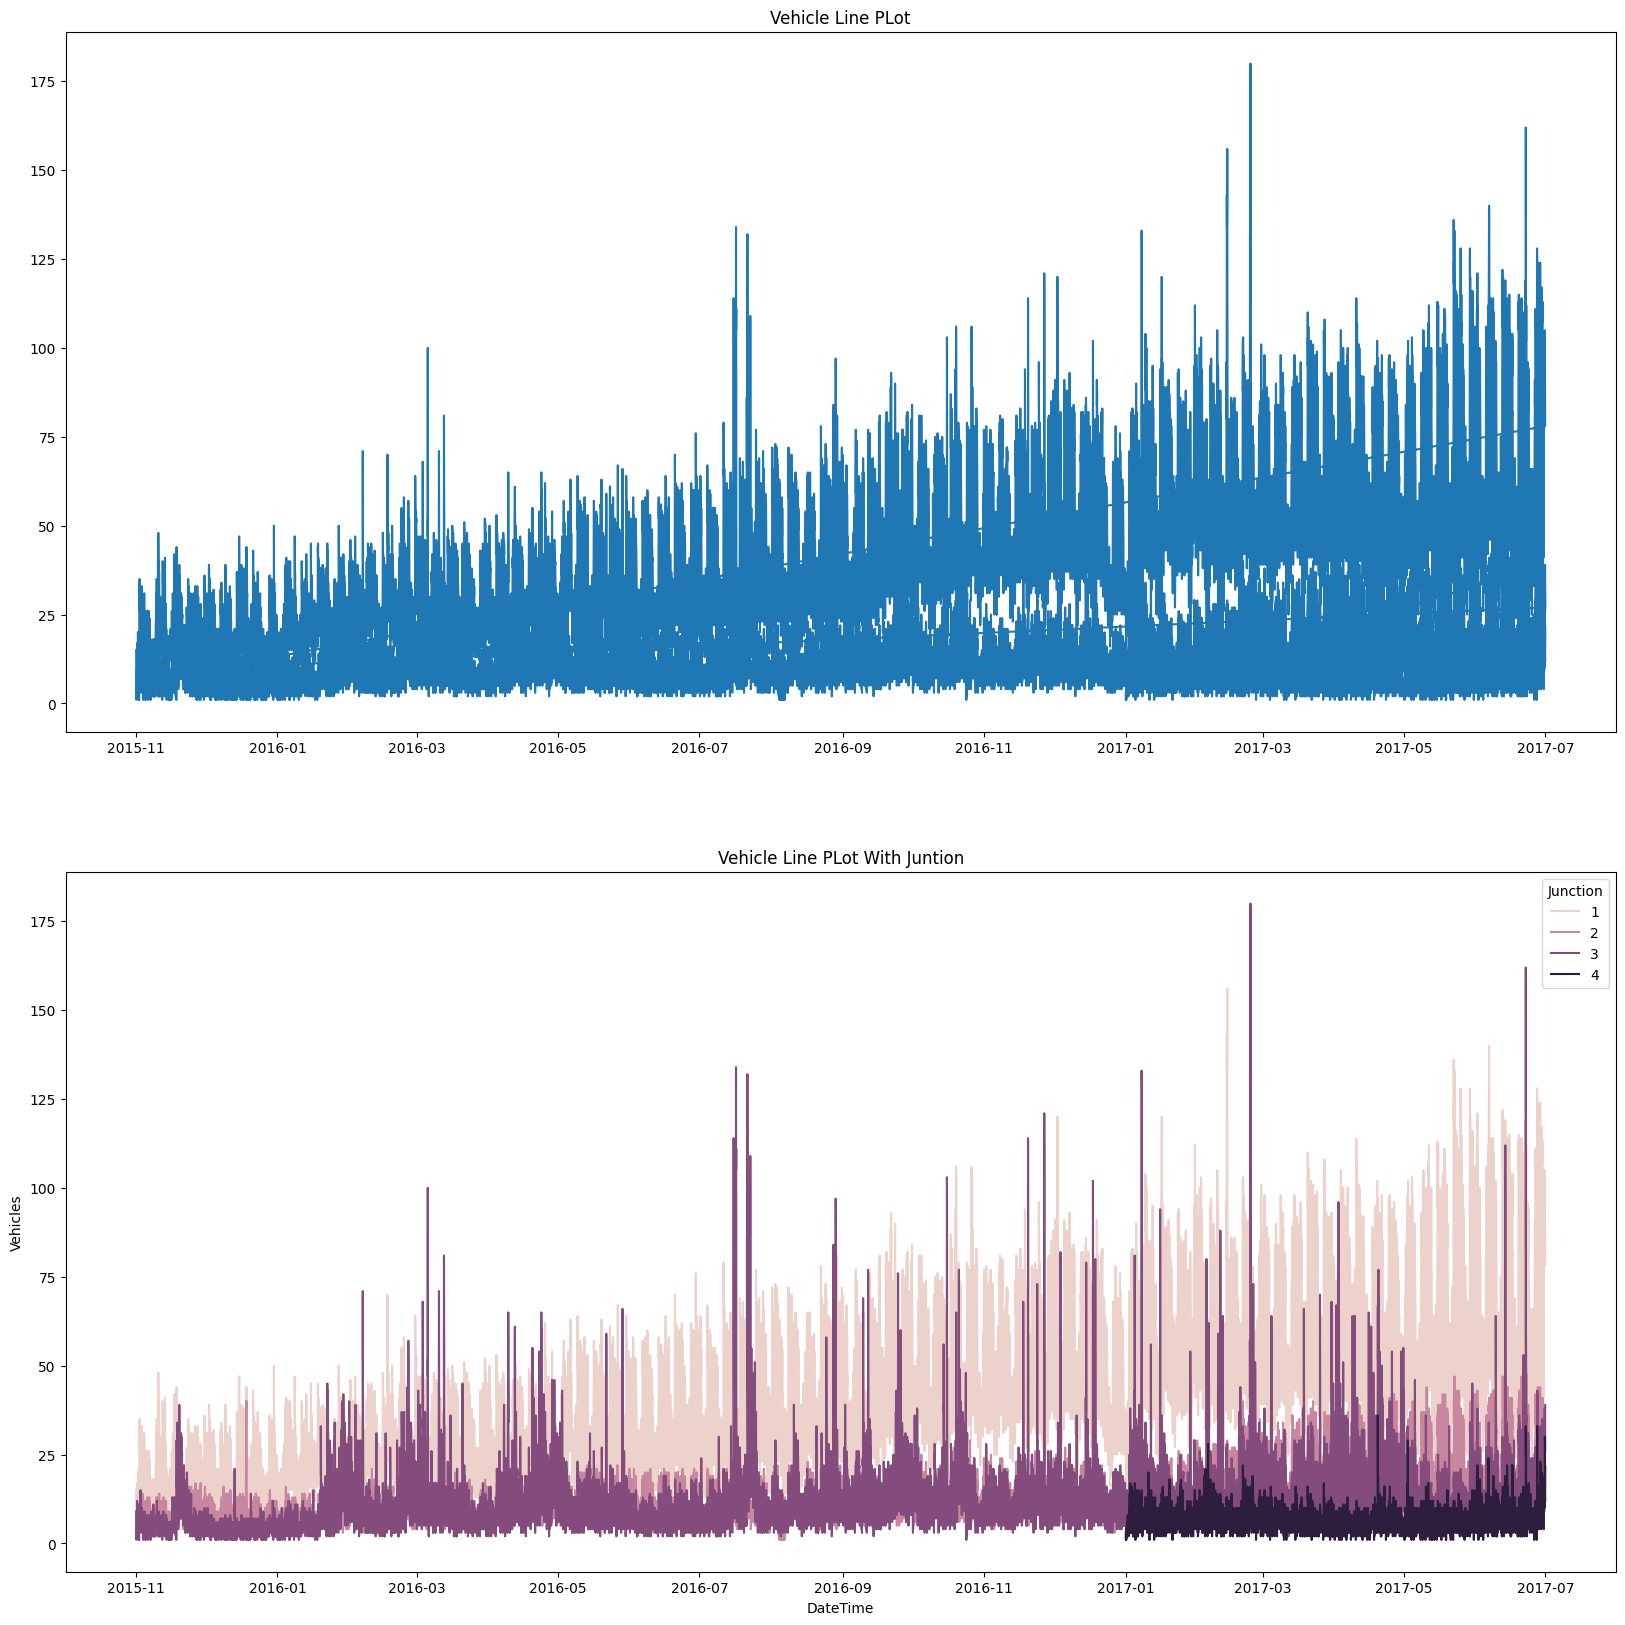

In [25]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.plot(df['DateTime'], df['Vehicles'])
plt.title("Vehicle Line PLot")

plt.subplot(2,1,2)
sns.lineplot(data=df, x="DateTime", y="Vehicles", hue="Junction")
plt.title("Vehicle Line PLot With Juntion")

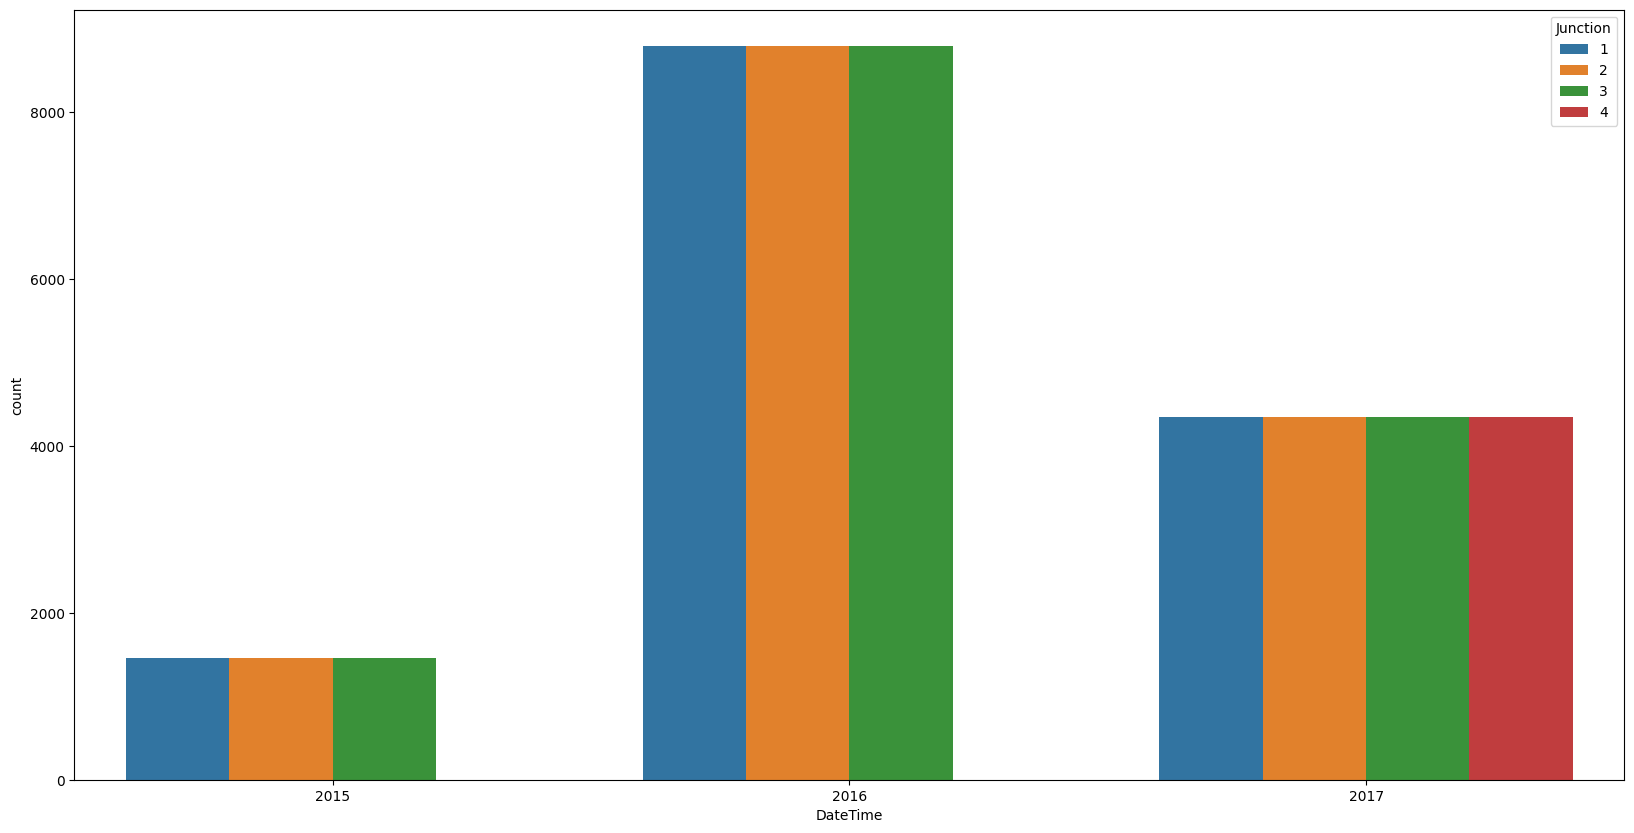

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x =df["DateTime"].dt.year, hue="Junction");

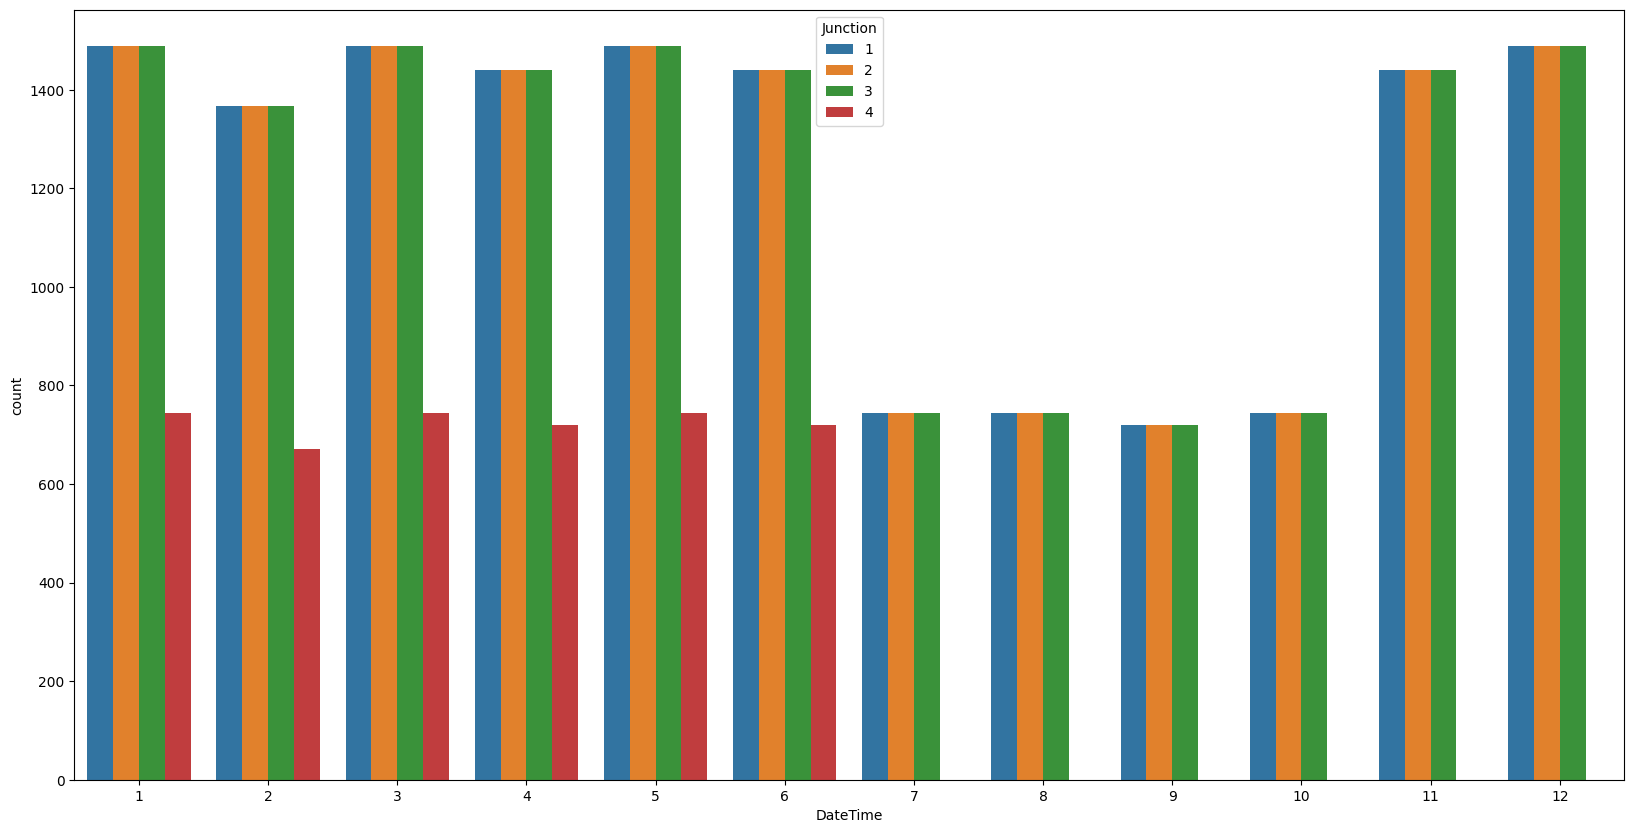

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x =df["DateTime"].dt.month, hue="Junction");

In [28]:
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

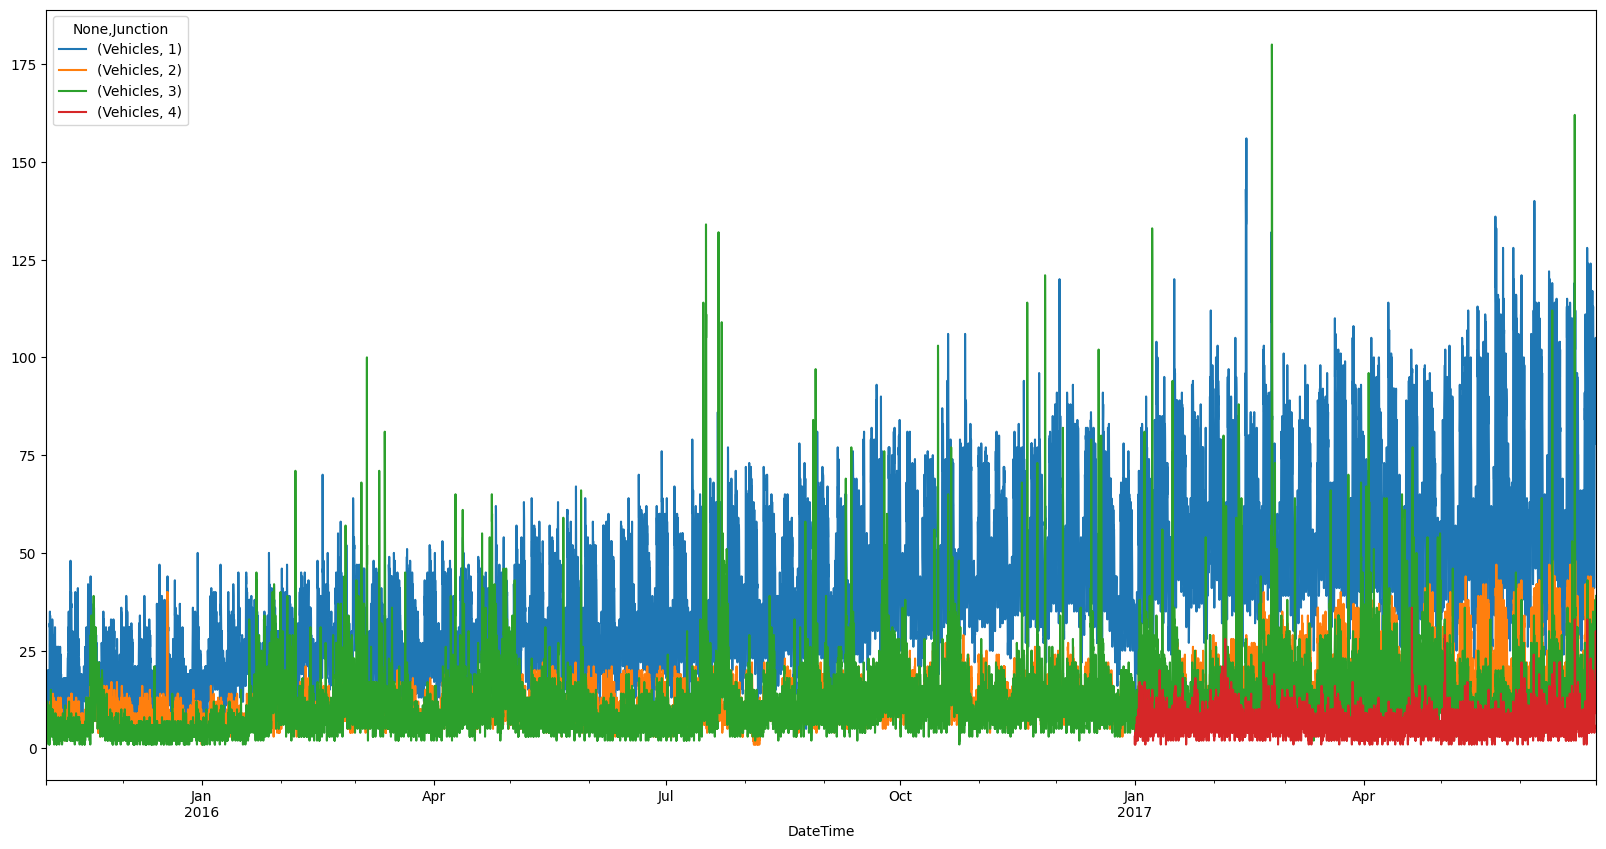

In [29]:
df_J.plot(figsize=(20,10));

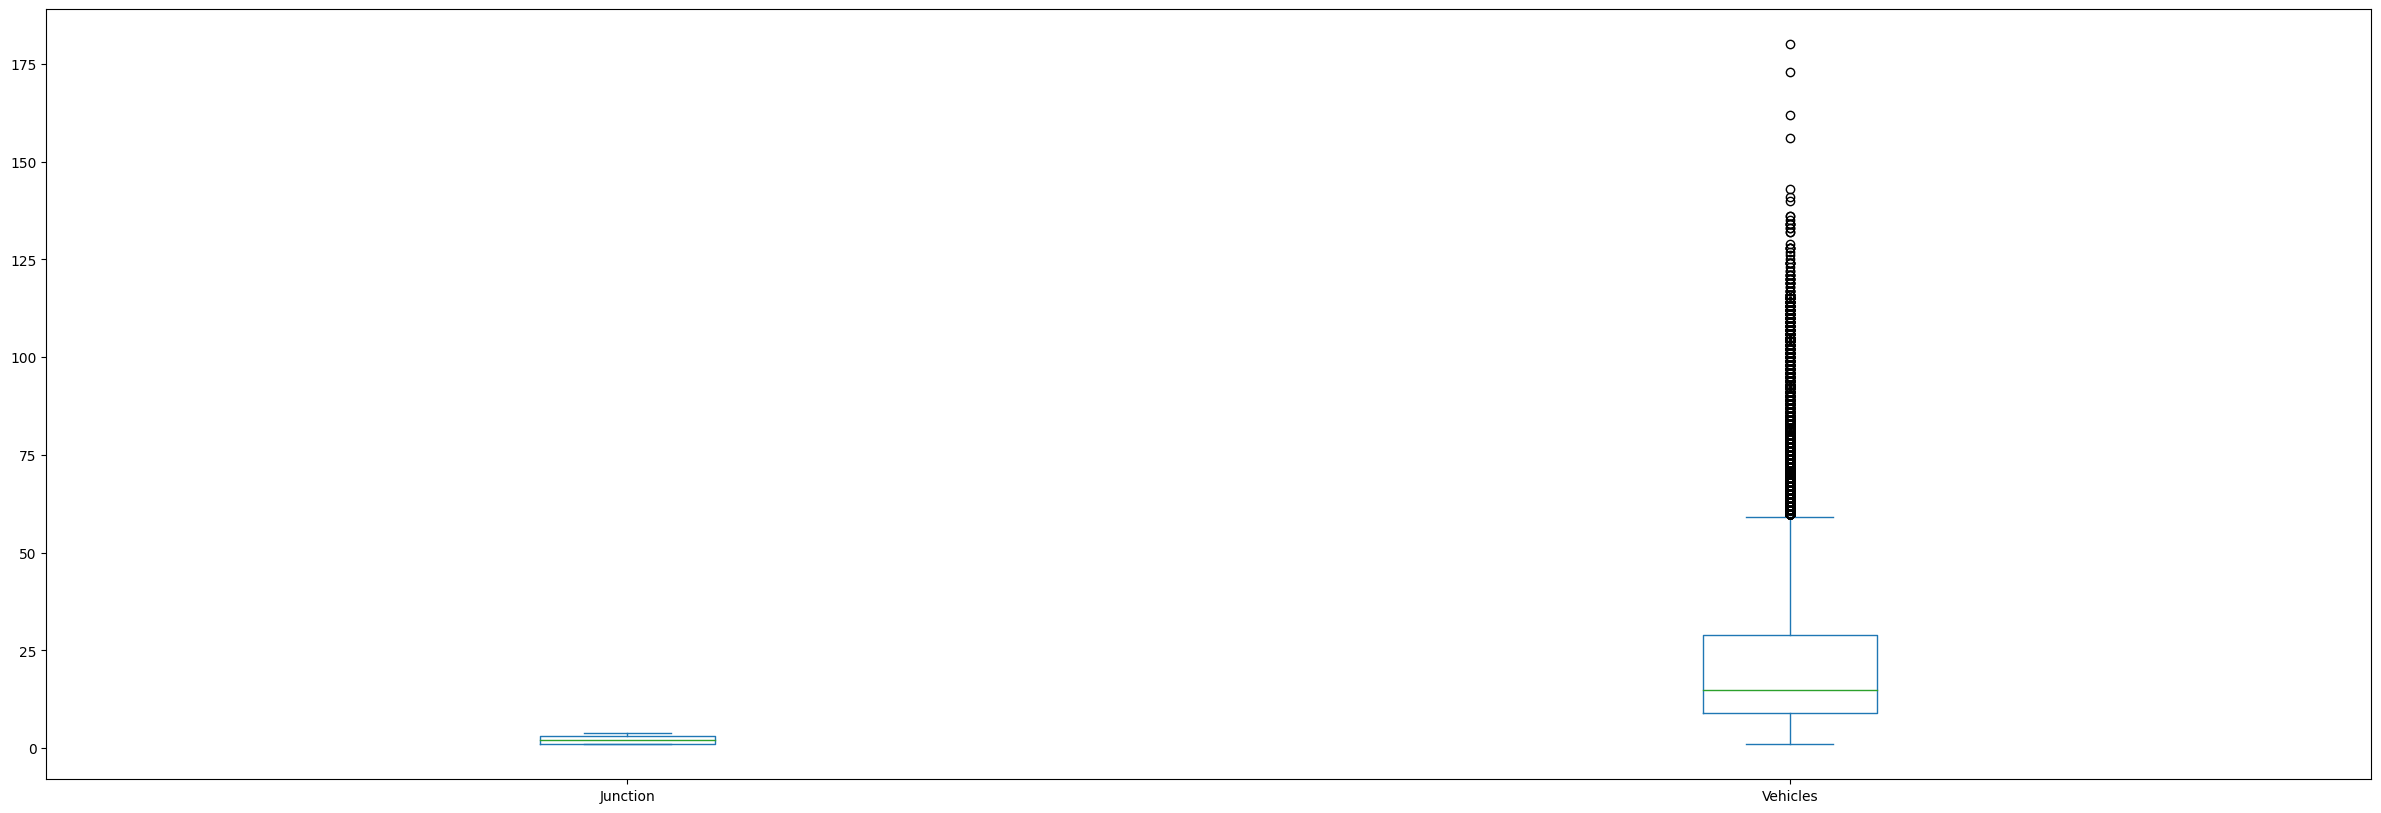

In [30]:
df.plot.box(figsize=(30,10));

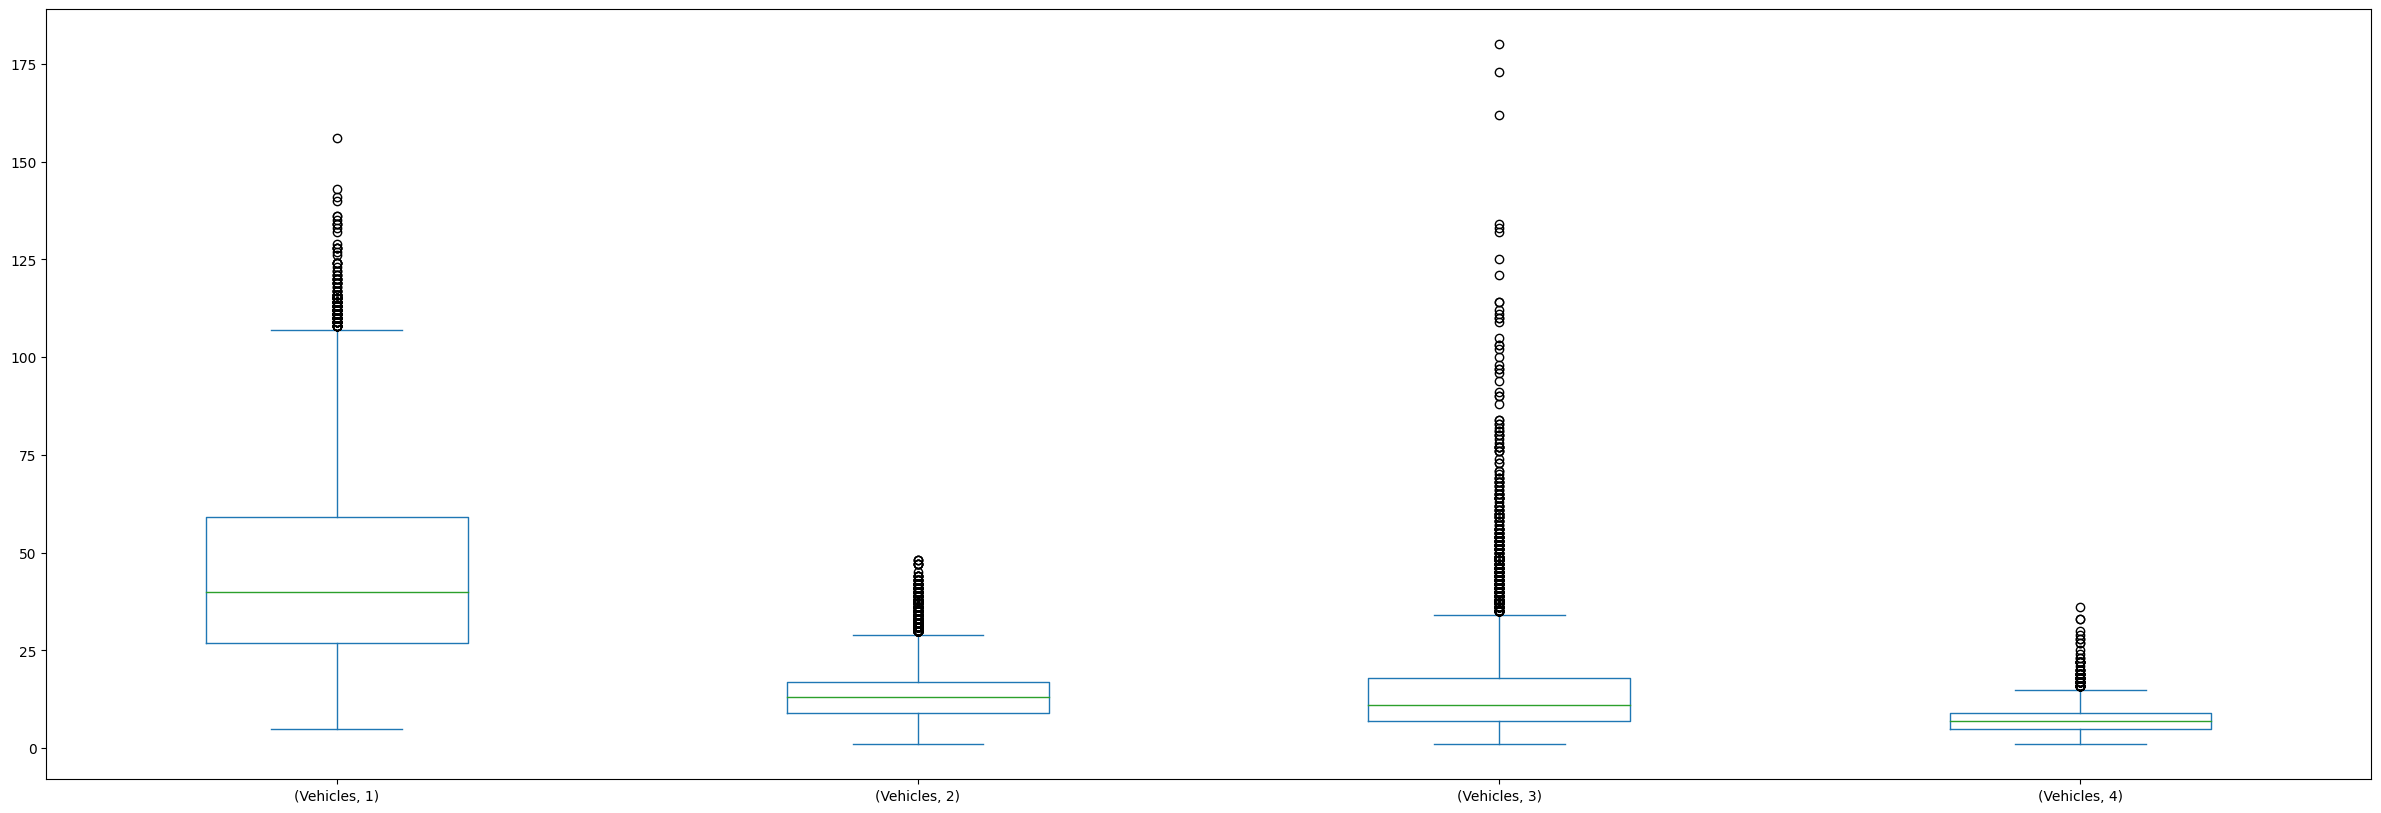

In [31]:
df_J.plot.box(figsize=(30,10));

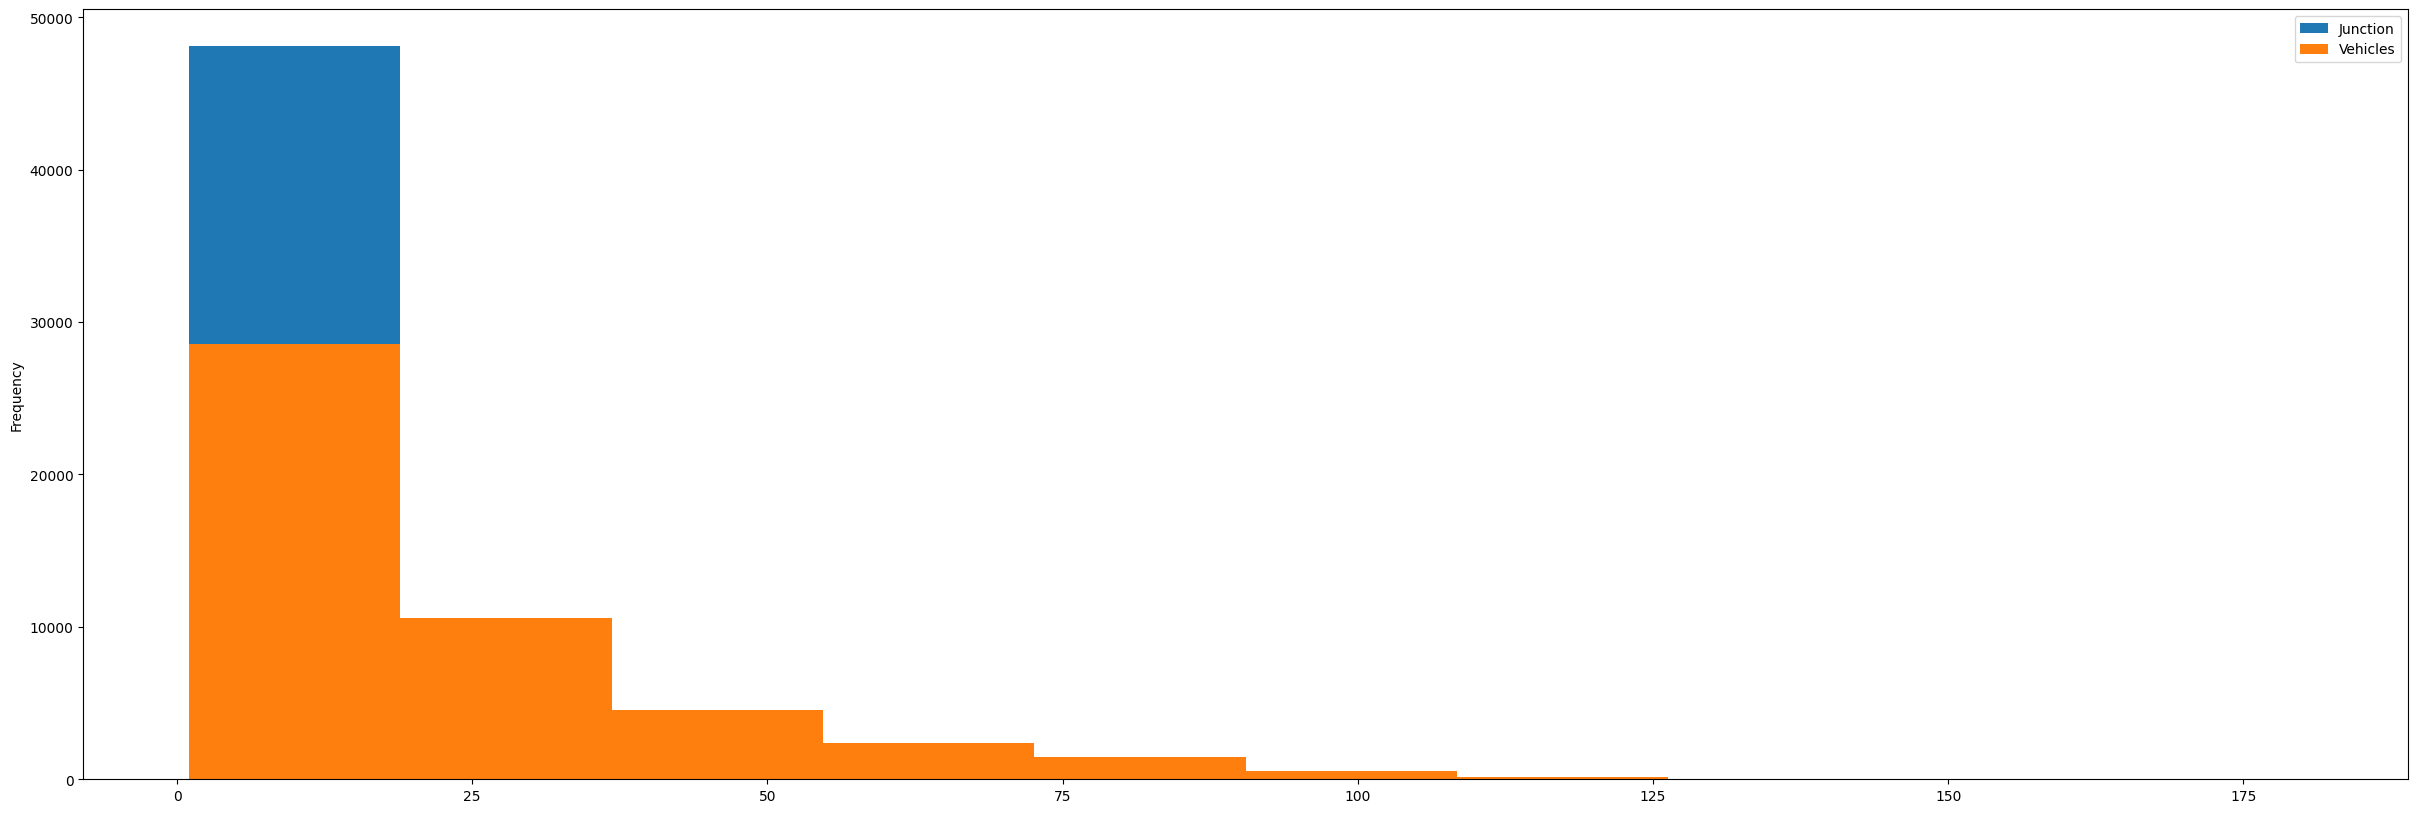

In [32]:
df.plot.hist(figsize=(30,10));

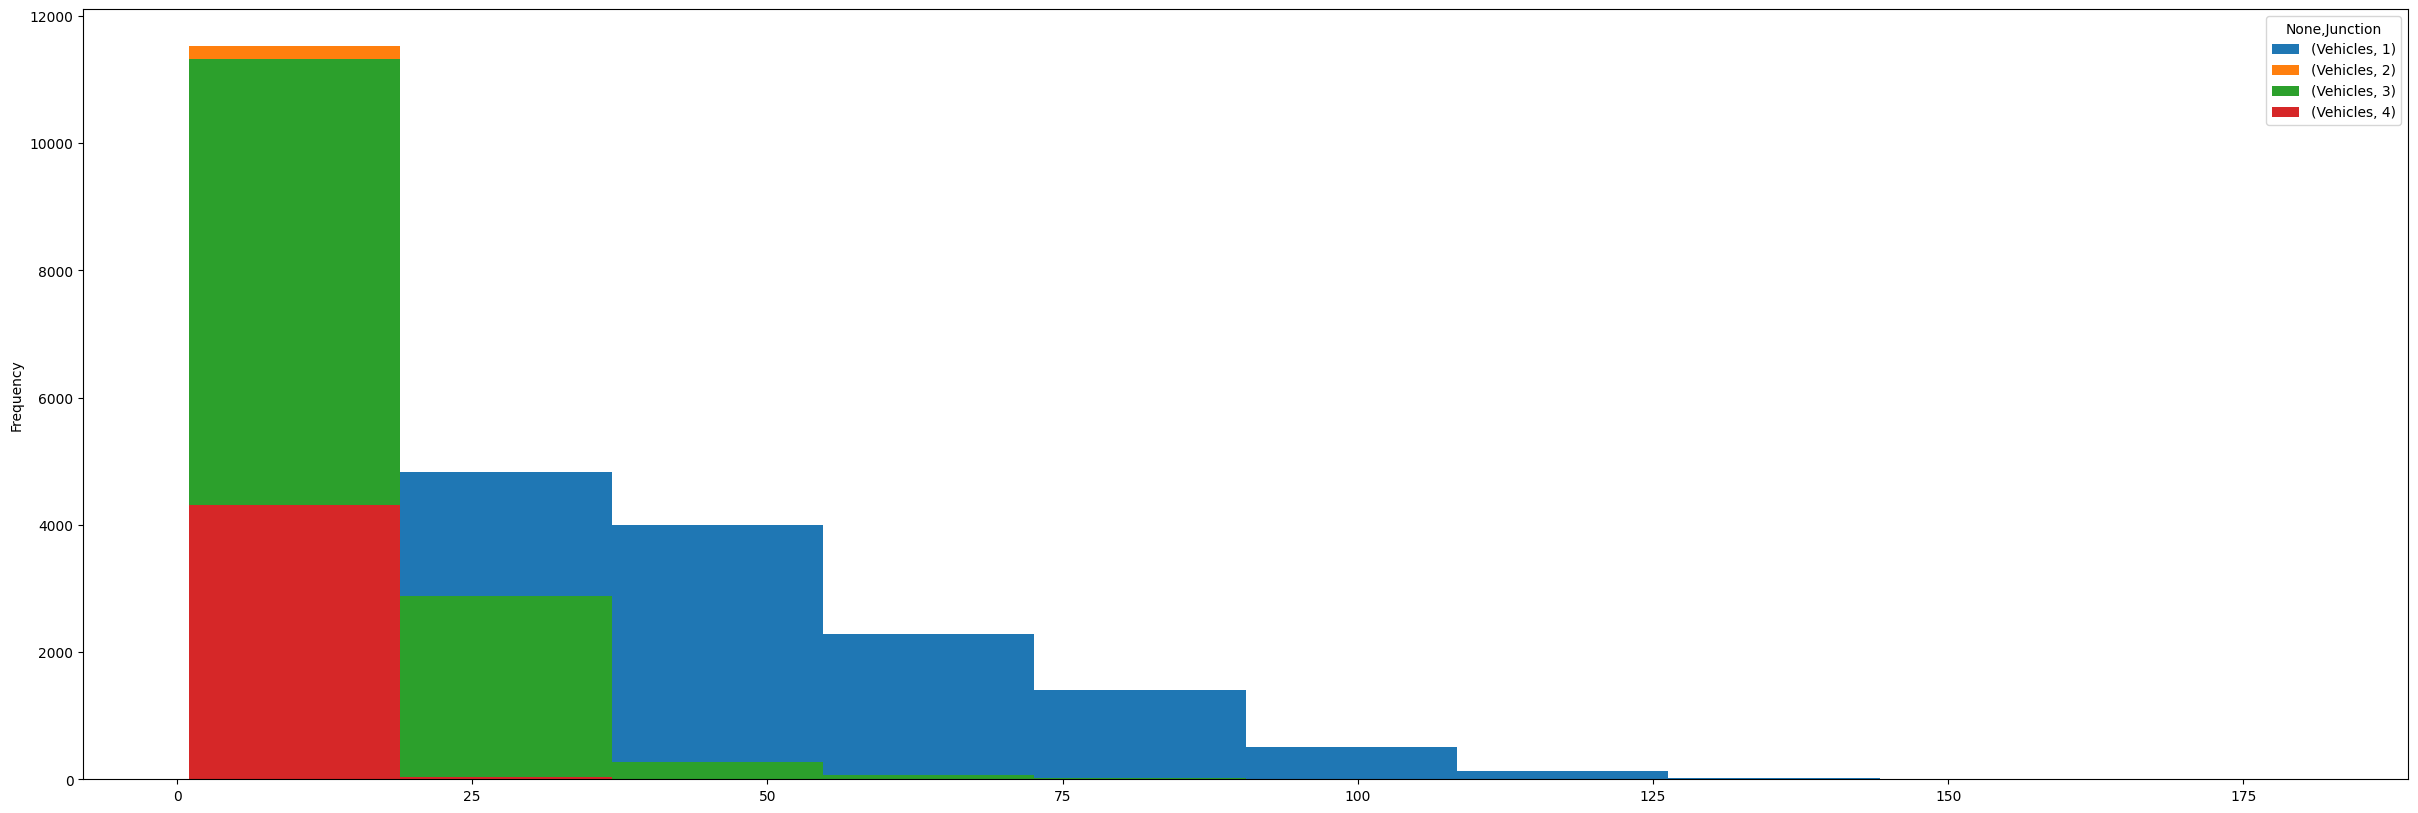

In [33]:
df_J.plot.hist(figsize=(30,10));

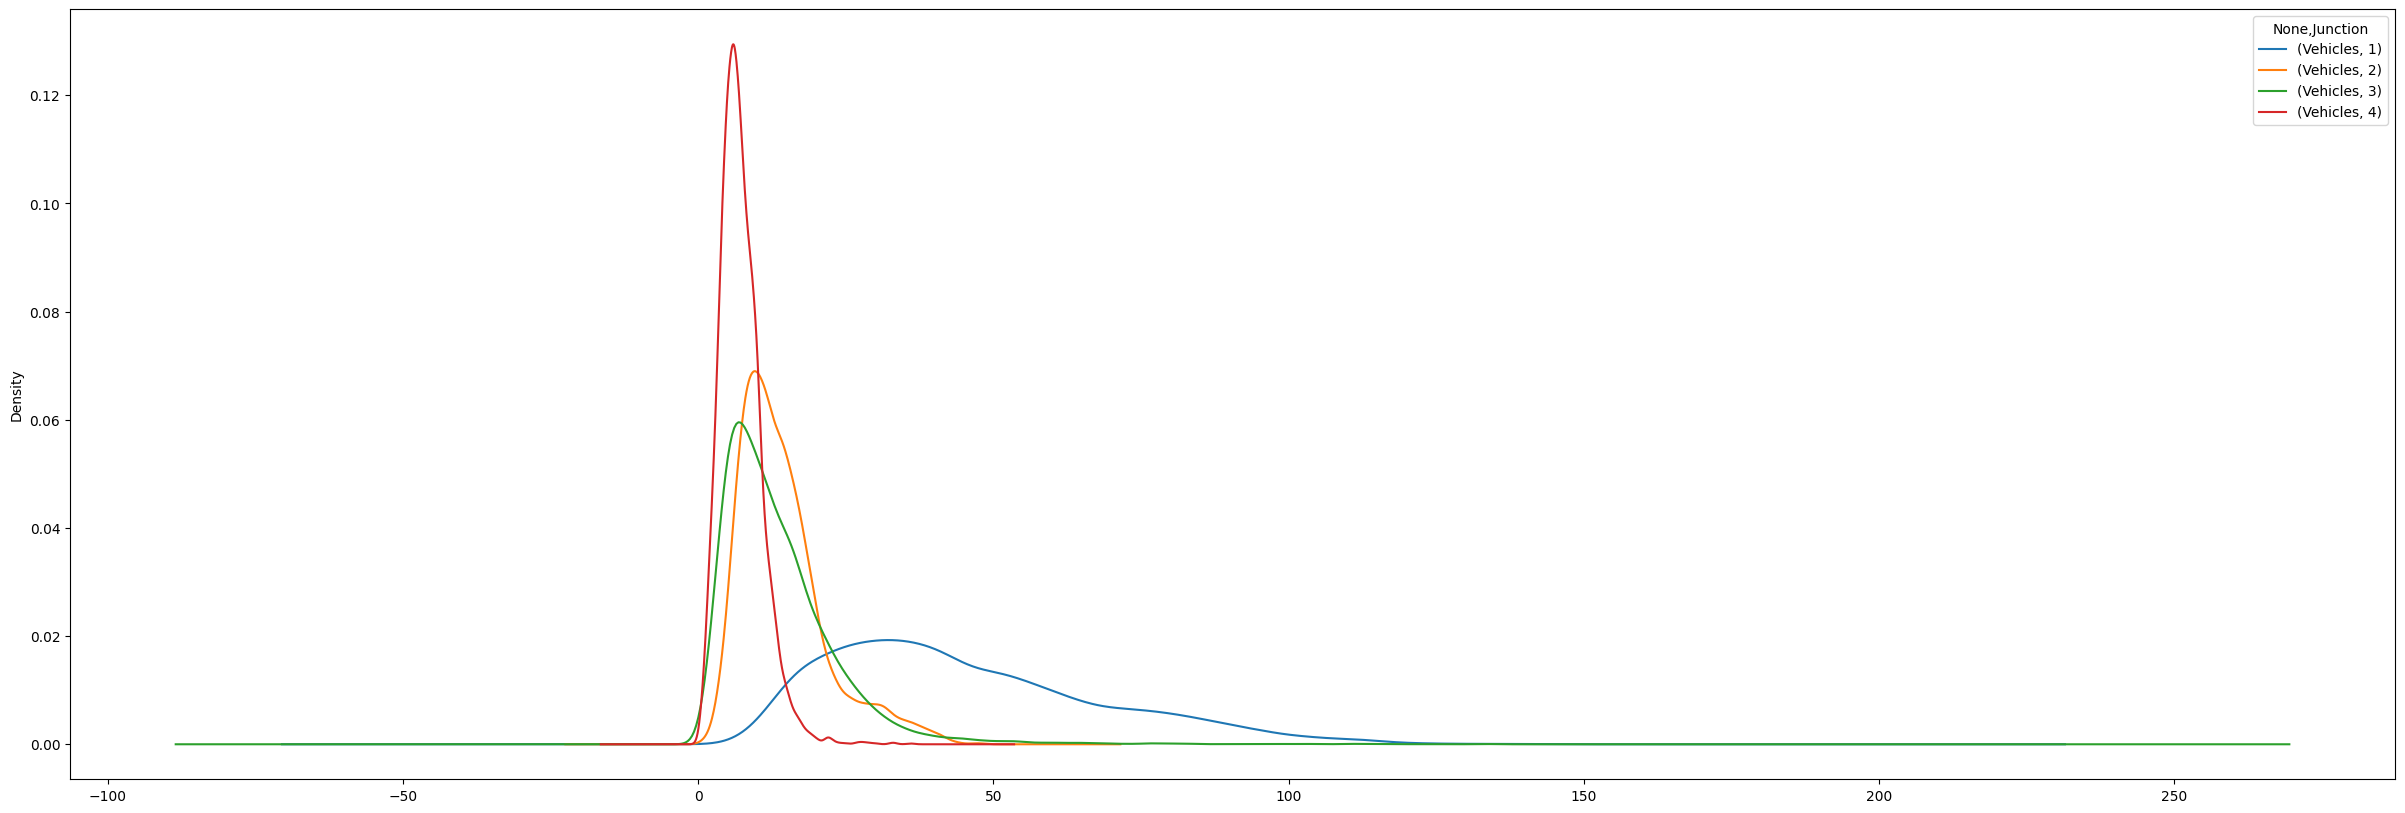

In [34]:
df_J.plot.kde(figsize=(30,10));

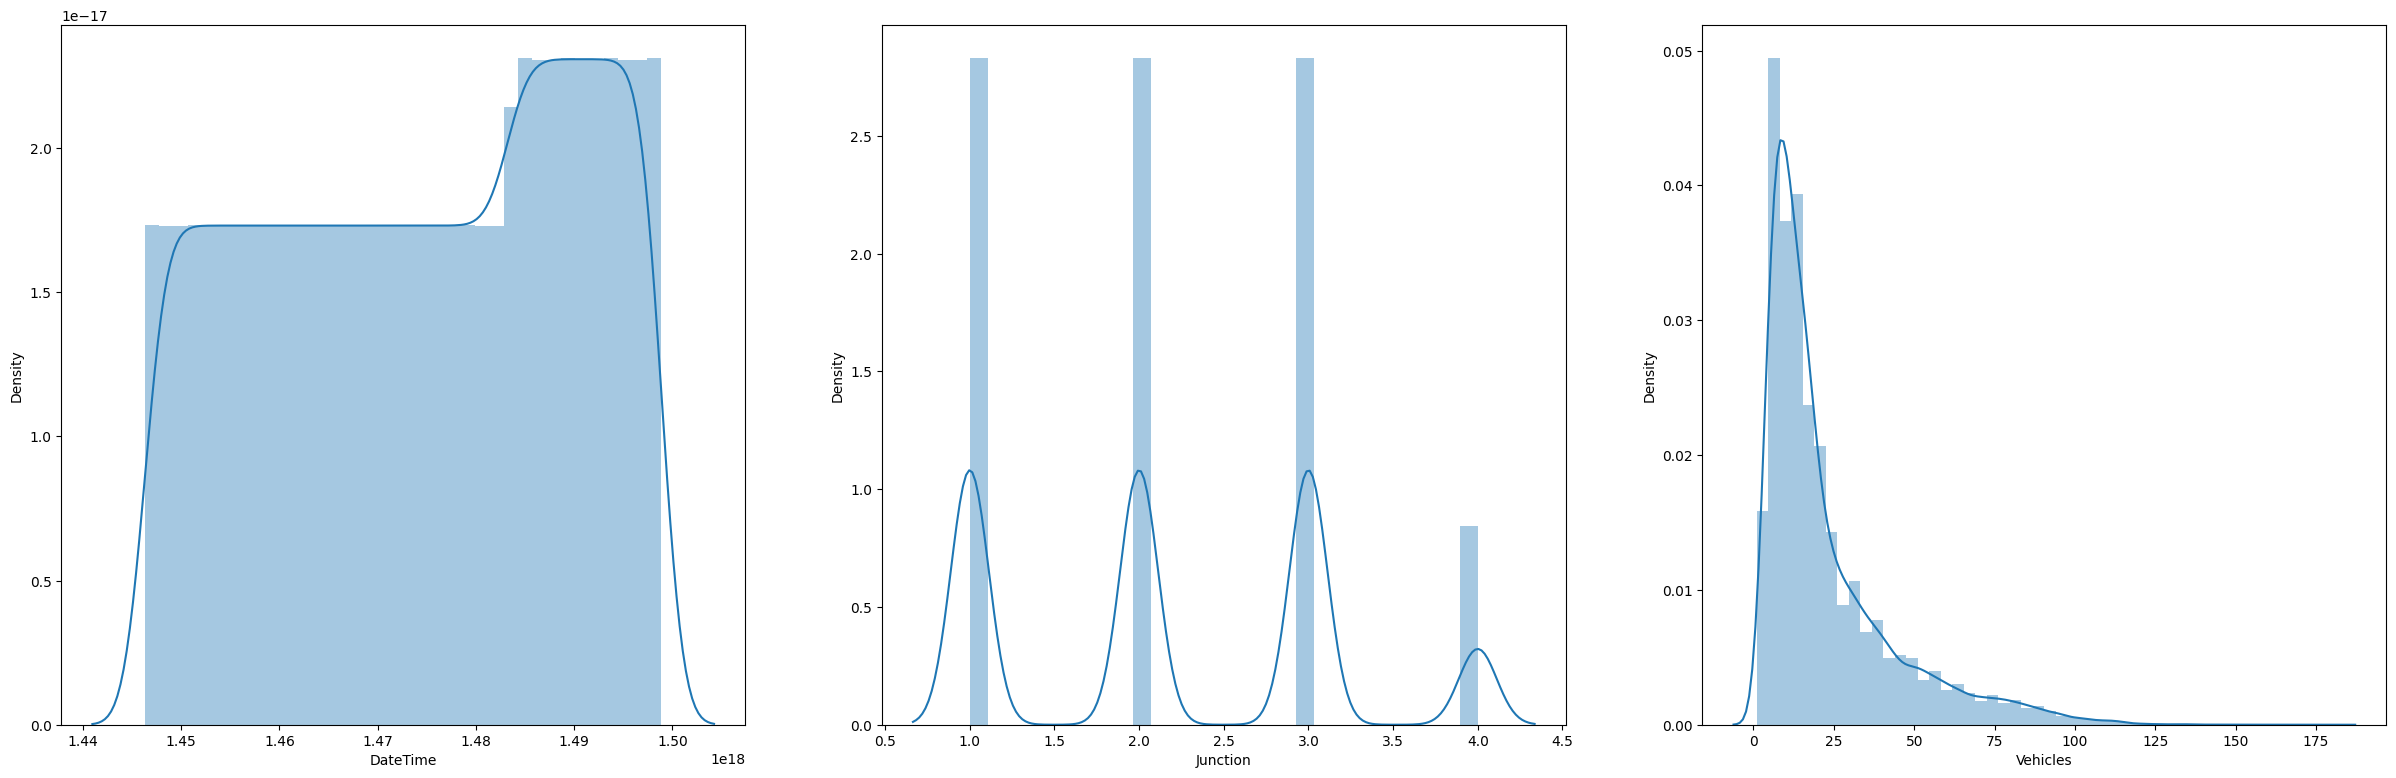

In [35]:
size = len(df.columns)
cs, rs = (5, size//5+1) if size >=5 else (3, size//3+1)

plt.figure(figsize=(cs*10, rs*10))
for i, col in enumerate(df.select_dtypes(exclude=("object","category")).columns):
  plt.subplot(rs,cs,i+1)
  sns.distplot(df[col])

<Axes: xlabel='Vehicles', ylabel='Density'>

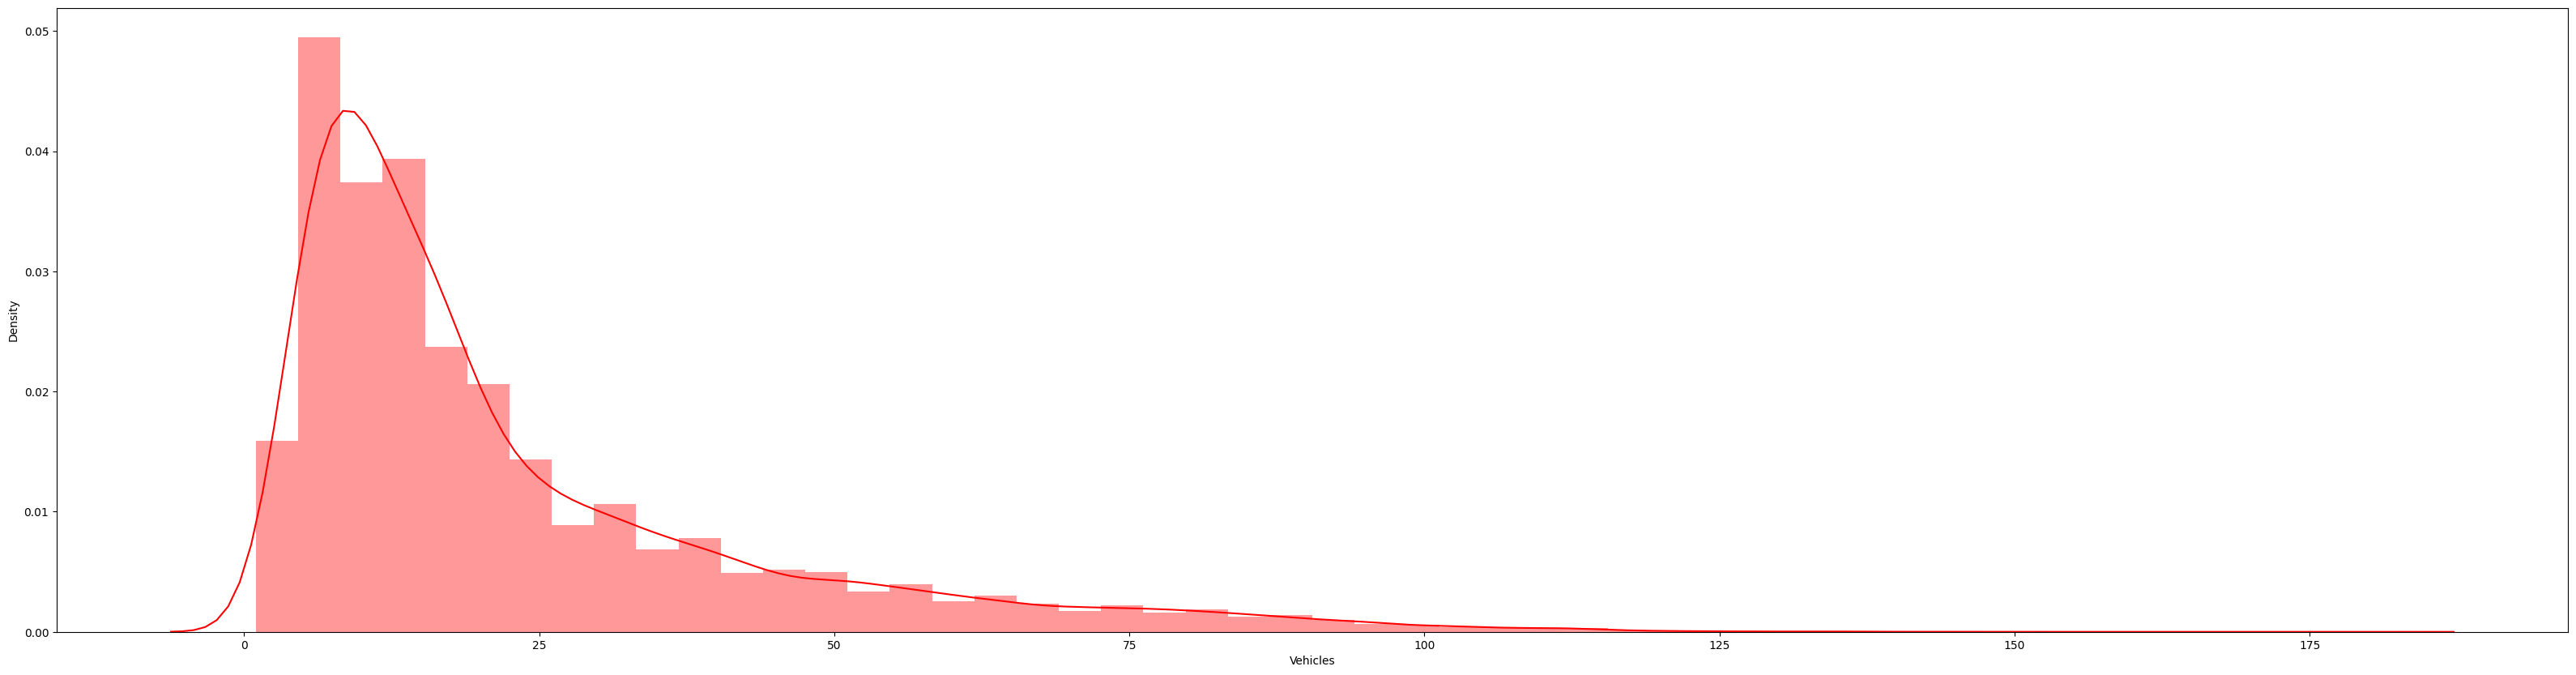

In [36]:
# Configurating plotings
plt.figure(figsize=(40,10))

sns.distplot( df[target_var], color='r')

## (2) Missing Value 

### Finding out the missing values

In [37]:
# find the null values
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

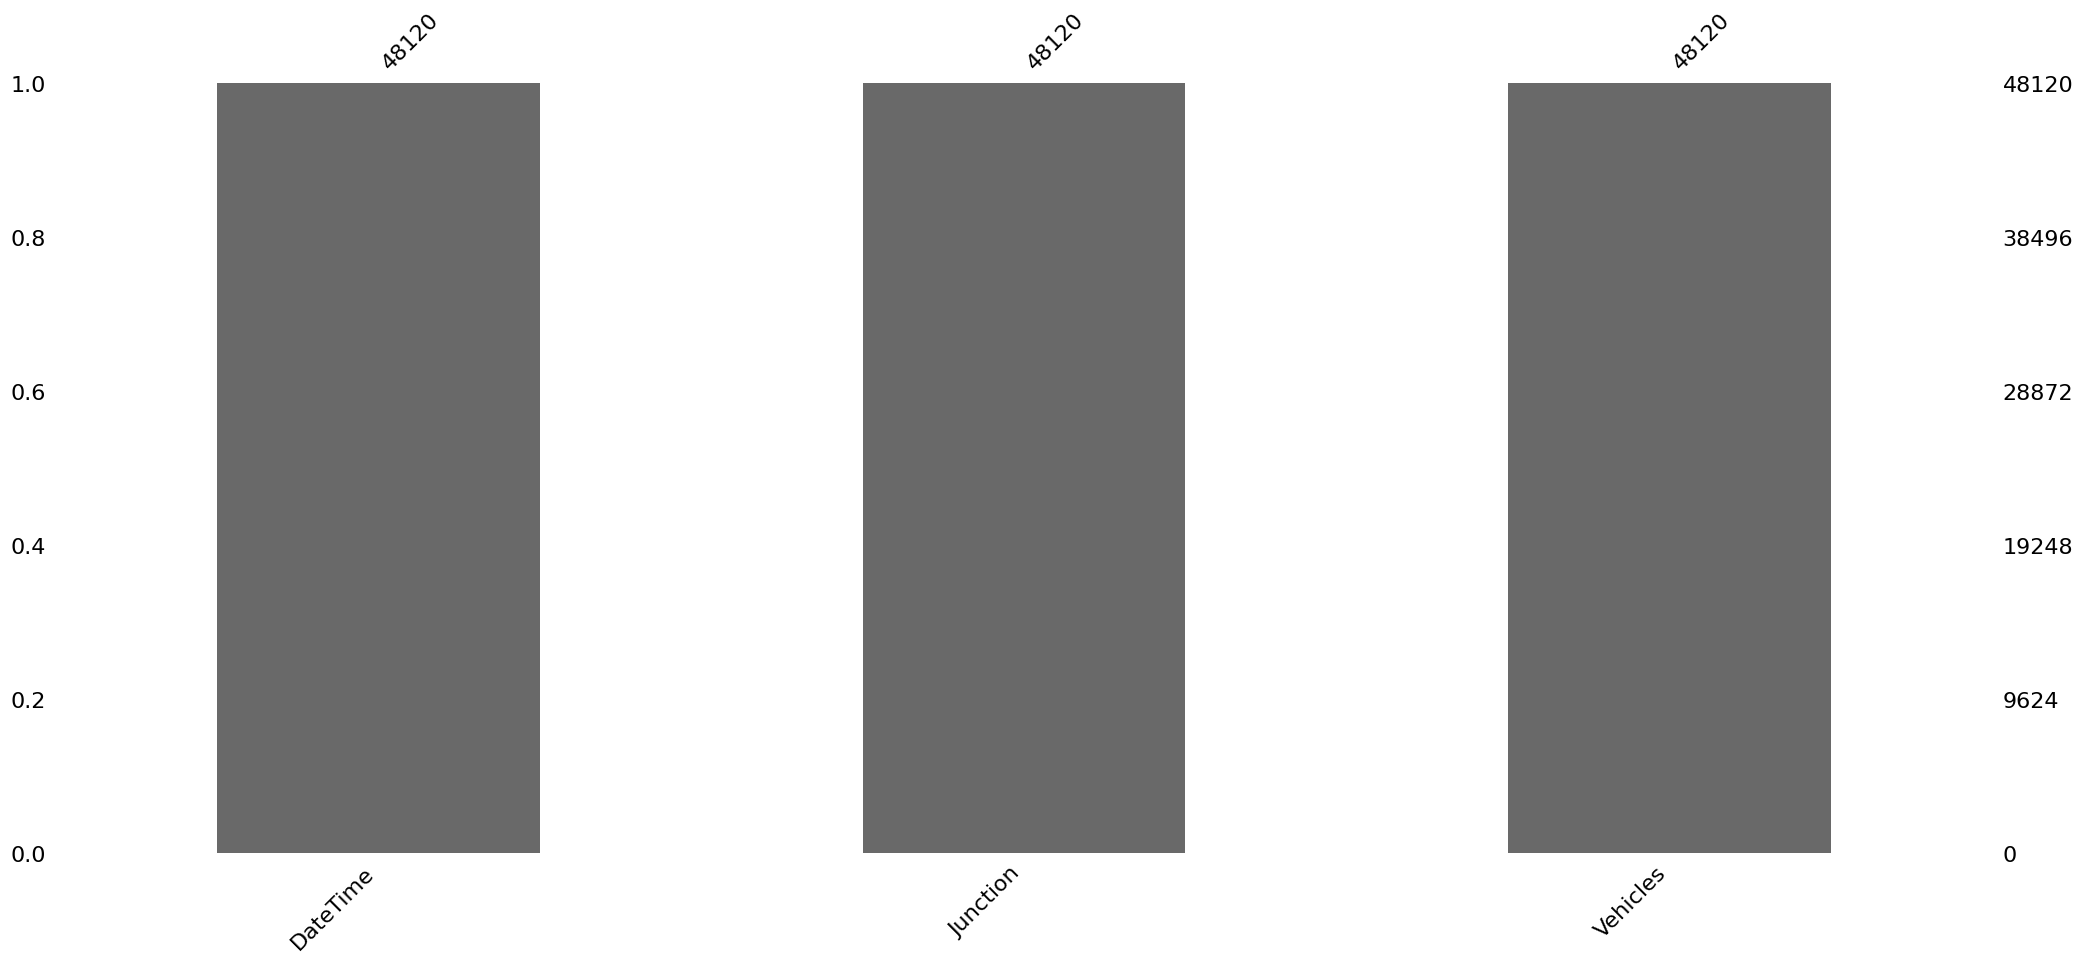

In [38]:
import missingno as msno
msno.bar(df);

<Axes: >

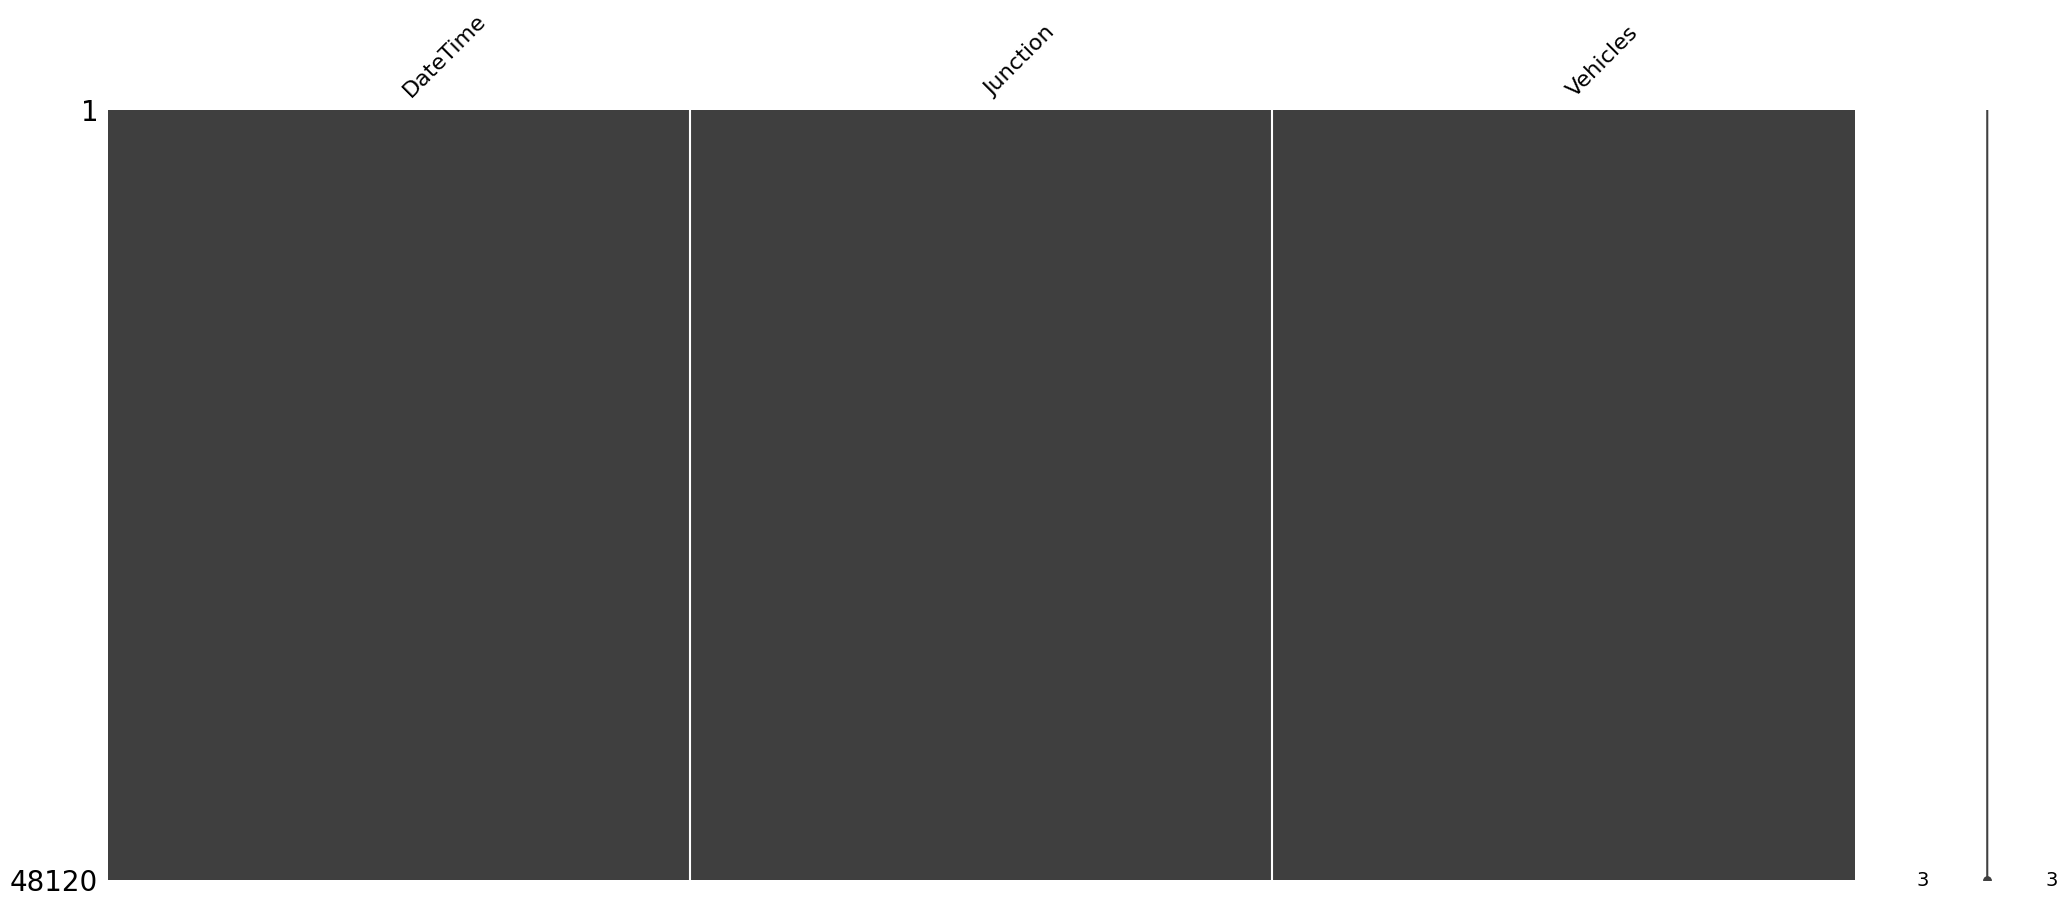

In [39]:
msno.matrix(df)

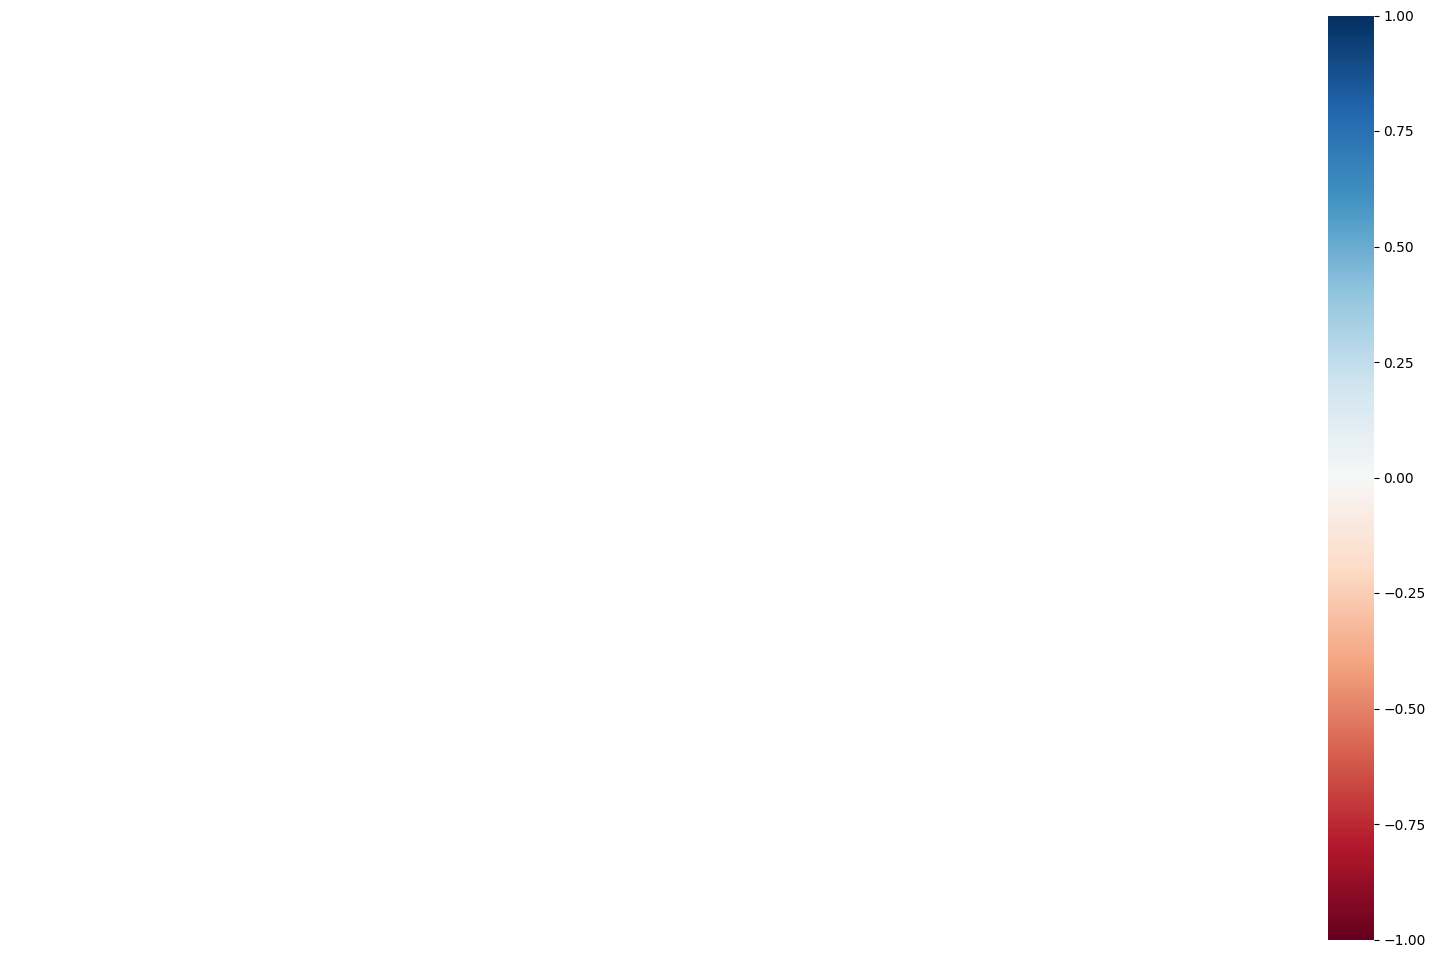

In [40]:
msno.heatmap(df);

### Handling The Missing Values
- There is no missing values


## (3) Feature Engineering

#### Creating new variables getting subvariables

In [41]:
#Exploring more features 
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

DateTime  Junction  Vehicles  Year  Month  Date_no  Hour     Day
0 2015-11-01 00:00:00         1        15  2015     11        1     0  Sunday
1 2015-11-01 01:00:00         1        13  2015     11        1     1  Sunday
2 2015-11-01 02:00:00         1        10  2015     11        1     2  Sunday
3 2015-11-01 03:00:00         1         7  2015     11        1     3  Sunday
4 2015-11-01 04:00:00         1         9  2015     11        1     4  Sunday

#### Transformation

In [42]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]

# Junction 4 has limited data, drop the data
df_4 = df_4.dropna()

In [43]:
df_1

Vehicles
Junction                   1
DateTime                    
2015-11-01 00:00:00     15.0
2015-11-01 01:00:00     13.0
2015-11-01 02:00:00     10.0
2015-11-01 03:00:00      7.0
2015-11-01 04:00:00      9.0
...                      ...
2017-06-30 19:00:00    105.0
2017-06-30 20:00:00     96.0
2017-06-30 21:00:00     90.0
2017-06-30 22:00:00     84.0
2017-06-30 23:00:00     78.0

[14592 rows x 1 columns]

In [44]:
# Adjusting the column hierarchical
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs: i.columns= i.columns.droplevel(level=1)   

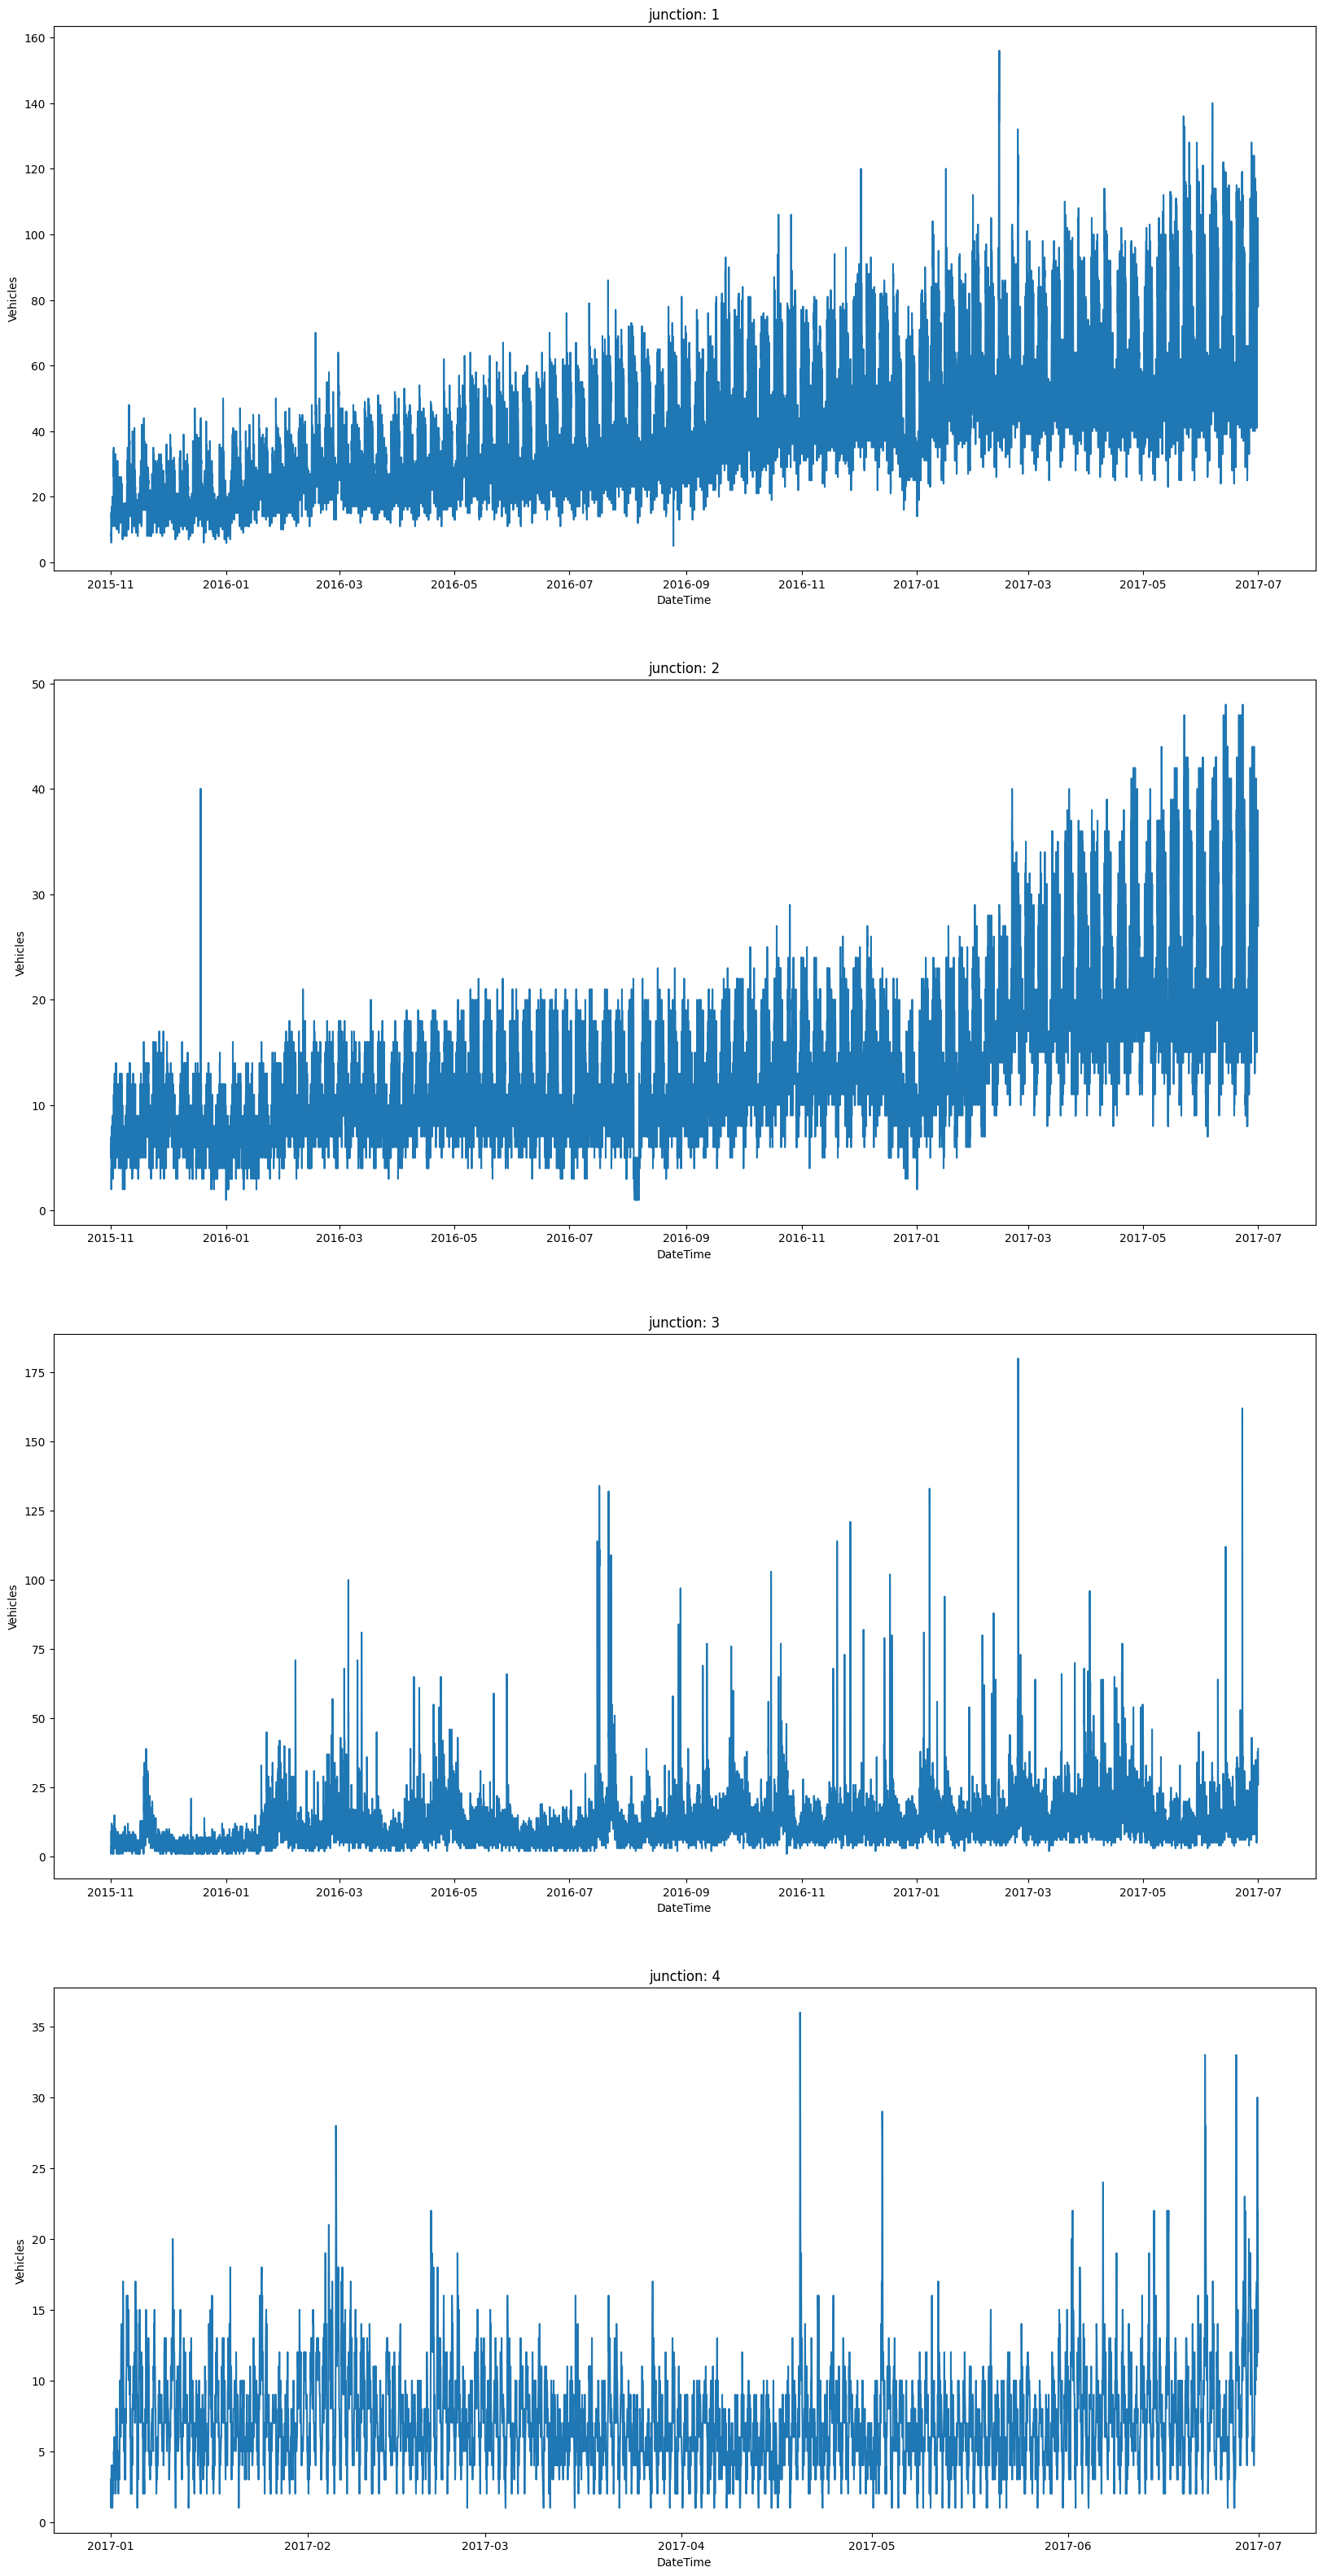

In [45]:
# Plotting the Junctions
rs, cs = len(list_dfs), 1 
plt.figure(figsize=(cs*20, rs*10))
for i, dataframe in enumerate(list_dfs):
  plt.subplot(rs, cs, i+1)
  sns.lineplot(data=dataframe["Vehicles"])
  plt.title(f"junction: {i+1}")

#### stationarizing

##### Utils

In [46]:
# Normalize Function
def Normalize(df, col):
    
    # Pre-calculations
    average = df[col].mean()
    stdev = df[col].std()
    
    # Normalizing
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    
    return df_normalized, average, stdev


# Differencing Function
def Difference(df,col, interval):
    return [ df[col][i] - df[col][i - interval] for i in range(interval, len(df))]

def statiorizer(params):
  stationary_data = {}
  for J_class, param in  params.items():
      # Normalizing the data
      norm_data, avg, std = Normalize(param["data"], param["col"])

      # getting difference according to period (interval), [drop na which occured because of the getting diff]
      diffs = Difference(norm_data, param["col"], param["interval"])

      # Creating new dataframe
      norm_diffs = norm_data[param["interval"]:].copy()
      norm_diffs.columns = ["Norm"]

      norm_diffs["Diffs"] = diffs
      norm_diffs["Diffs"] = norm_diffs["Diffs"].dropna()

      # collecting the results
      stationary_data[J_class] = {"norm_diffs":norm_diffs, "avg":avg, "std":std }

  return stationary_data

In [47]:
def Norm_input(df, col, avg, std):
  # Normalizing
  df_normalized = (df[col] - avg) / std
  df_normalized = df_normalized.to_frame()
  
  return df_normalized

def statiorizer_input(params):
  for J_class, param in  params.items():
    # Normalizing the data
    data, col, avg, std =param["data"], param["col"], param["avg"], param["std"]
    norm_data= Normalize(data, col, avg, std)
  
    diffs = Difference(norm_data, col, param["interval"])

    # Creating new dataframe
    norm_diffs = norm_data[param["interval"]:].copy()
    norm_diffs.columns = ["Norm"]

    norm_diffs["Diffs"] = diffs
    norm_diffs["Diffs"] = norm_diffs["Diffs"].dropna()

    # collecting the results
    stationary_data[J_class] = {"norm_diffs":norm_diffs, "avg":avg, "std":std }

  return stationary_data



In [48]:
from statsmodels.tsa.stattools import adfuller
def Stationary_check(df):
  
  # Implementing the stationary hypothesis test
  check = adfuller(df.dropna())

  # extracting the results
  ADF_stat = np.round(check[0],5)
  p_val = np.round(check[1],5)

  critical_metrics = [f"{key:<5} {value:>5.3}"  for key, value in check[4].items()]
  test_decision = "Non-Stationary" if check[0] > check[4]["1%"] else "Stationary"

  # Printing the Test Report
  print(f"{'ADF Statistic:':<20} {ADF_stat:<15}")
  print(f"{'p-value:':<20} {p_val:<15}")
  print("-"*25,"Critical Values:","-"*25, *critical_metrics,"-"*25, sep="\n")   
  print(f"Time Series is {test_decision}")

##### Implementation

In [49]:
# Declaration of Params to make stationary the data
hour = 1
day = 24*hour
week = day*7

params = {
    "1":{
        "data":df_1,
        "col":"Vehicles",
        "interval":week
    },
    "2":{
        "data":df_2,
        "col":"Vehicles",
         "interval":day
    },
    "3":{
        "data":df_3,
        "col":"Vehicles",
        "interval":hour
    },
    "4":{
        "data":df_4,
        "col":"Vehicles",
        "interval":hour
    } 
}

# make the series stationary (via normalizing & differencing)
statioried_data = statiorizer(params)

In [50]:
print("Checking the transformed series for stationarity:\n\n")
for J_class, stationary_data in statioried_data.items():
  
  # extracting the required data
  diffs = stationary_data["norm_diffs"]["Diffs"]
  
  # Getting and printing the results
  print("*"*25)
  print(f"J_class: {J_class}")
  Stationary_check(diffs)
  print("-"*25,end="\n"*2)

Checking the transformed series for stationarity:


*************************
J_class: 1
ADF Statistic:       -15.2653       
p-value:             0.0            
-------------------------
Critical Values:
-------------------------
1%    -3.43
5%    -2.86
10%   -2.57
-------------------------
Time Series is Stationary
-------------------------

*************************
J_class: 2
ADF Statistic:       -21.79589      
p-value:             0.0            
-------------------------
Critical Values:
-------------------------
1%    -3.43
5%    -2.86
10%   -2.57
-------------------------
Time Series is Stationary
-------------------------

*************************
J_class: 3
ADF Statistic:       -28.00176      
p-value:             0.0            
-------------------------
Critical Values:
-------------------------
1%    -3.43
5%    -2.86
10%   -2.57
-------------------------
Time Series is Stationary
-------------------------

*************************
J_class: 4
ADF Statistic:       -17.9

## (4) Train-Test Split

### Tidy Data

In [51]:
df_J1 = statioried_data["1"]["norm_diffs"]["Diffs"] #.to_frame()
df_J2 = statioried_data["2"]["norm_diffs"]["Diffs"] #.to_frame()
df_J3 = statioried_data["3"]["norm_diffs"]["Diffs"] #.to_frame()
df_J4 = statioried_data["4"]["norm_diffs"]["Diffs"] #.to_frame()

df_Js = [df_J1, df_J2, df_J3, df_J4]

In [52]:
type(df_J1)

pandas.core.series.Series

### Split Utils

In [53]:
#Target and Feature
def Extract_X_y(series, window:int=32):
  """It denotes the features and target variable 
  then adjusts the sahe for neural network usage"""
  # type casting
  series = np.array(series)

  # creating indexes for window rolling
  indexes = range(window, len(series))
  
  # Extracting the features and target via window stepping
  X = np.array([ series[i - window:i, 0] for i in indexes ])
  y = np.array([ series[i, 0] for i in indexes ])
  
  # Adjusting the shape for Batching
  X = np.expand_dims(X,-1)
  y = np.expand_dims(y,-1)
  
  return X ,y

def just_split(series:pd.Series, train_ratio:int=0.9):
  # Finding out the last training index    
  training_size = int(len(series)*train_ratio)

  # splitting the data and adjusting the shape into convenient form
  train, test = series[:training_size],series[training_size:] 
  train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
  
  return pd.DataFrame(train), pd.DataFrame(test) 

def Split_timeseries_full(series:pd.Series, train_ratio:int=0.9, window:int=32)->tuple:

    # train & test split
    train, test  = just_split(series, train_ratio)

    # extracting features and targets as batched
    X_train, y_train = Extract_X_y(train)
    X_test, y_test = Extract_X_y(test)

    return X_train, X_test, y_train, y_test

### Splitting into train and test

Direct split would cause evaluation bias because of the pre-process implementation on test data
```python
# Train test split
J1_X_train, J1_X_test, J1_y_train, J1_y_test = Split_timeseries_full(df_J1)
J2_X_train, J2_X_test, J2_y_train, J2_y_test = Split_timeseries_full(df_J2)
J3_X_train, J3_X_test, J3_y_train, J3_y_test = Split_timeseries_full(df_J3)
J4_X_train, J4_X_test, J4_y_train, J4_y_test = Split_timeseries_full(df_J4)
```

In [54]:
J1_train, J1_test = just_split(df_J1)
J2_train, J2_test = just_split(df_J2)
J3_train, J3_test = just_split(df_J3)
J4_train, J4_test = just_split(df_J4)

In [55]:
df_J_Trains = [J1_train, J2_train, J3_train, J4_train]
df_J_Tests = [J1_test, J2_test, J3_test, J4_test]

## (5) Outlier Analysis


### Visual Approach

In [56]:
target_var = "Vehicles"

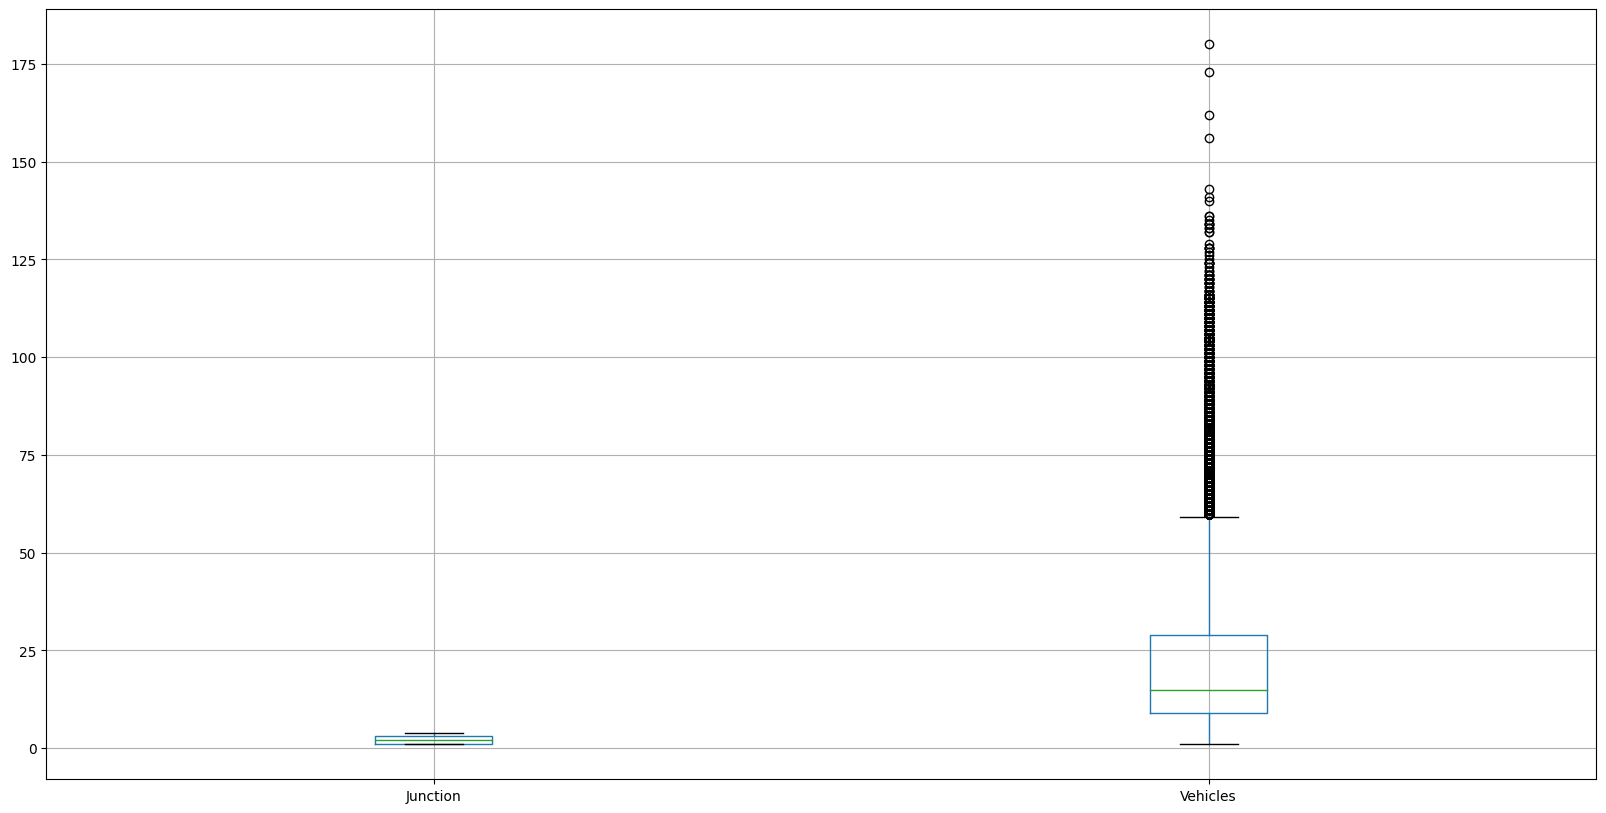

In [57]:
plt.figure(figsize=(20,10));
df[["Junction","Vehicles"]].boxplot();

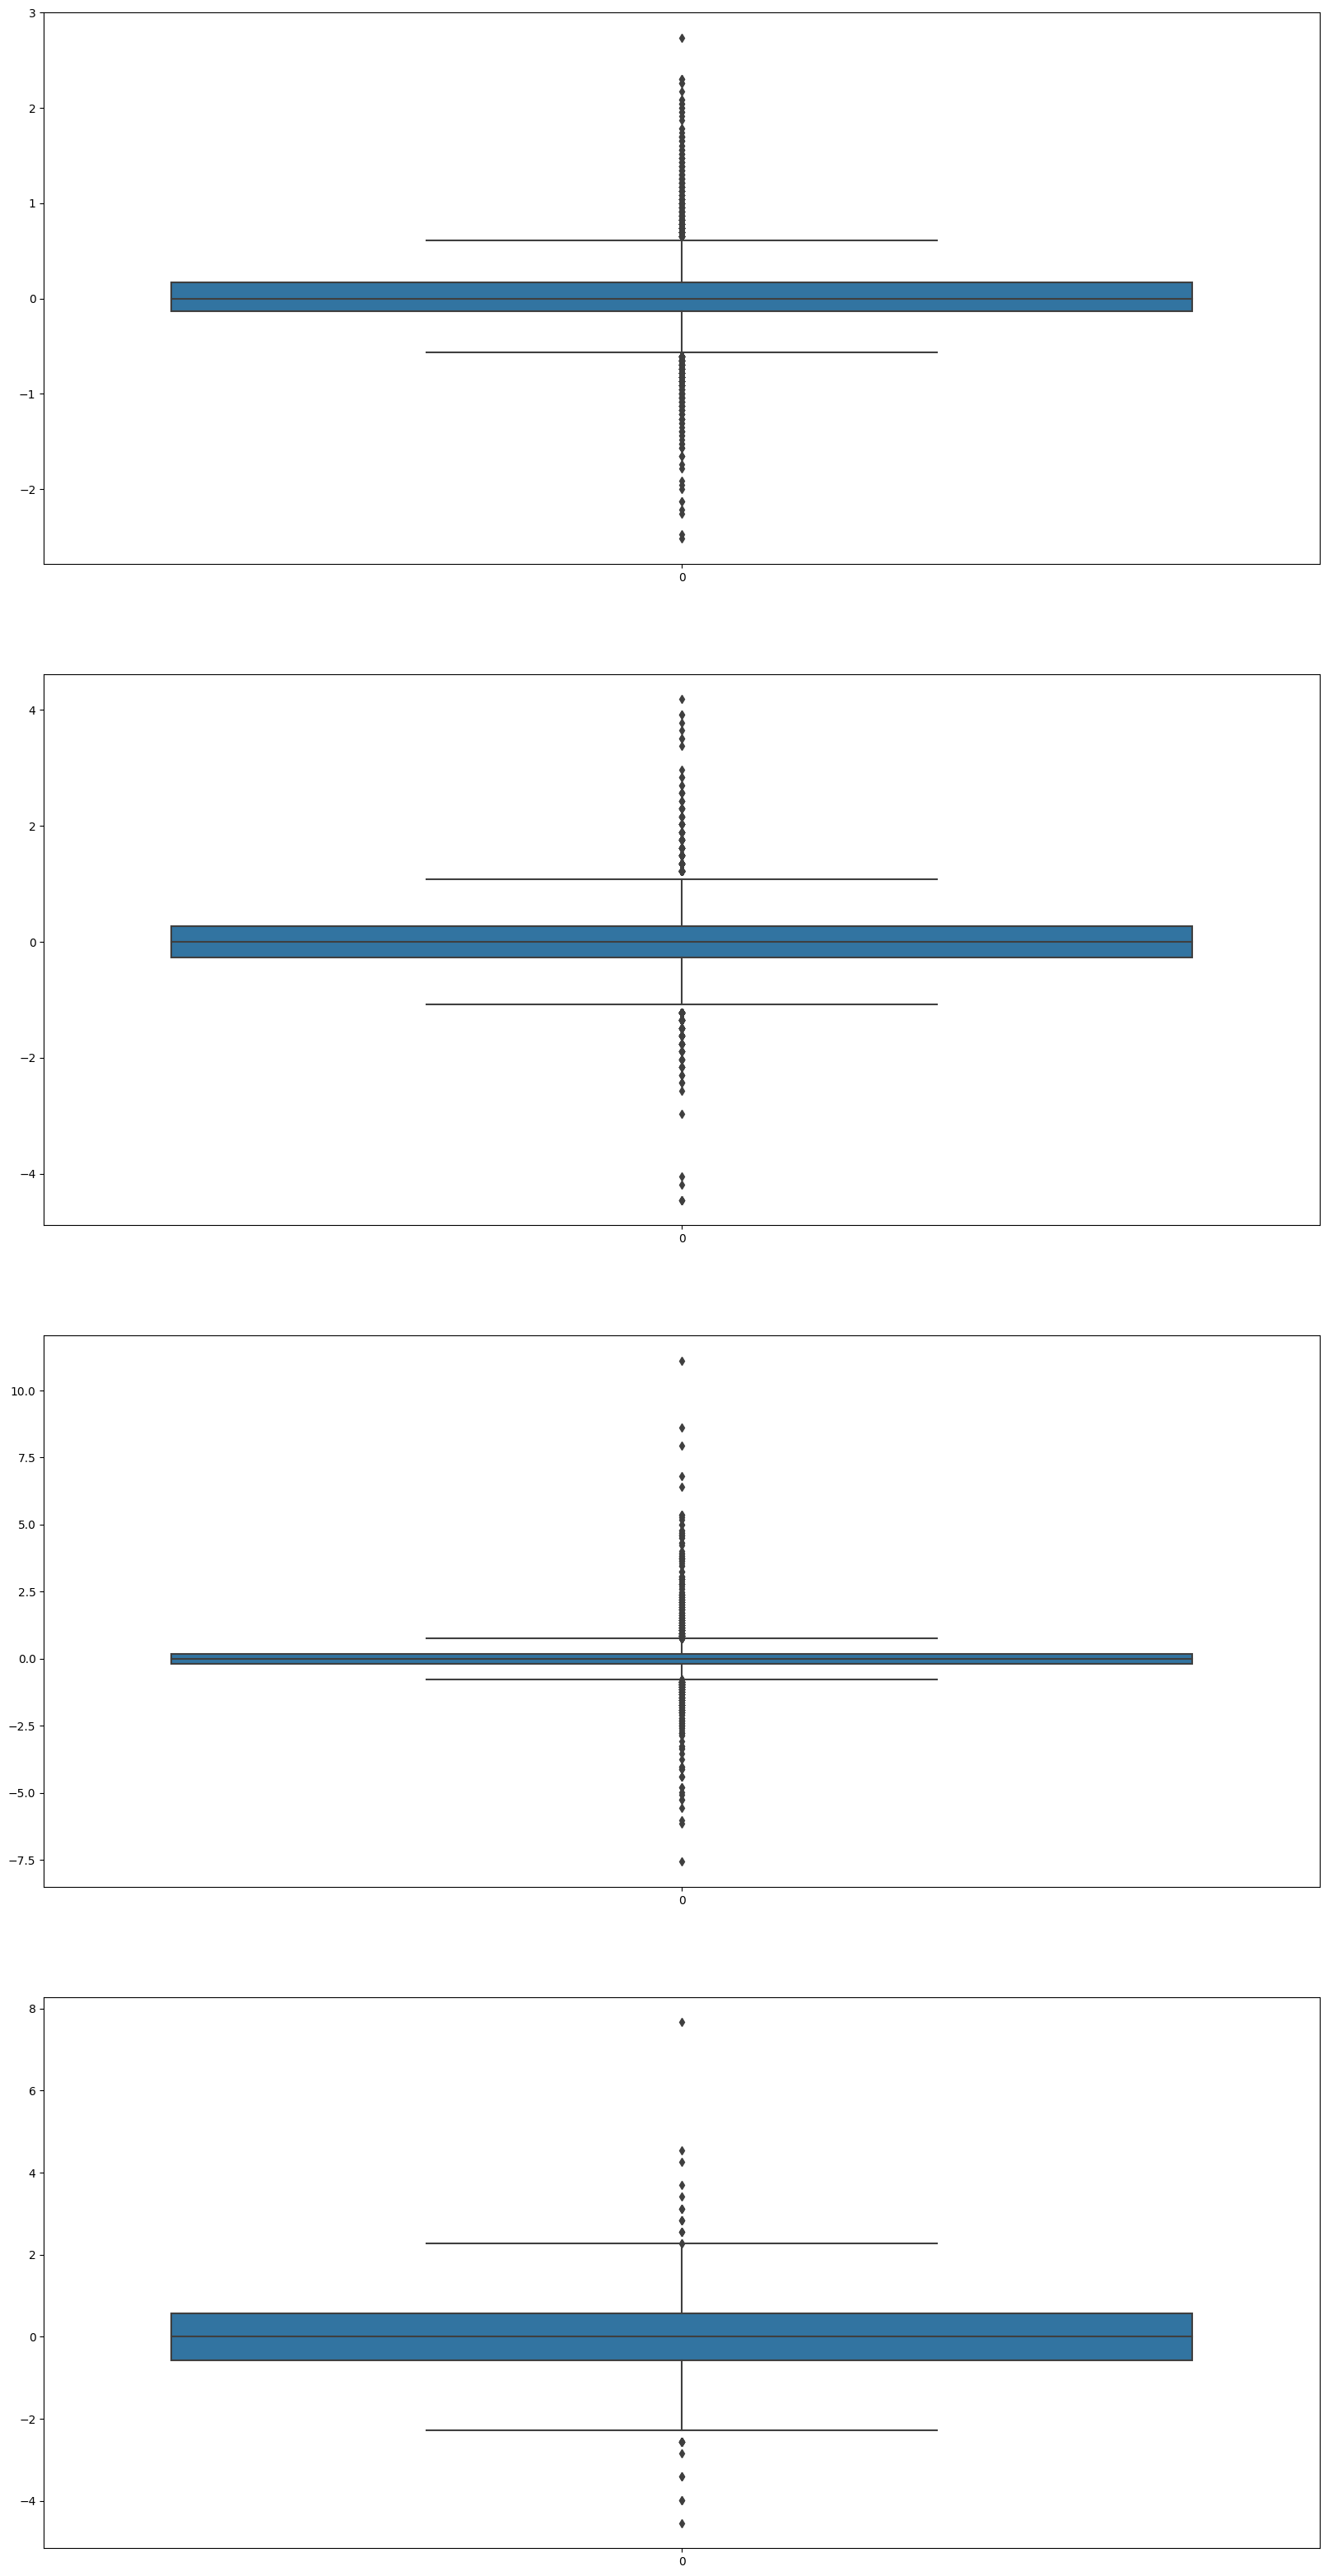

In [58]:
cs, rs = 1, len(df_Js)
plt.figure(figsize=(cs*20, rs*10))
for i, df_J_cur in enumerate(df_J_Trains):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(data = df_J_cur);

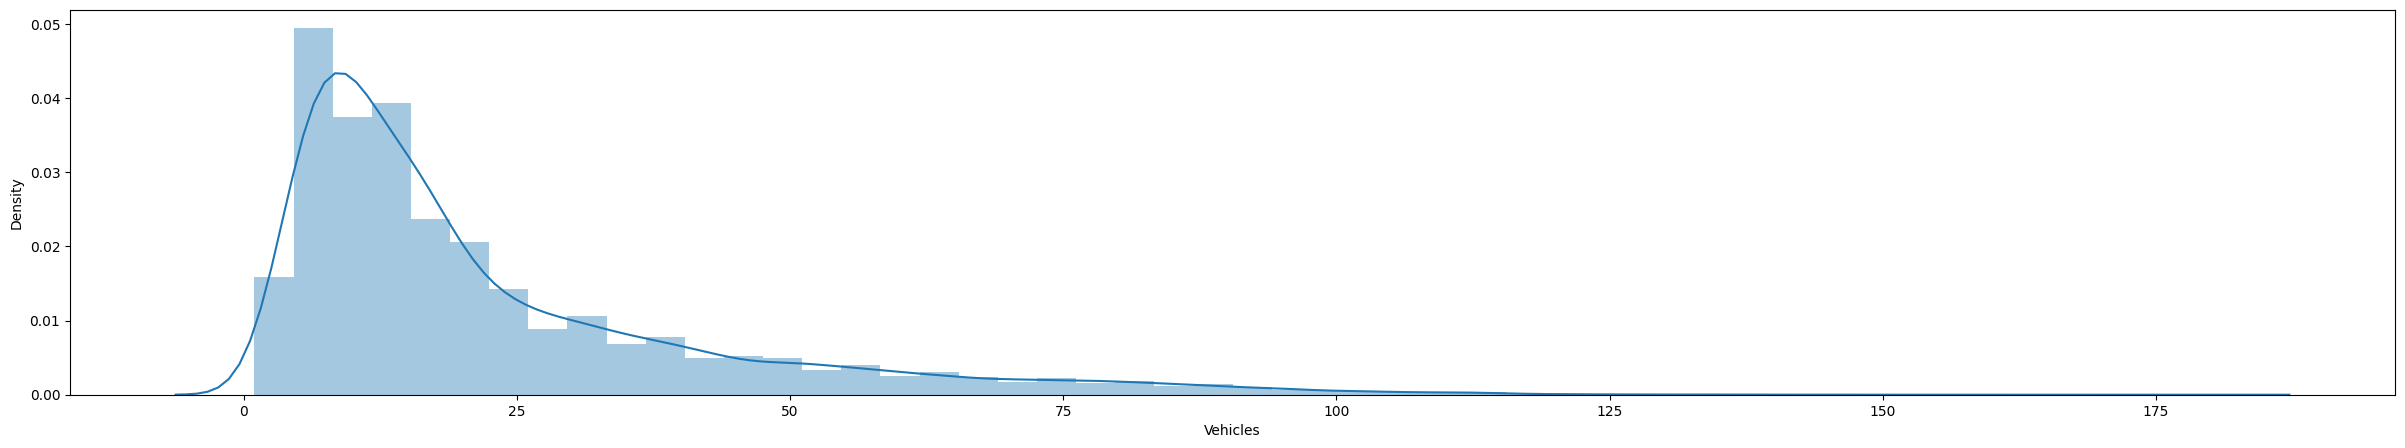

In [59]:
plt.figure(figsize=(30, 5))
sns.distplot(df[target_var]);

### IQR approach

- Note that
  - If you want to change a certain pertantage of the data for handling outliers.
    - You can adjust the ratio param forn  IQR_calculator funct to adjust inliar range.
  - If the ratio increate, 
    - outlier count will be reduce. Just the most outliers will be captured. 

#### Calculating IQR
- Calculates
  - __IQR__ pandas series for all the given variables
  - __l_th__ lower_threashold pandas series for all the given variables
  - __h_th__ higher_threashold pandas series for all the given variables

In [60]:
def IQR_calculator(df, ratio=1.5):
    # Calculating the quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR range calculation
    IQR = Q3 -Q1

    # Determinating the boundaries
    lower_threashold = Q1 - ratio * IQR
    higher_threashold = Q3 + ratio *IQR
    
    return IQR, lower_threashold, higher_threashold

In [61]:
IQR_calculations = {}
for i, df_j_cur in enumerate(df_J_Trains):
  # calcultating the IQR
  IQR, l_th, h_th = IQR_calculator(df_j_cur, ratio=1.5)

  # collecting the results
  IQR_calculations[i+1] = [IQR, l_th, h_th]

In [62]:
from pprint import pprint
for J_calss, (IQR, l_th, h_th) in IQR_calculations.items():
  print("-"*20)
  print(f"J_calss: {J_calss}")
  pprint(IQR.values)
  pprint(l_th.values)
  pprint(h_th.values)
  print("-"*20, end="\n"*2)

--------------------
J_calss: 1
array([0.30423744])
array([-0.58674363])
array([0.63020612])
--------------------

--------------------
J_calss: 2
array([0.54044511])
array([-1.08089023])
array([1.08089023])
--------------------

--------------------
J_calss: 3
array([0.38328843])
array([-0.76657686])
array([0.76657686])
--------------------

--------------------
J_calss: 4
array([1.13589426])
array([-2.27178852])
array([2.27178852])
--------------------



### Finding out The outlier values
- Finds __is_outlier__ and __is_outlier_val__ dataframes which include boolean value for ever individual value.

In [63]:
def find_outlier_single(data:pd.DataFrame, lower_threashold:float, higher_threashold:float)->pd.DataFrame:
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [64]:
def find_outlier(df:pd.DataFrame, lower_threashold:pd.Series, higher_threashold:pd.Series)->pd.DataFrame:
    data = df[lower_threashold.index]
    boolean_outlier_df = (data < lower_threashold) | (higher_threashold < data)
    return boolean_outlier_df

In [65]:
df_J_Trains[0].shape

(12981, 1)

In [66]:
IQR_calculations[1][1]

0   -0.586744
dtype: float64

In [67]:
is_outliers = {}
for i, df_j_cur in enumerate(df_J_Trains):
  
  # Extracting the calculations
  IQR, l_th, h_th = IQR_calculations[i+1]
  
  # finding out the outliers
  is_outliers[i+1] = find_outlier(df_j_cur, l_th, h_th)

is_outliers[1].head()

0
0  False
1  False
2  False
3  False
4  False

In [68]:
for i, is_outlier in is_outliers.items():print(f"J_class {i} :{int(is_outlier.sum()):>5}")

J_class 1 :  690
J_class 2 :  627
J_class 3 :  753
J_class 4 :   31


In [69]:
outlier_ratios = pd.Series()
for i, is_outlier in is_outliers.items():
  
  # calculations
  outlier_number = int(is_outlier.sum())
  outlier_ratio = np.round((outlier_number / is_outlier.count()),3)
  
  # collect the results
  outlier_ratios[f"J_class_{i}"] =  float(outlier_ratio)
  
  # display the result
  print(f"J_class {i} :{float(outlier_ratio):>5}")
  

J_class 1 :0.053
J_class 2 :0.048
J_class 3 :0.057
J_class 4 :0.008


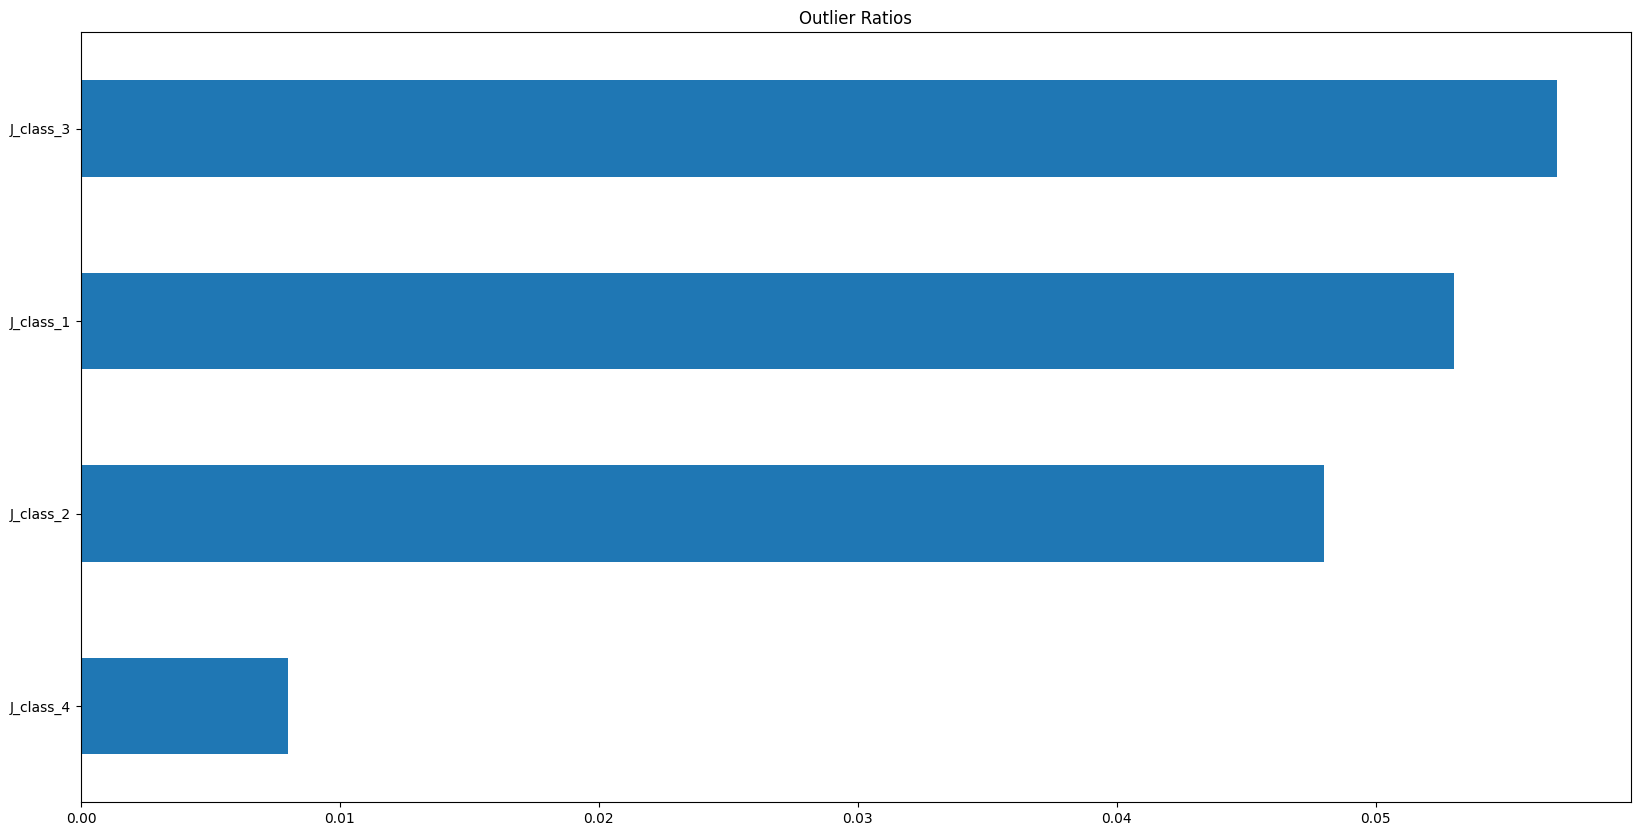

In [70]:
outlier_ratios.sort_values(ascending=True).plot.barh(figsize=(20,10), title="Outlier Ratios");

### Handling outlier
- There are no outliers in the dataset, so no handling process is implemented

#### Util Functions

In [71]:
def mean_assignment(data:pd.Series, is_outlier:pd.Series, value:float):
  "It assigns given value to the outlier values"
  data[is_outlier] = value
  return data

# usage # df["c1"] = mean_assignment(df["c1"], is_outlier["c1"], df["c1"].mean()):

In [72]:
def boundary_casting(data:pd.Series, l_th:float, h_th:float):
  "It assigns border values to the outlier values"
  
  data[ data < l_th ] = l_th
  data[ h_th < data ] = h_th

  return data

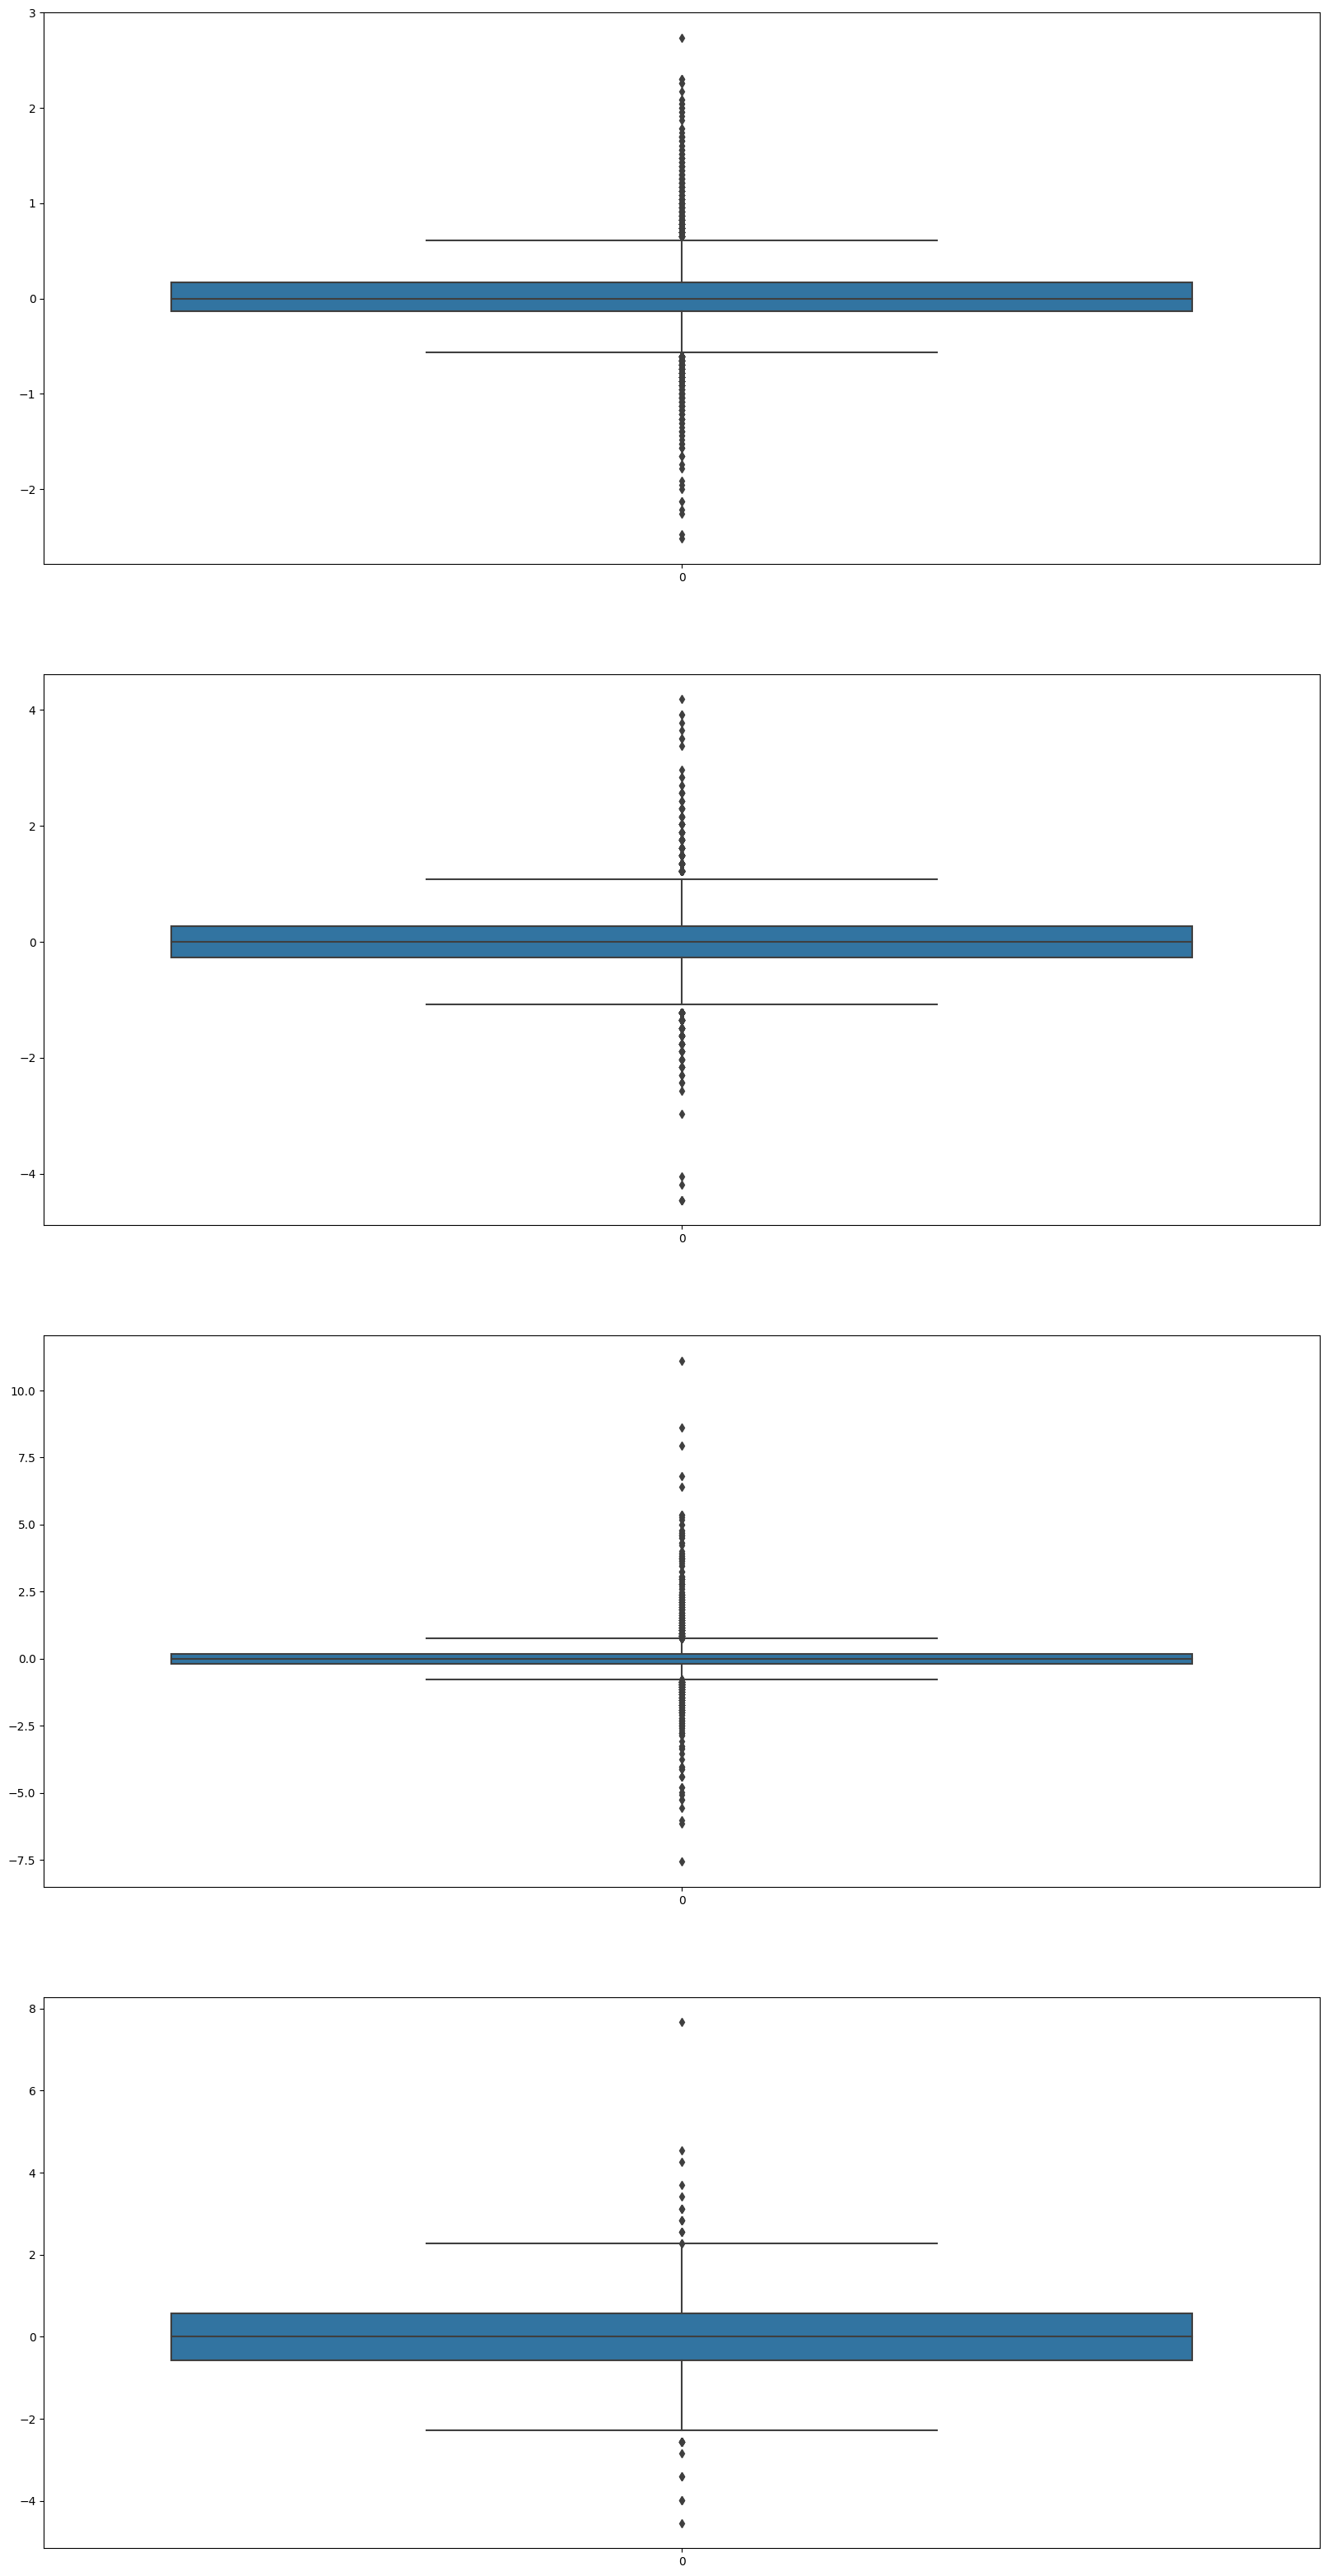

In [73]:
cs, rs = 1, len(df_Js)
plt.figure(figsize=(cs*20, rs*10))
for i, df_J_cur in enumerate(df_J_Trains):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(data = df_J_cur);

In [74]:
# handling via boundary casting

for i, df_J_cur in enumerate(df_J_Trains):

  # Extracting the calculations
  IQR, l_th, h_th = IQR_calculations[i+1]

  # outlier Handling
  df_J_cur = boundary_casting(df_J_cur, float(l_th), float(h_th))

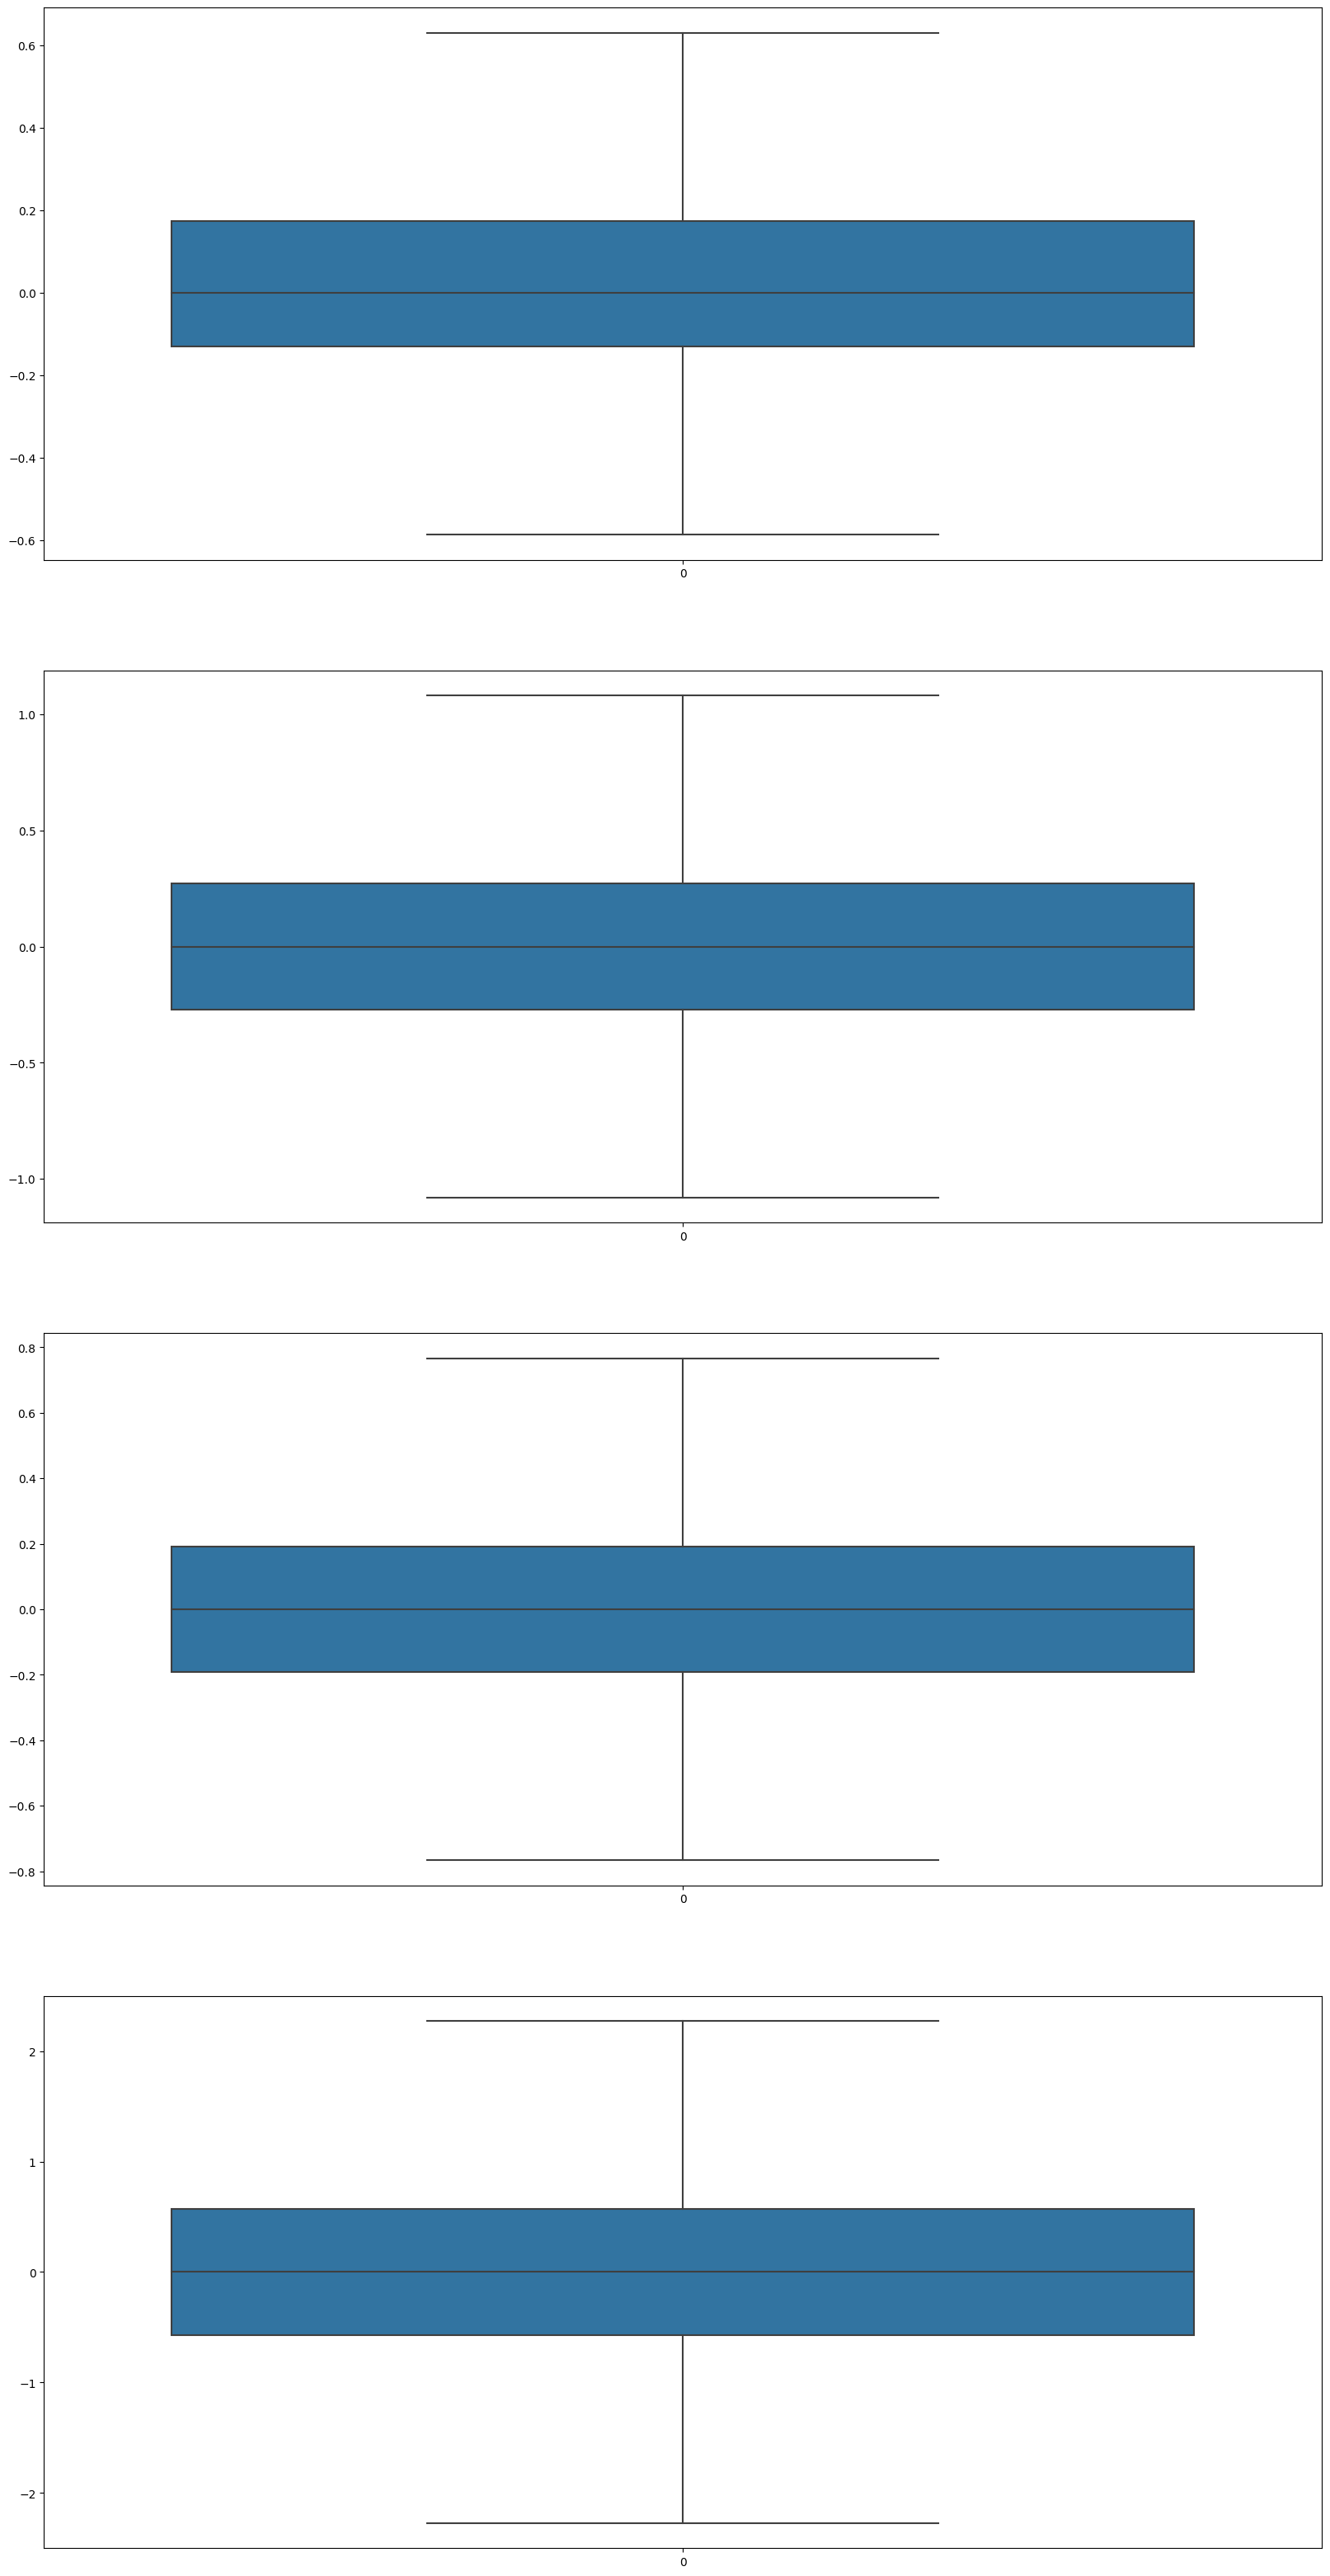

In [75]:
cs, rs = 1, len(df_Js)
plt.figure(figsize=(cs*20, rs*10))
for i, df_J_cur in enumerate(df_J_Trains):
  plt.subplot(rs, cs, i+1)
  sns.boxplot(data = df_J_cur);

# (D) Exploratory Data Analysis

## Dataset 

### Spesifications

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   Year      48120 non-null  int64         
 4   Month     48120 non-null  int64         
 5   Date_no   48120 non-null  int64         
 6   Hour      48120 non-null  int64         
 7   Day       48120 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.9+ MB


In [ ]:
df.describe().T

count         mean        std     min      25%     50%      75%  \
Junction  48120.0     2.180549   0.966955     1.0     1.00     2.0     3.00   
Vehicles  48120.0    22.791334  20.750063     1.0     9.00    15.0    29.00   
Year      48120.0  2016.269825   0.616093  2015.0  2016.00  2016.0  2017.00   
Month     48120.0     5.884289   3.569872     1.0     3.00     5.0     9.00   
Date_no   48120.0    15.700748   8.784073     1.0     8.00    16.0    23.00   
Hour      48120.0    11.500000   6.922258     0.0     5.75    11.5    17.25   

             max  
Junction     4.0  
Vehicles   180.0  
Year      2017.0  
Month       12.0  
Date_no     31.0  
Hour        23.0

In [ ]:
pd.unique(df.select_dtypes(include=["object","category"]).values.ravel('k'))

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

## Univariate Analysis

In [ ]:
num_cols = df.select_dtypes(include=("int64","float64"), exclude=("bool") ).columns
cat_cols = df.select_dtypes(exclude=("int64","float64")).columns

In [ ]:
num_cols

Index(['Junction', 'Vehicles', 'Year', 'Month', 'Date_no', 'Hour'], dtype='object')

In [ ]:
len(df.columns), df.columns

(8,
 Index(['DateTime', 'Junction', 'Vehicles', 'Year', 'Month', 'Date_no', 'Hour',
        'Day'],
       dtype='object'))

In [ ]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Day       48120 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 752.0+ KB


In [ ]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   Year      48120 non-null  int64
 3   Month     48120 non-null  int64
 4   Date_no   48120 non-null  int64
 5   Hour      48120 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


### Target Variable

In [ ]:
target_var = "Vehicles"

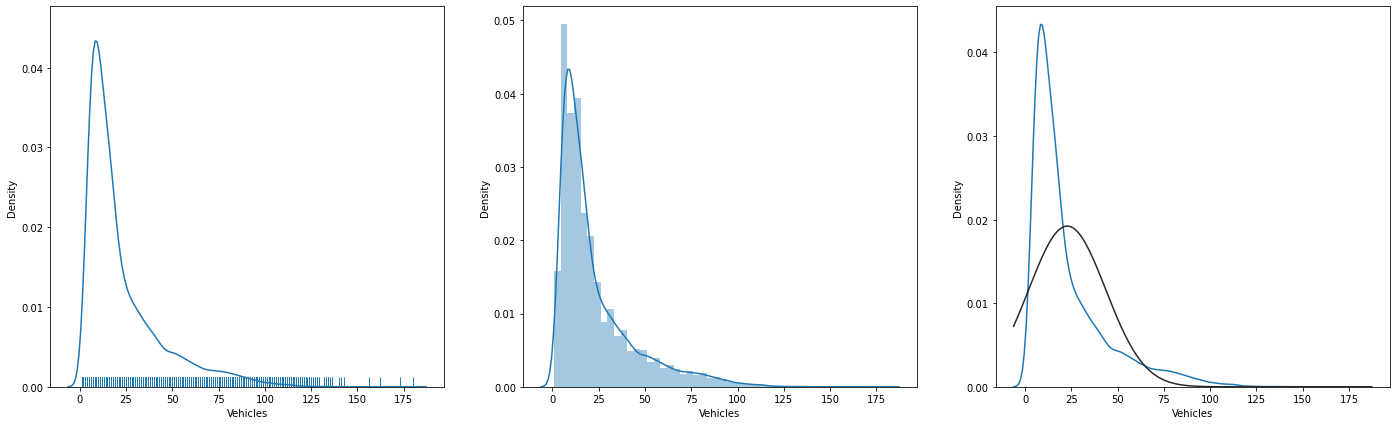

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(24,7))

plt.subplot(1,3,1)
sns.distplot(df[target_var], rug=True, hist=False);

plt.subplot(1,3,2)
sns.distplot(df[target_var], rug=False, hist=True);

plt.subplot(1,3,3)
sns.distplot(df[target_var], fit=norm, rug=False, hist=False);

### Feature Variables [Numerical]

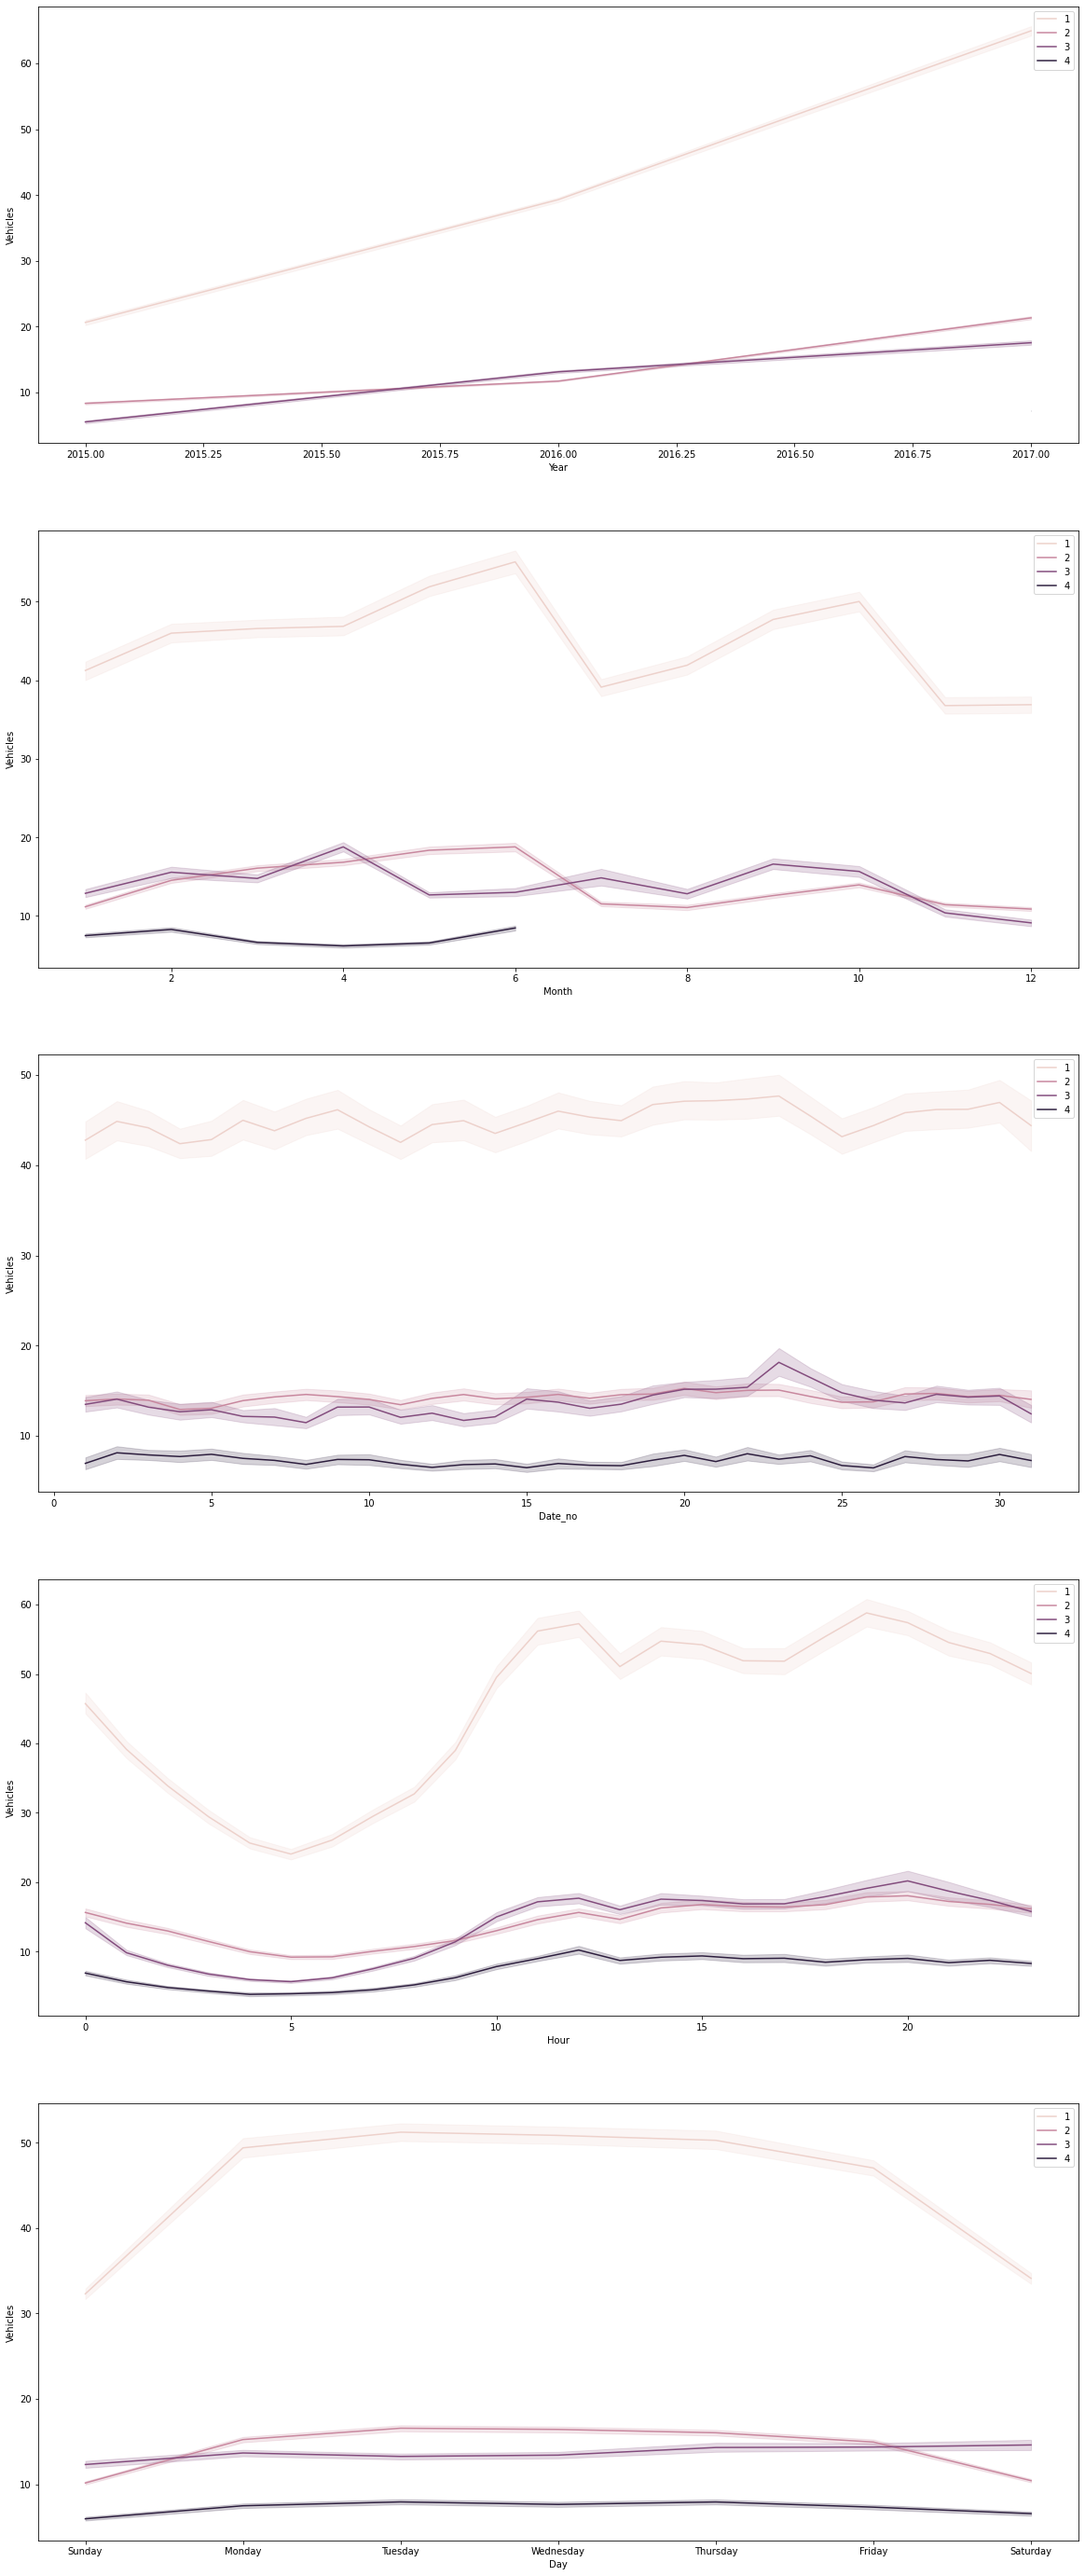

In [ ]:
periods = [ "Year","Month", "Date_no", "Hour", "Day"]
cs, rs =1 , len(periods)

plt.figure(figsize=(cs*20,rs*10))
for i, period in enumerate(periods):
    plt.subplot(rs, cs, i+1)
    sns.lineplot(data=df, x=df[period], y="Vehicles", hue="Junction")
    plt.legend()

#### setting the plotting params

In [ ]:
# Defining the params
target_var = "Vehicles"
#num_cols = df.select_dtypes(exclude='category').columns
num_col_size = len(num_cols)
cols, rows = (3, num_col_size//3 + 1) if num_col_size > 5 else (5, 1) 
figsize = (cols*7, rows*5)

#### [histplot] Distributions

In [ ]:
num_cols

Index(['Junction', 'Vehicles', 'Year', 'Month', 'Date_no', 'Hour'], dtype='object')

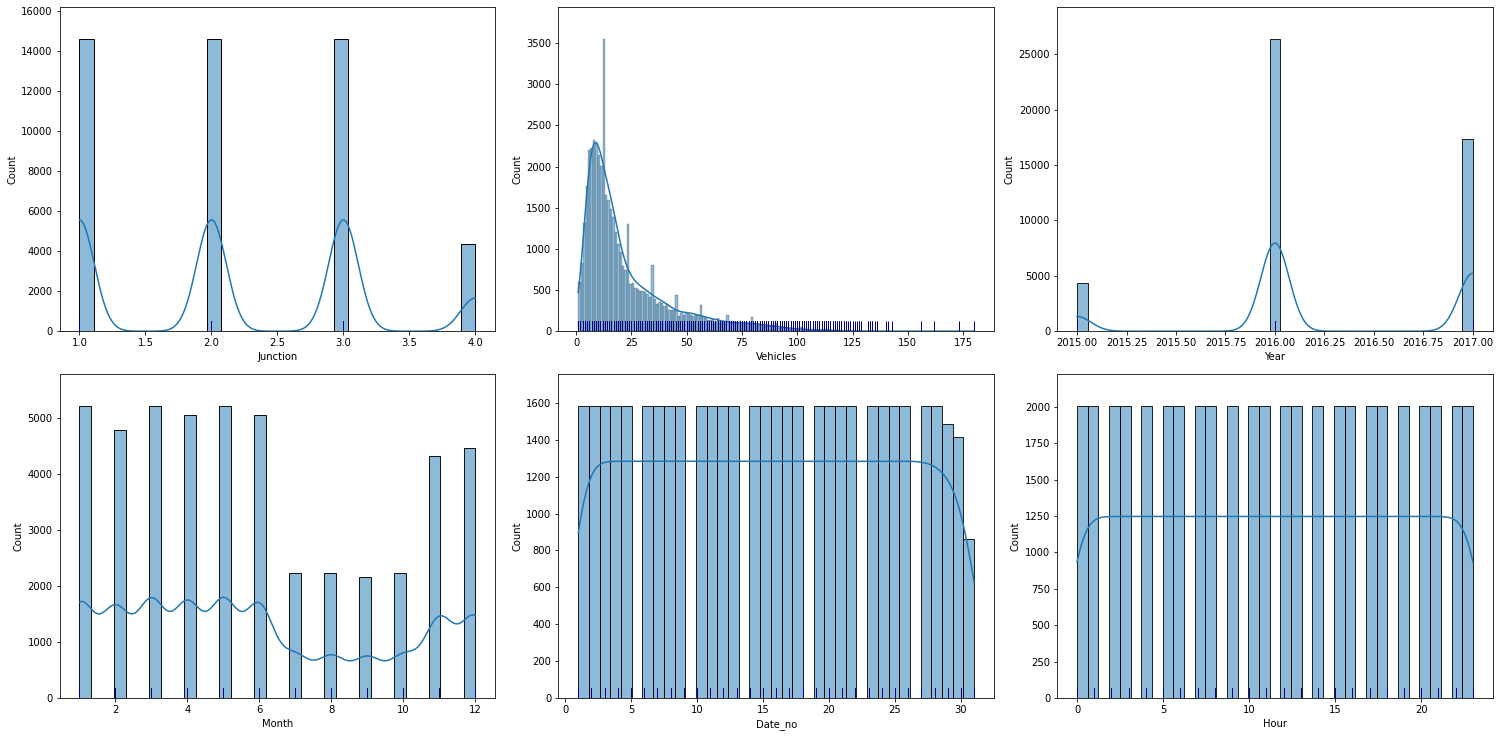

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=df[col], data=df, kde=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

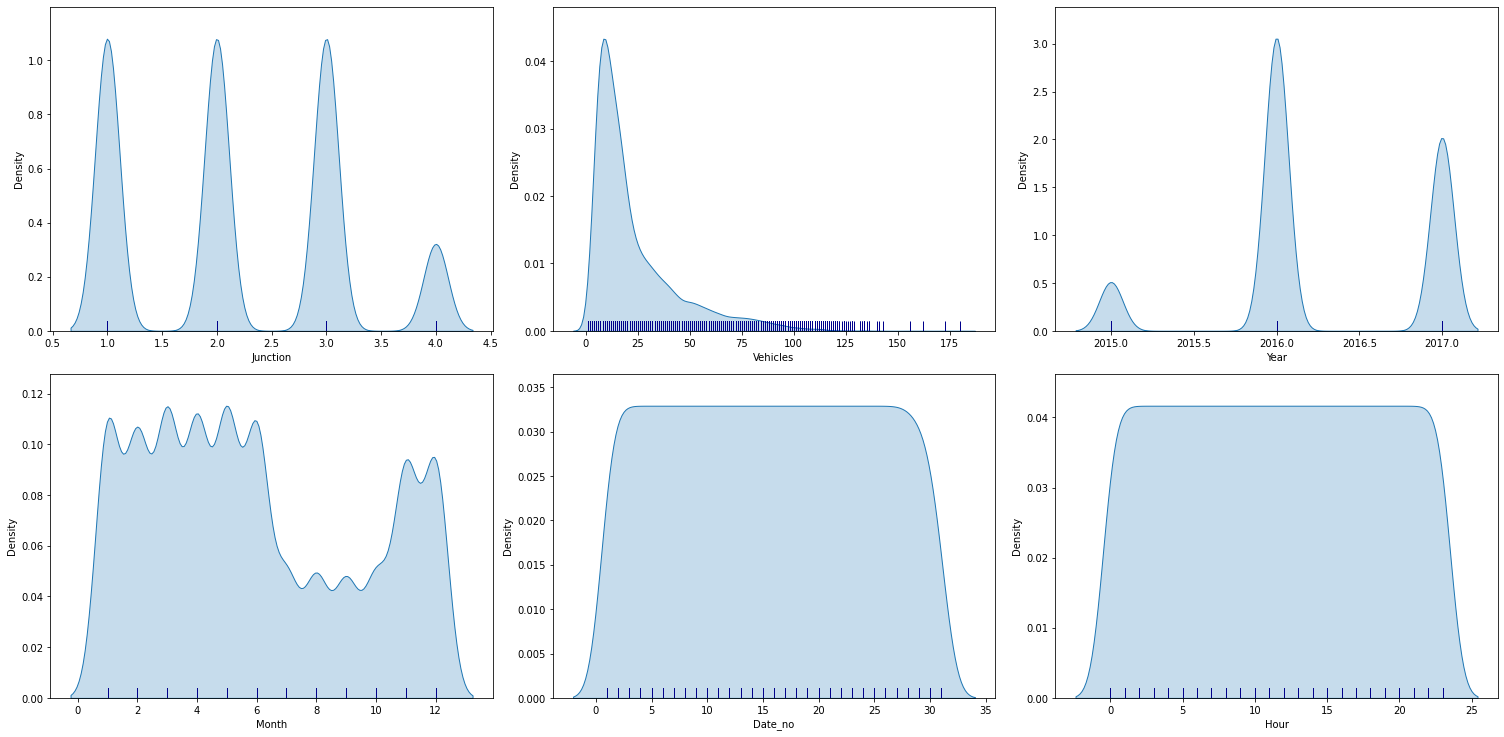

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x=df[col], data=df ,shade=True, ax=ax)
    sns.rugplot(x=df[col], data=df, height=.03, color='darkblue', ax=ax)
    
fig.tight_layout()  
plt.show()

#### [boxplot] Distributions with quartiles (Outlier)

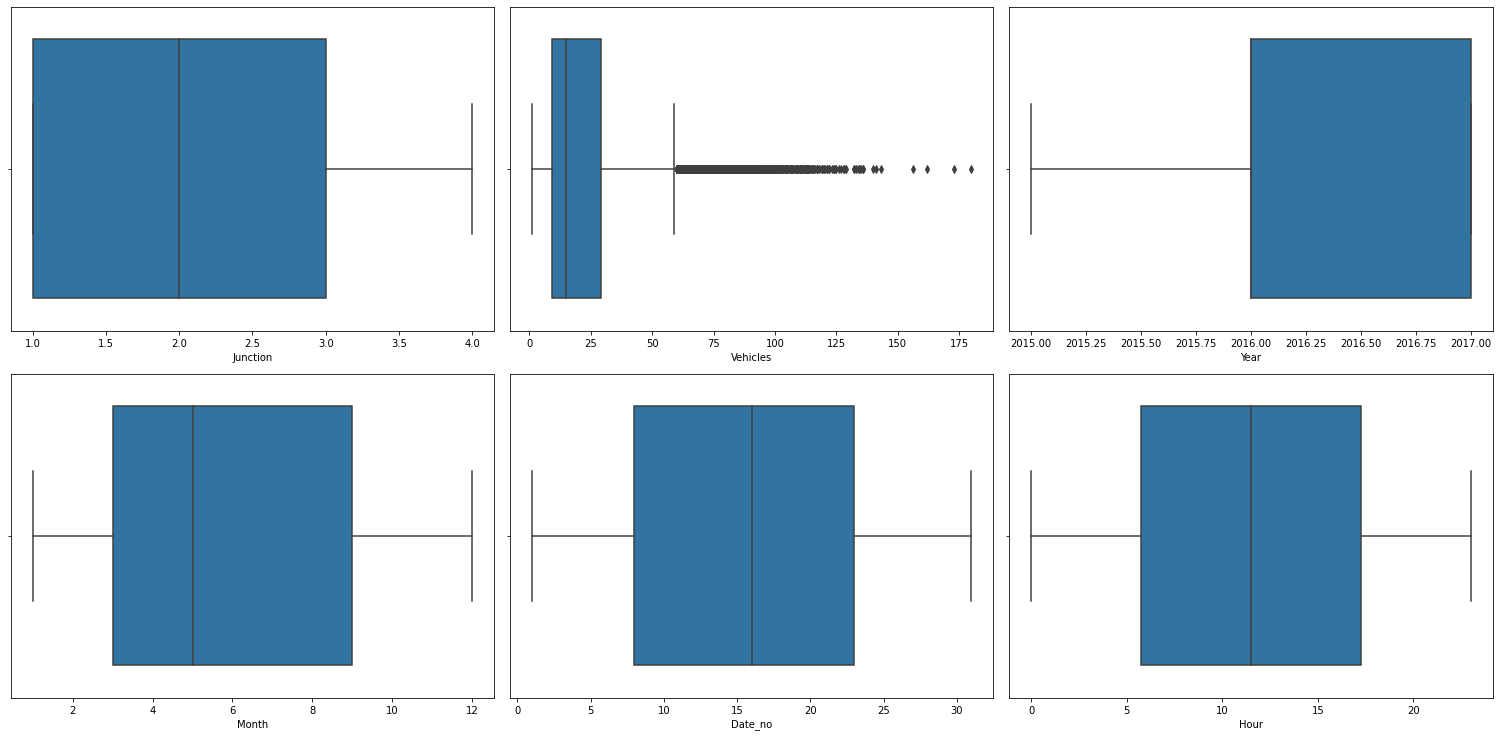

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [violinplot] Distributions with quartiles and density

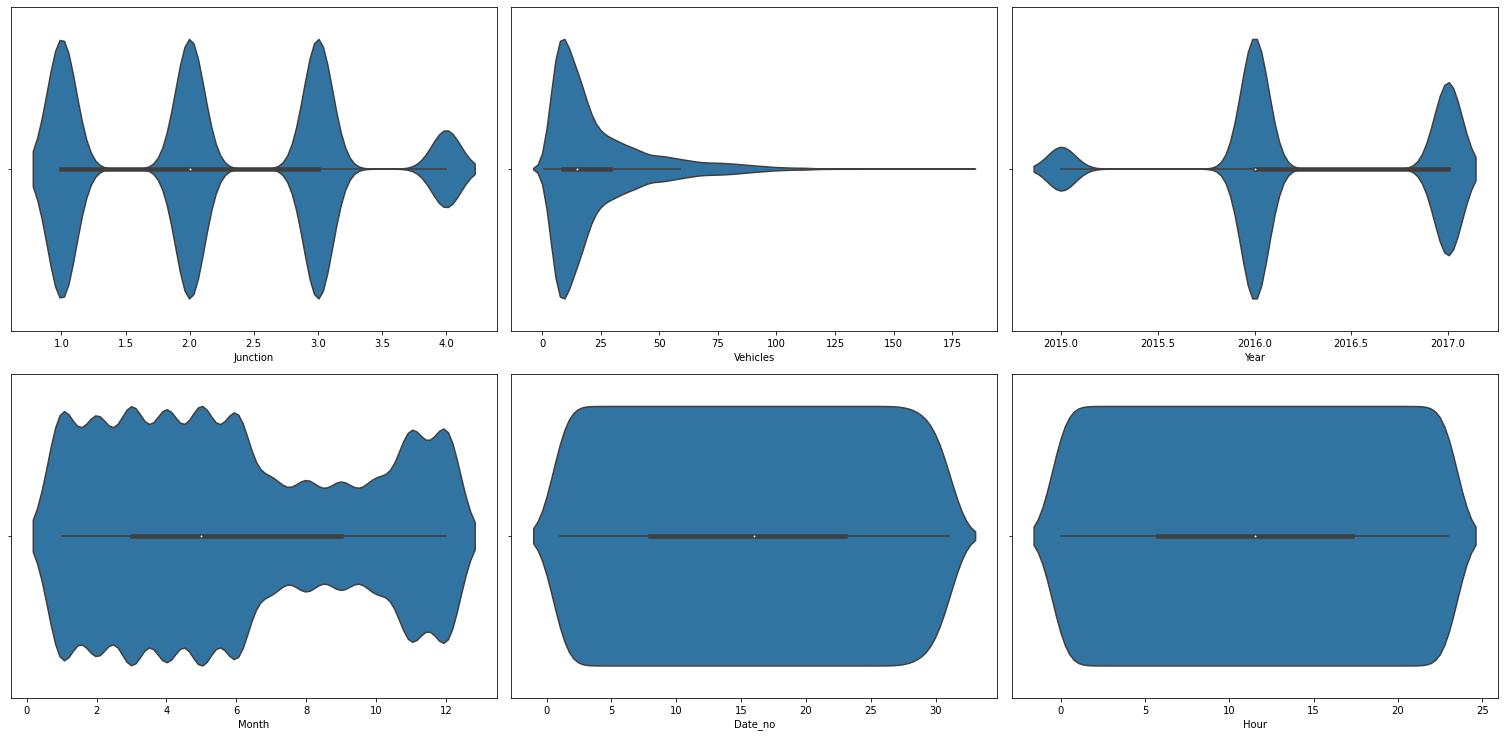

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # violinplot
    sns.violinplot(x=df[col], show_medians=True, ax=ax)
    
fig.tight_layout()  
plt.show()

#### [stripplot] spread of the data with stripplot

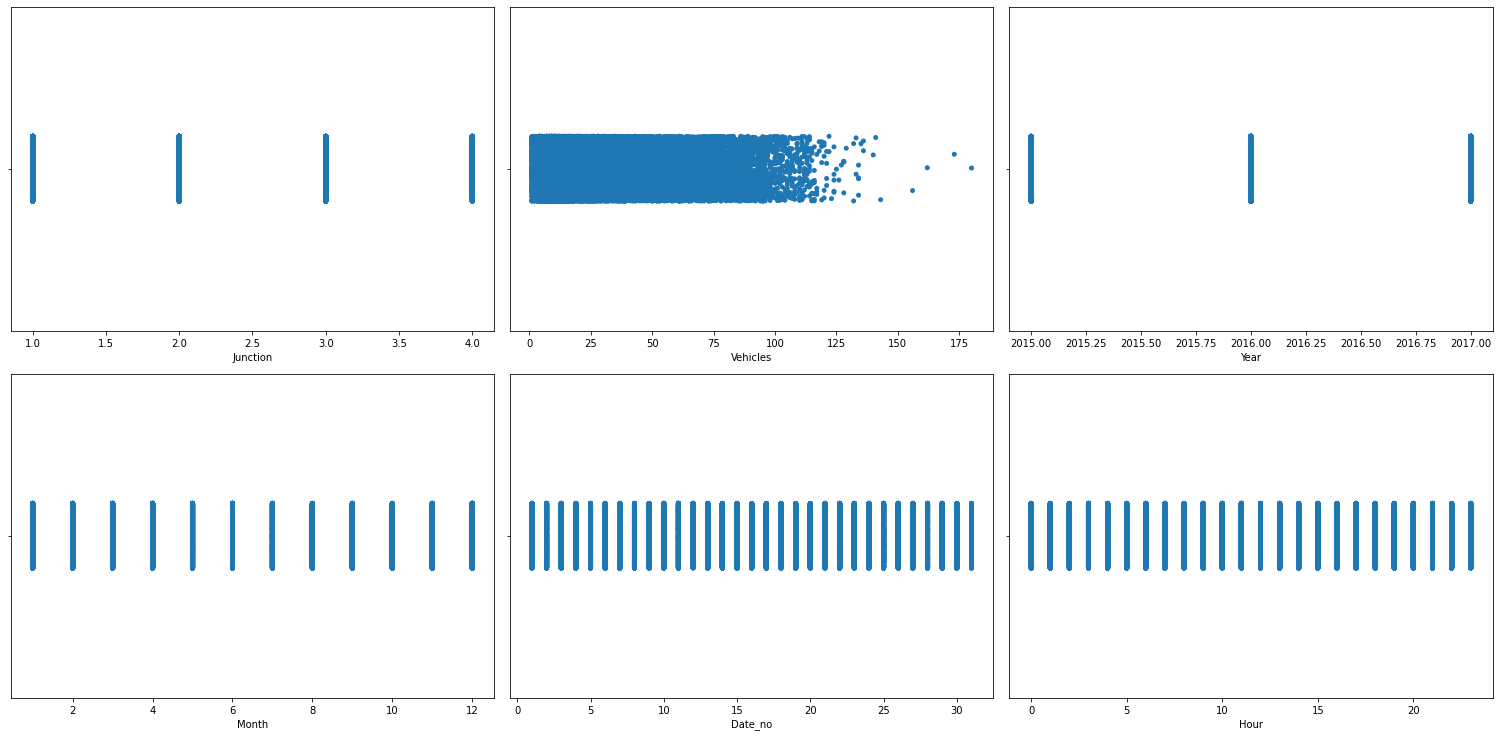

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # stripplot
    sns.stripplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [swarmplot] spread of the data with stripplot (avoids overlap)
```python
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # swarmplot
    sns.swarmplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()
```

#### [scatterplot] Spread of data 

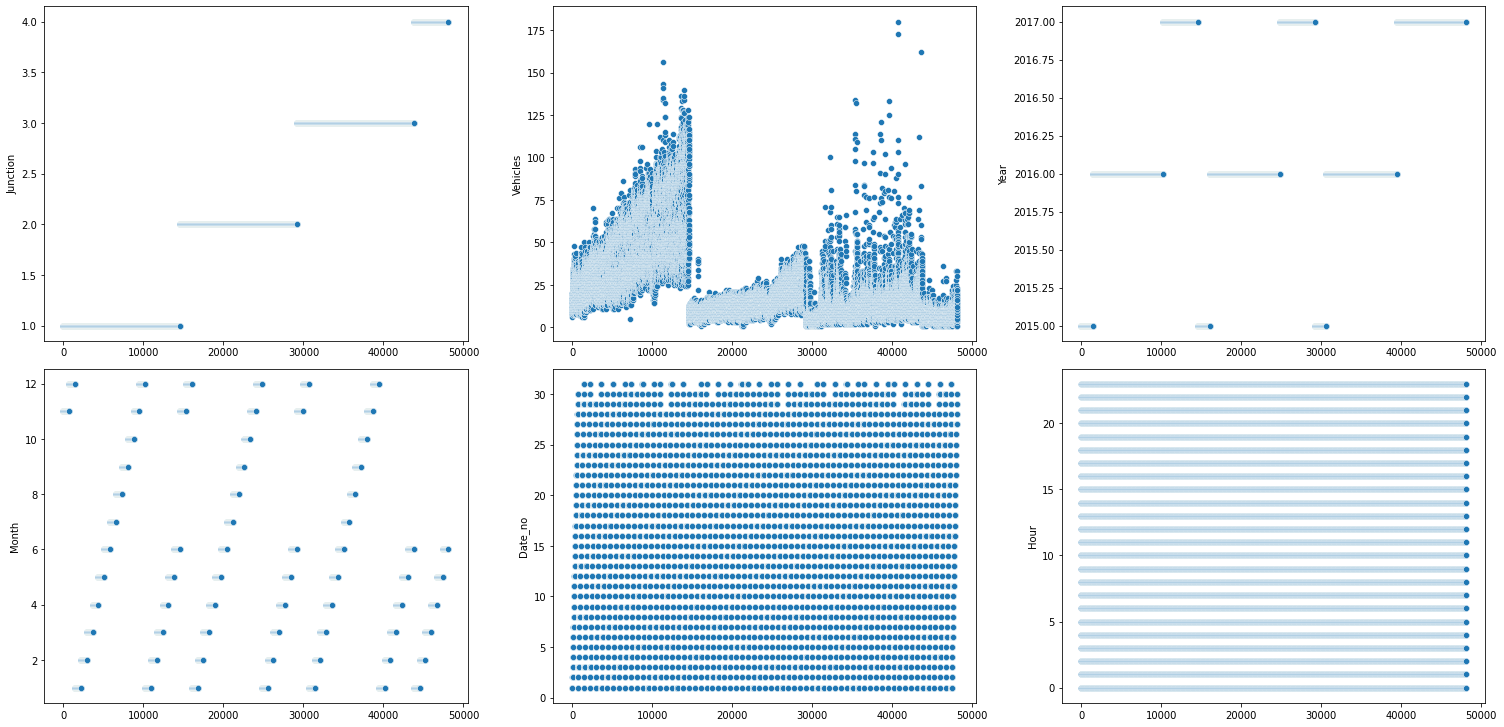

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # scatterplot
    sns.scatterplot(x = df[col].index, y= df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### [lineplot] Trend

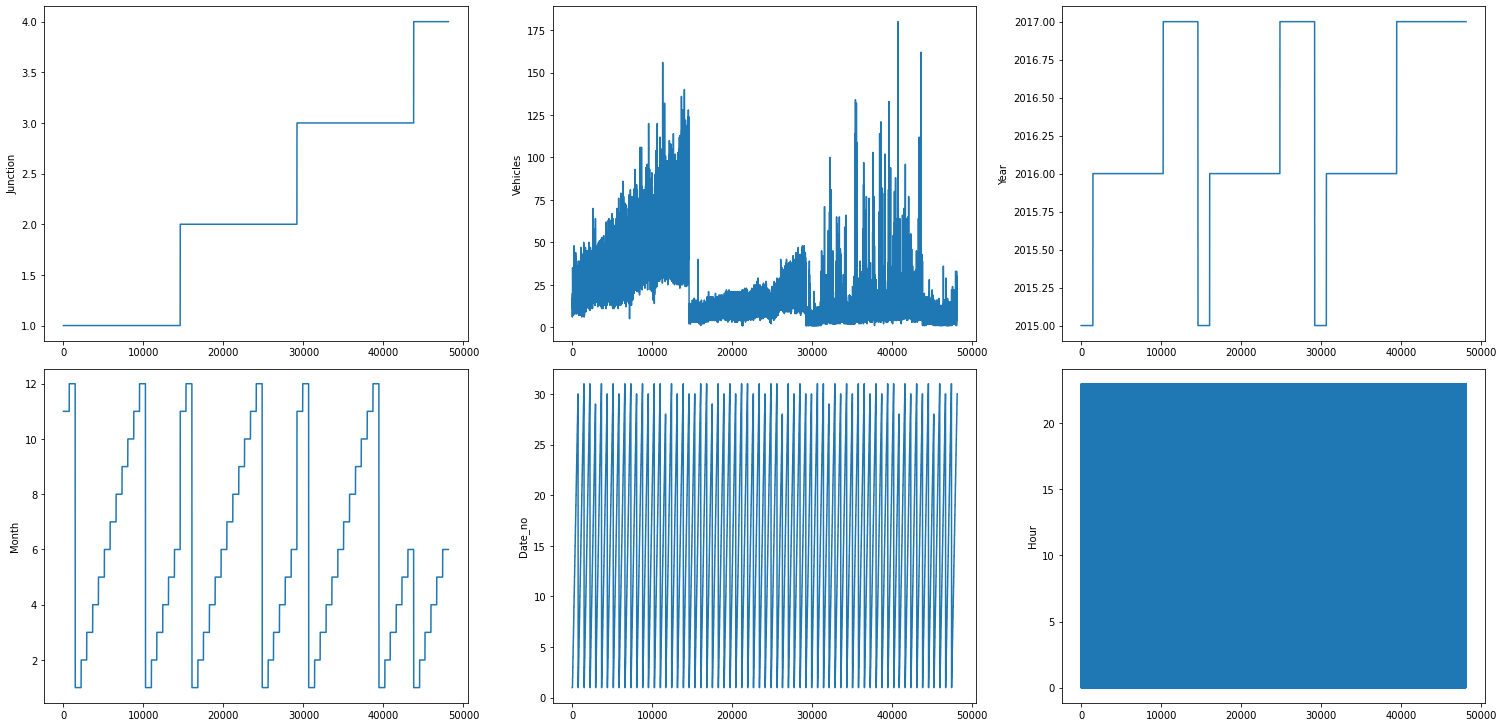

In [ ]:
fig = plt.figure(figsize=figsize)
for i, col in enumerate(num_cols):
    
    # creating new axis for plotting
    ax=fig.add_subplot( rows, cols, i+1)
    
    # boxplot
    sns.lineplot(x=df[col].index, y=df[col], ax=ax)
    #sns.scatterplot(x = df[col].index, y= df[col], hue=df["species"], ax=ax)
    
fig.tight_layout()  
plt.show()

## Relations

### Quick Variable Relation

In [ ]:
def rel_filter(df:pd.DataFrame, th:float)->pd.DataFrame:
  # Calculating the relations
  corr = df.corr()

  # filtering the relations
  filtered_corr = corr[corr > th]  if th > 0.0 else corr[corr < th]

  return filtered_corr

def rel_plotter(corr:pd.DataFrame, title:str="Correlations", figsize:tuple=None, cmap="Blues", annot=True):
  
  # plotting configurations
  if figsize != None: plt.figure(figsize=figsize)

  # plotting the relattions
  sns.heatmap(corr, cmap="Blues", annot=True)
  plt.title(title);

def get_relations(corr:pd.DataFrame, th:float)->list:

  # decleration of params
  columns = corr.columns
  is_exceed = (lambda rel: rel > th)  if th > 0 else (lambda rel: rel < th)  

  # getting the column names which exceedes the threashold
  filtered_relations = list()
  for row in columns:
    for col in columns:
        
        # Pass the correaltion with itself
        if col==row: continue

        # Collect variables which exvide threashold correlation 
        cur_corr = corr.loc[row, col]
        if  is_exceed(cur_corr):

          # Check whether the record have already added
          is_already_added = [ all([ e in record for e in [row, col] ])  for record in filtered_relations ]
          
          # Add if it have not already added
          if not any(is_already_added): filtered_relations.append([row, col, np.round(cur_corr, 2)]) 
  
  return filtered_relations

In [ ]:
get_relations(df.corr(), 0.85), get_relations(df.corr(), 0.85)

([], [])

In [ ]:
get_relations(df.corr(), 0.5), get_relations(df.corr(), 0.5)

([], [])

In [ ]:
get_relations(df.corr(), (-0.7)), get_relations(df.corr(),  (-0.7))

([], [])

In [ ]:
get_relations(df.corr(), -0.5), get_relations(df.corr(), -0.5)

([['Junction', 'Vehicles', -0.61], ['Year', 'Month', -0.62]],
 [['Junction', 'Vehicles', -0.61], ['Year', 'Month', -0.62]])

In [ ]:
def get_var_corrs(df:pd.DataFrame, var:str, top_n:int=5, th:float=None):
  # checking the params whether valid
  if var not in df.columns: raise f"'{var}' column does not exist in the dataframe"

  # Calculating the correlation
  var_corrs = df.corr()[var].drop(var)

  # Filtering & sorting 
  if th != None:

    # Filtering
    filter = (lambda df: df[df > th] )  if th > 0 else (lambda df: df[df < th]) 
    var_corrs = filter(var_corrs)
    
    # Sorting
    is_asc = False if th > 0 else True
    var_corrs = var_corrs.sort_values(ascending=is_asc)
    var_corrs = var_corrs[:top_n]

  return var_corrs

In [ ]:
p_corrs = get_var_corrs(df, target_var, top_n=5, th=0.25)
p_corrs_names = p_corrs.index
p_corrs

Series([], Name: Vehicles, dtype: float64)

In [ ]:
n_corrs = get_var_corrs(df, target_var, top_n=5, th=-0.25)
n_corrs_names = n_corrs.index
n_corrs

Junction   -0.613787
Name: Vehicles, dtype: float64

### Correlation

In [ ]:
df.corr()

Junction  Vehicles          Year         Month       Date_no  \
Junction  1.000000e+00 -0.613787  2.212977e-01 -1.242771e-01 -2.094621e-03   
Vehicles -6.137872e-01  1.000000  2.212531e-01 -2.272345e-02  2.789498e-02   
Year      2.212977e-01  0.221253  1.000000e+00 -6.234957e-01 -7.474779e-03   
Month    -1.242771e-01 -0.022723 -6.234957e-01  1.000000e+00  9.154760e-03   
Date_no  -2.094621e-03  0.027895 -7.474779e-03  9.154760e-03  1.000000e+00   
Hour     -2.132575e-15  0.219938  7.732006e-16  4.953278e-16 -9.917806e-18   

                  Hour  
Junction -2.132575e-15  
Vehicles  2.199377e-01  
Year      7.732006e-16  
Month     4.953278e-16  
Date_no  -9.917806e-18  
Hour      1.000000e+00

<AxesSubplot:>

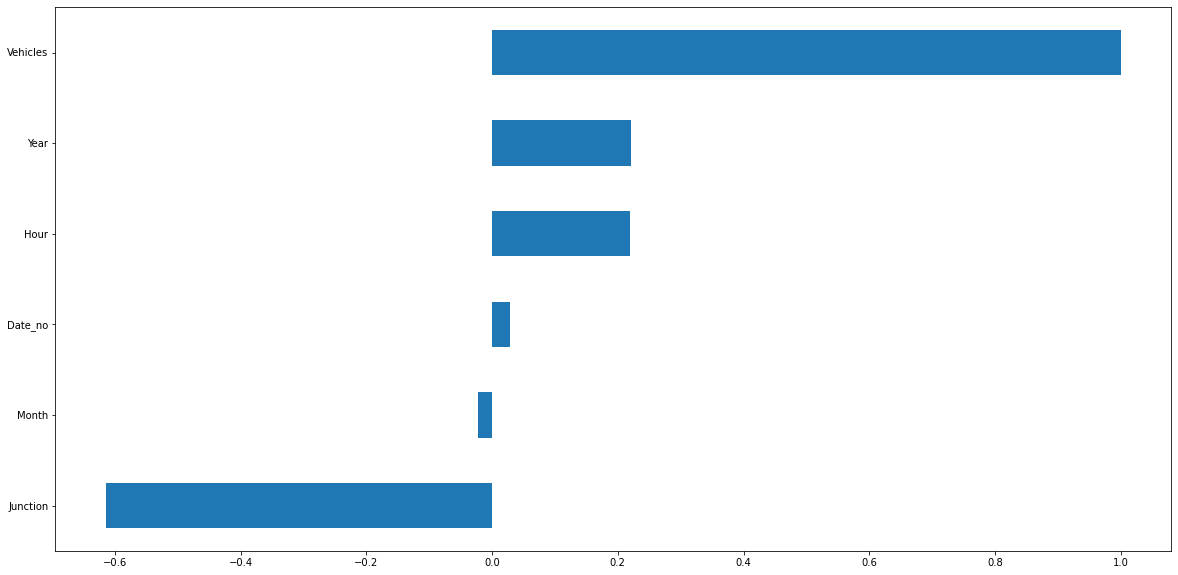

In [ ]:
# Target Variable's correlation
df.corr()[target_var].sort_values().plot(kind="barh", figsize=(20,10))

<AxesSubplot:>

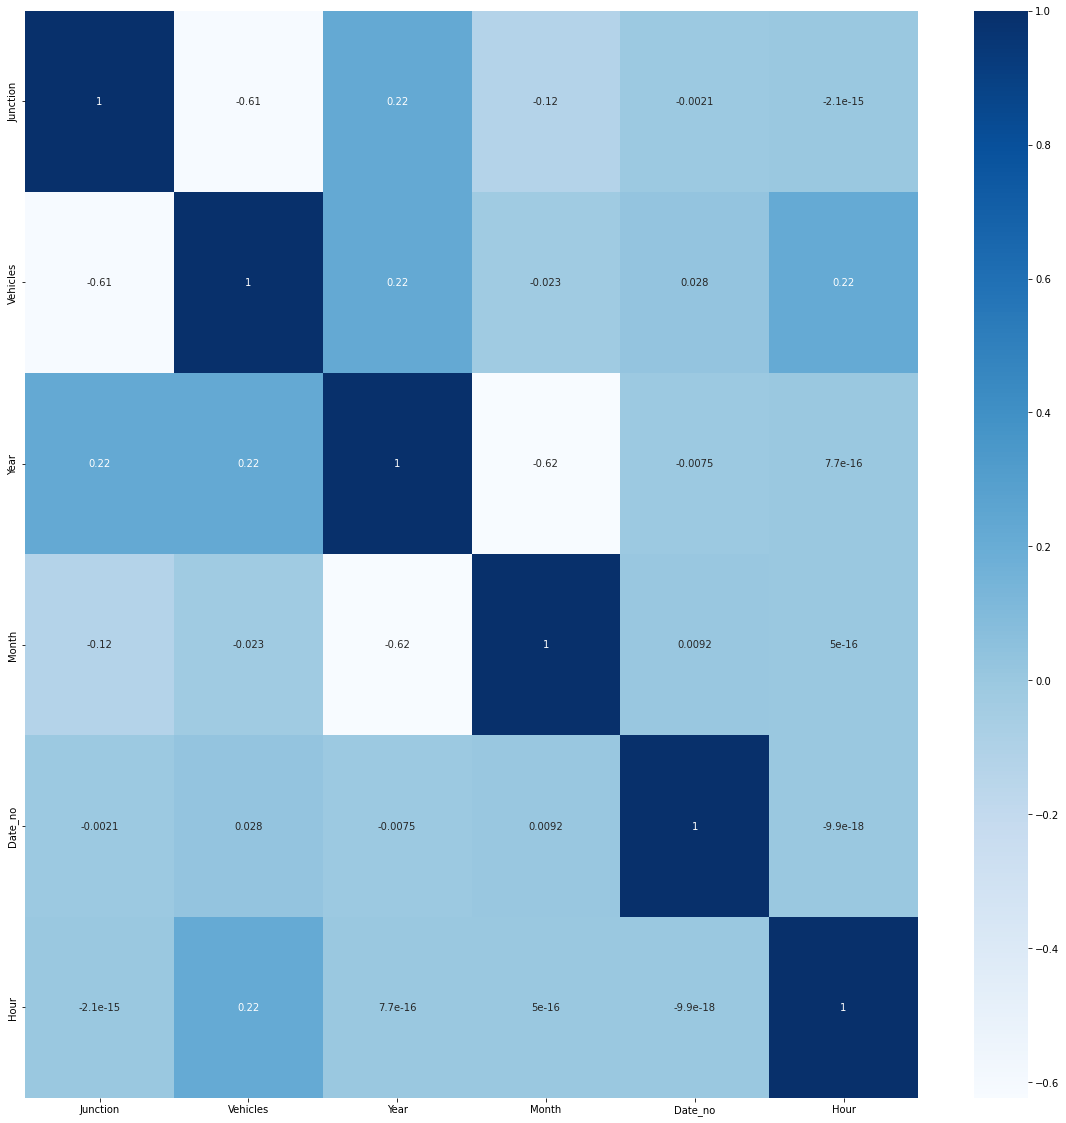

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

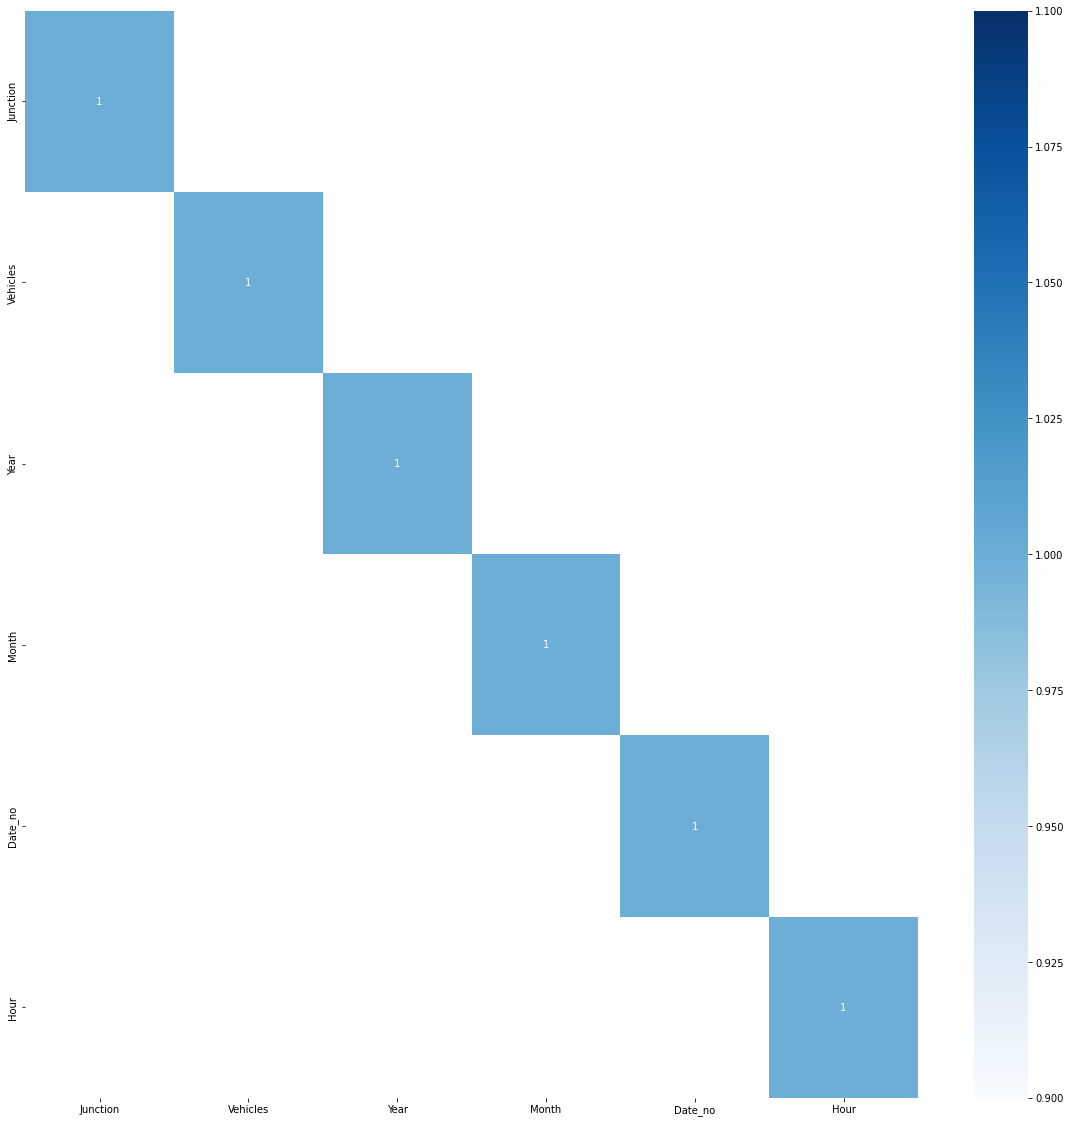

In [ ]:
plt.figure(figsize=(20,20))
th = 0.7
sns.heatmap(df.corr()[df.corr() > th], annot=True, cmap='Blues')

<AxesSubplot:>

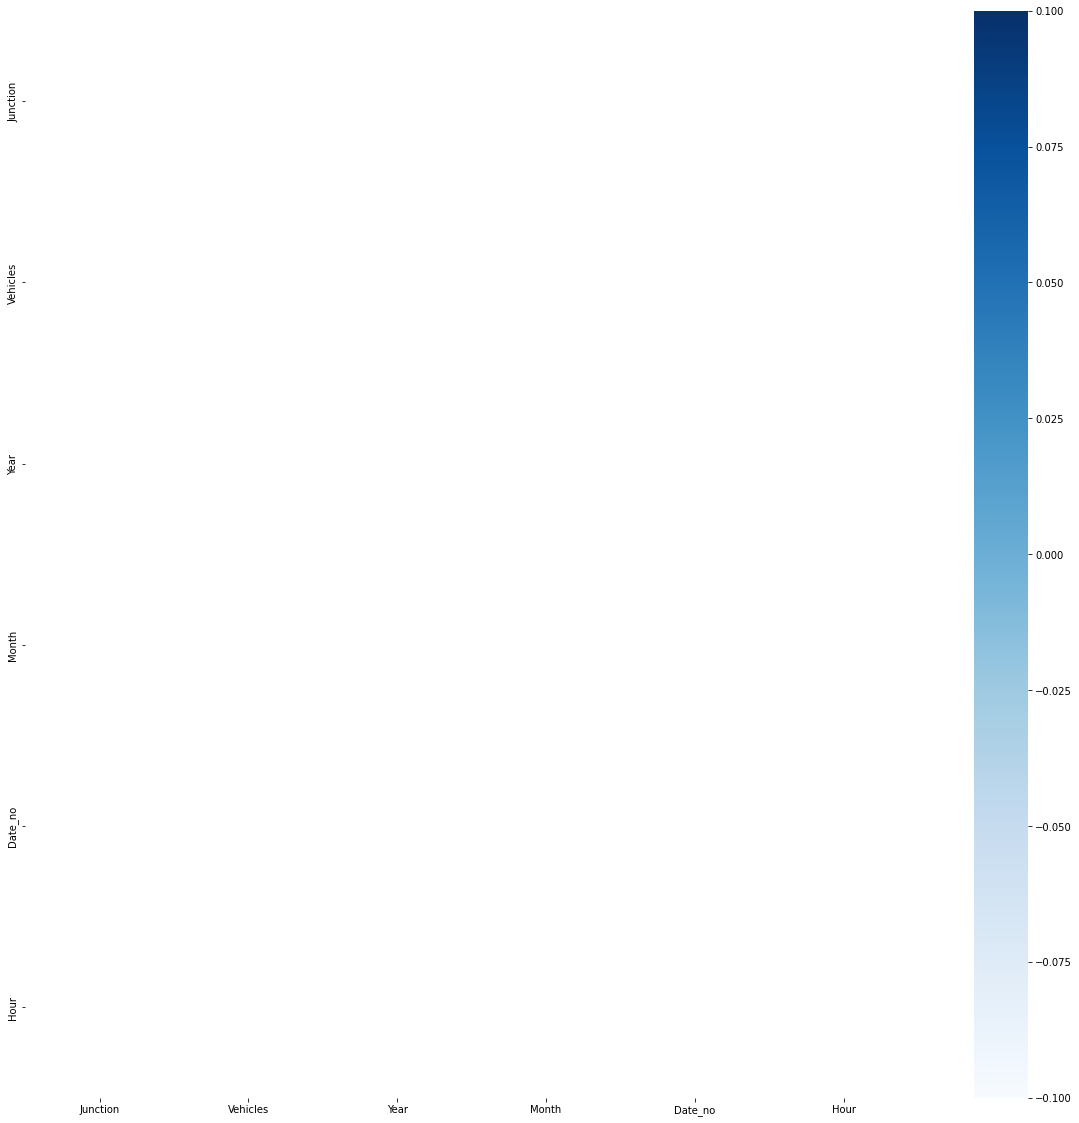

In [ ]:
plt.figure(figsize=(20,20))
th = -0.7
sns.heatmap(df.corr()[df.corr() < th], annot=True, cmap='Blues')

In [ ]:
target_sorted_corrs = df.corr()[target_var].drop(target_var).sort_values(ascending=False)
target_sorted_corrs

Year        0.221253
Hour        0.219938
Date_no     0.027895
Month      -0.022723
Junction   -0.613787
Name: Vehicles, dtype: float64

### Variances

In [ ]:
import numpy as np
variance_per_var = np.round(df.var().sort_values(ascending=False), 2)
variance_per_var

Vehicles    430.57
Date_no      77.16
Hour         47.92
Month        12.74
Junction      0.94
Year          0.38
dtype: float64

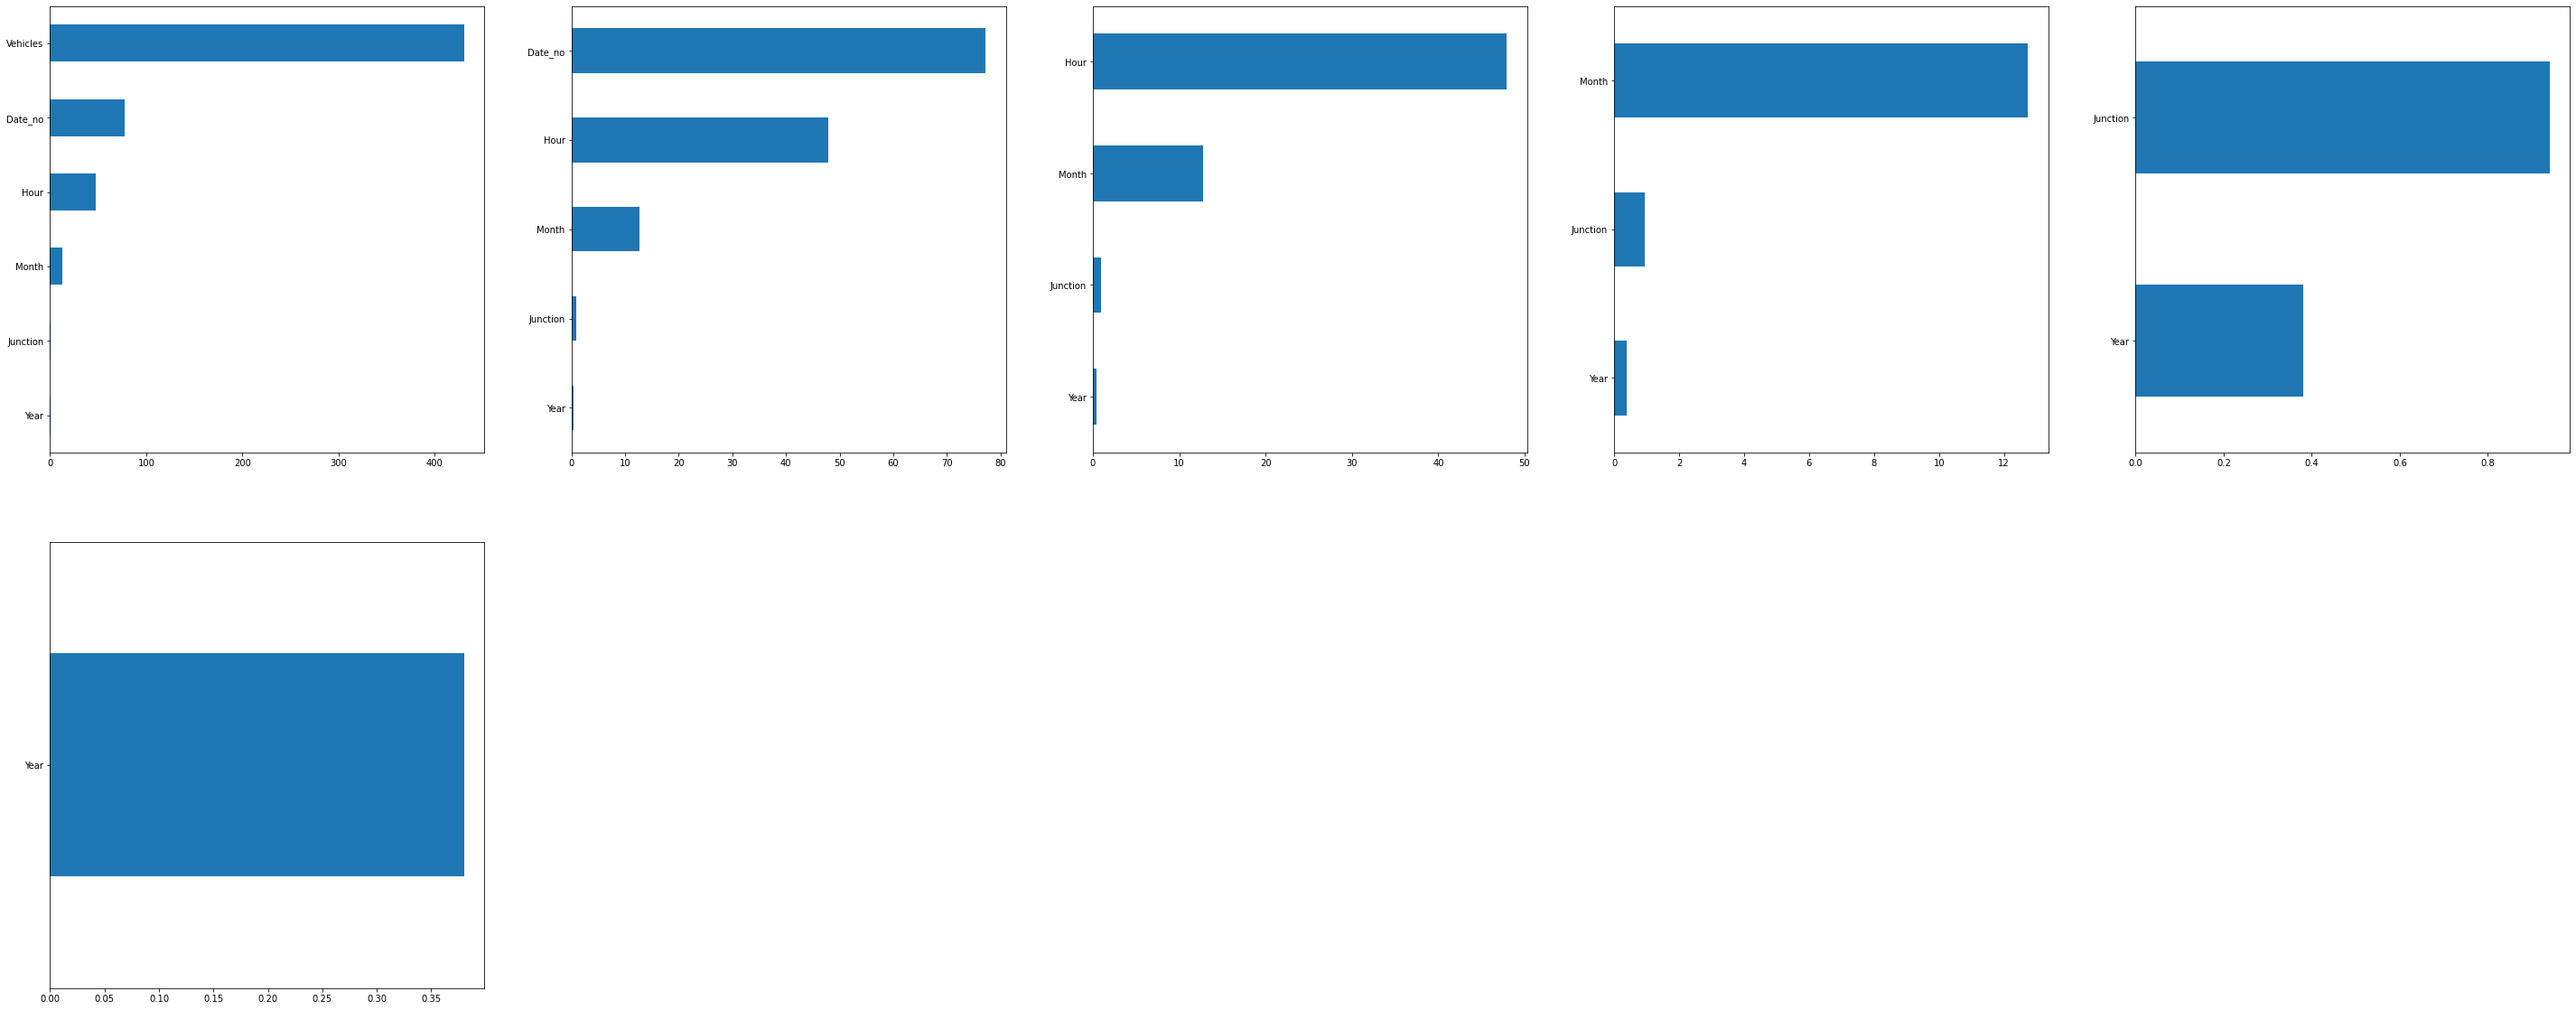

In [ ]:
size = len(variance_per_var.index)
rs,cs = (size//5+1, 5) if size >= 5 else  (size//3+1, 3)

plt.figure(figsize=(cs*10, rs*10))
for i, col_name in enumerate(variance_per_var.index):
  plt.subplot(rs, cs, i+1)
  variance_per_var[col_name:].sort_values(ascending=True).plot.barh();

In [ ]:
df.var().sort_values(ascending=False).round(2)

Vehicles    430.57
Date_no      77.16
Hour         47.92
Month        12.74
Junction      0.94
Year          0.38
dtype: float64

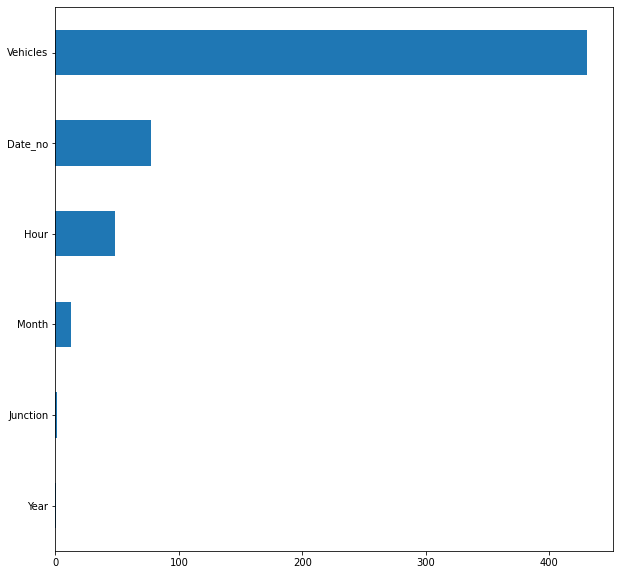

In [ ]:
plt.figure(figsize=(10, 10))
df.var().sort_values(ascending=True).plot.barh();

### Covariance between target var

#### Way-1

In [ ]:
def numerical_covariance(df, target_var):
    # Separate out numerical columns
    numerical_cols = df.select_dtypes(include=[int, float, "int8", bool]).columns

    # Create a copy of the DataFrame with only the numerical columns
    numerical_df = df[numerical_cols].copy()

    # If the target variable is categorical, encode it temporarily
    if df[target_var].dtype == 'object' or df[target_var].dtype == 'category':
        temp_encode = pd.get_dummies(df[target_var], prefix=target_var)
        numerical_df = pd.concat([numerical_df, temp_encode], axis=1)
        target_var = temp_encode.columns[0]

    # Calculate the covariance between each numerical column and the target variable
    covariances = numerical_df.cov()[target_var]

    # Return the result as a pandas Series
    return covariances

In [ ]:
covariances = np.round(numerical_covariance(df, target_var),2)
covariances

Junction    -12.32
Vehicles    430.57
Year          2.83
Month        -1.68
Date_no       5.08
Hour         31.59
Name: Vehicles, dtype: float64

<AxesSubplot:>

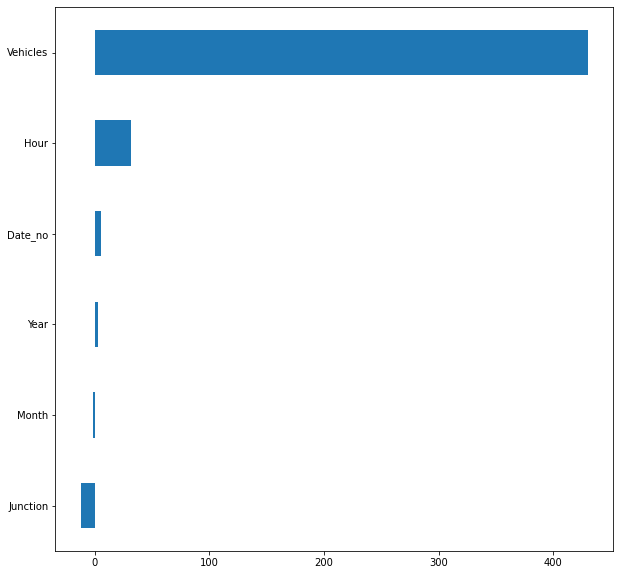

In [ ]:
plt.figure(figsize=(10, 10))
covariances.sort_values(ascending=True).plot.barh()

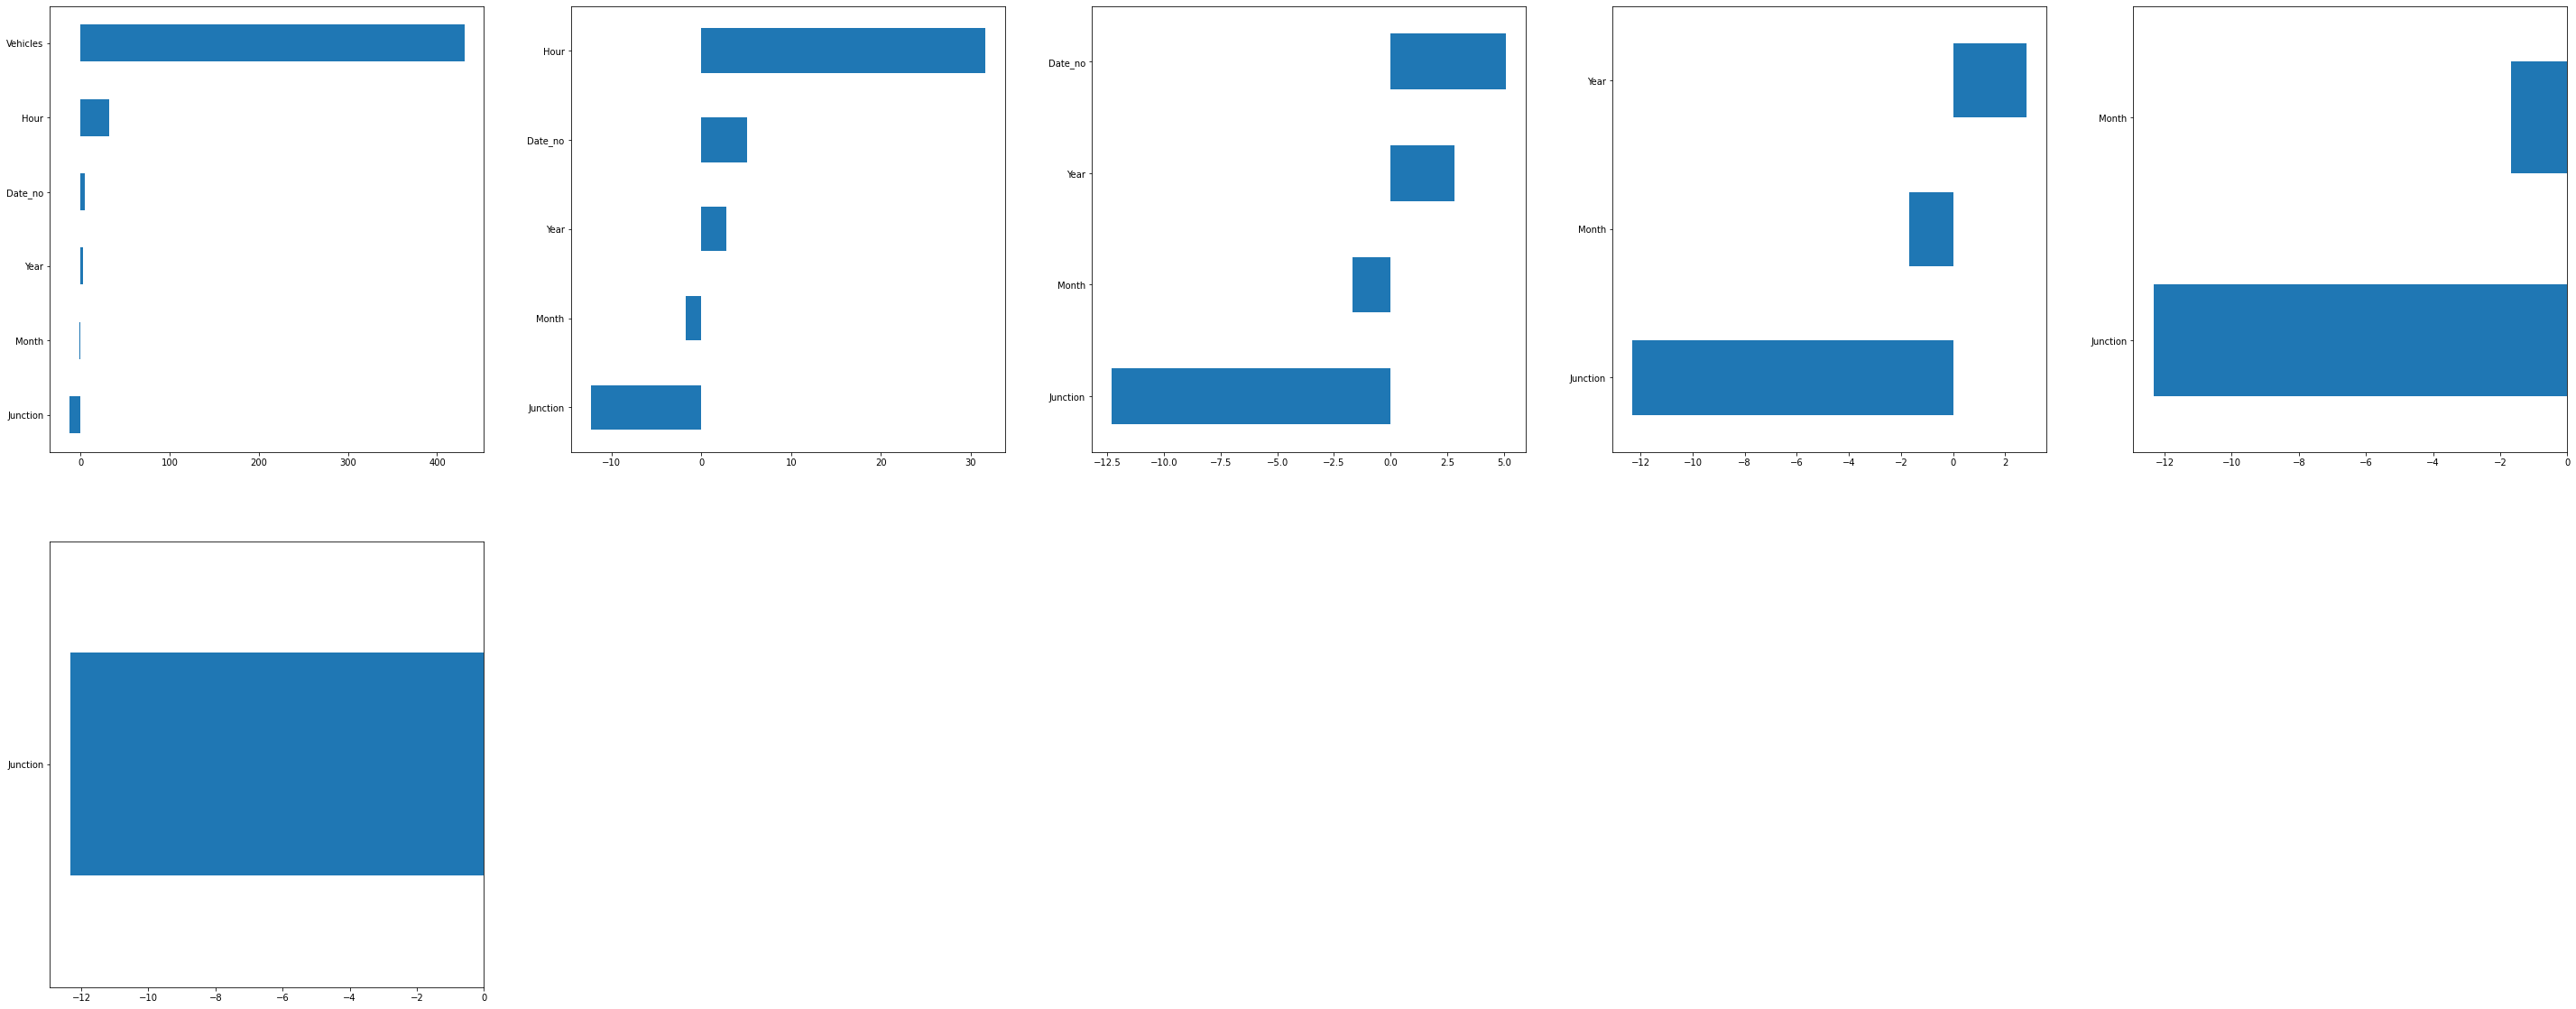

In [ ]:
cov_target = numerical_covariance(df, target_var).sort_values(ascending=False)

size = len(cov_target.index)
rs,cs = (size//5+1, 5) if size >= 5 else  (size//3+1, 3)

plt.figure(figsize=(cs*10, rs*10))
for i, col_name in enumerate(cov_target.index):
  plt.subplot(rs, cs, i+1)
  cov_target[col_name:].sort_values(ascending=True).plot.barh()

#### Way-2
```python
# Calculate the covariance between the target and the feature
cov = {  col: [ np.cov(df[target_var].cat.codes, df[col])[0,1] ] for col in num_cols }
cov_s = pd.Series(np.squeeze(list(cov.values())), index=cov.keys())
cov_s
```

## Bivariate & Multivariate Analysis

In [ ]:
num_cols

Index(['Junction', 'Vehicles', 'Year', 'Month', 'Date_no', 'Hour'], dtype='object')

In [ ]:
cat_cols

Index(['DateTime', 'Day'], dtype='object')

In [ ]:
len(df.columns) == (len(num_cols) + len(cat_cols))

True

<AxesSubplot:>

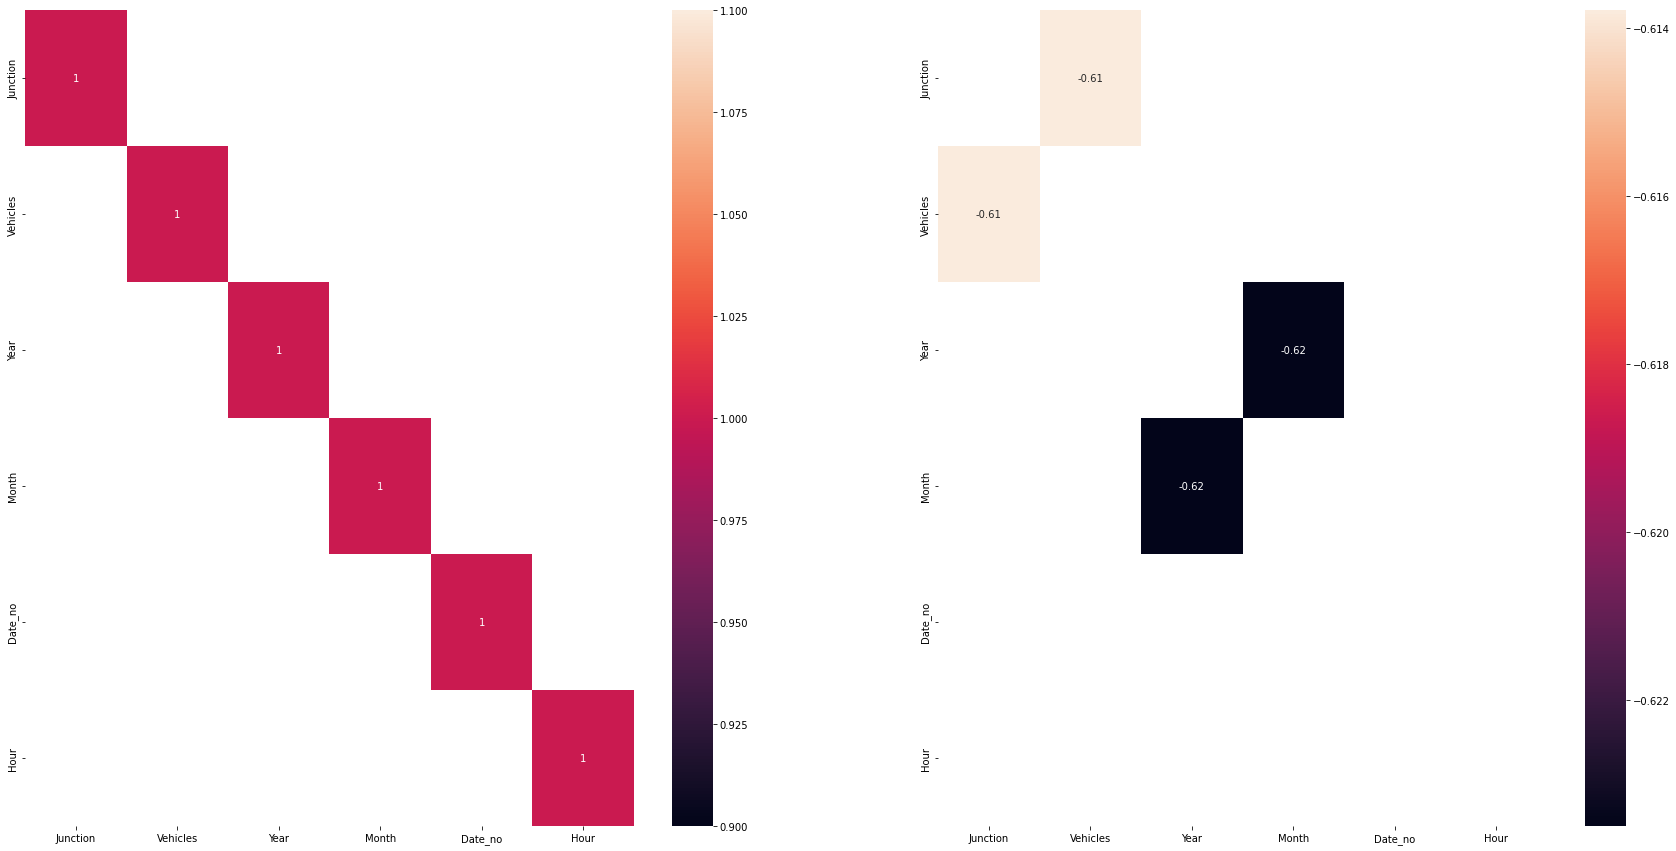

In [ ]:
tmp_corrs = df.corr()

plt.figure(figsize=(30,15))

plt.subplot(1,2,1)
sns.heatmap(tmp_corrs[tmp_corrs>0.5], annot=True)

plt.subplot(1,2,2)
sns.heatmap(tmp_corrs[tmp_corrs < -0.5], annot=True)

<AxesSubplot:>

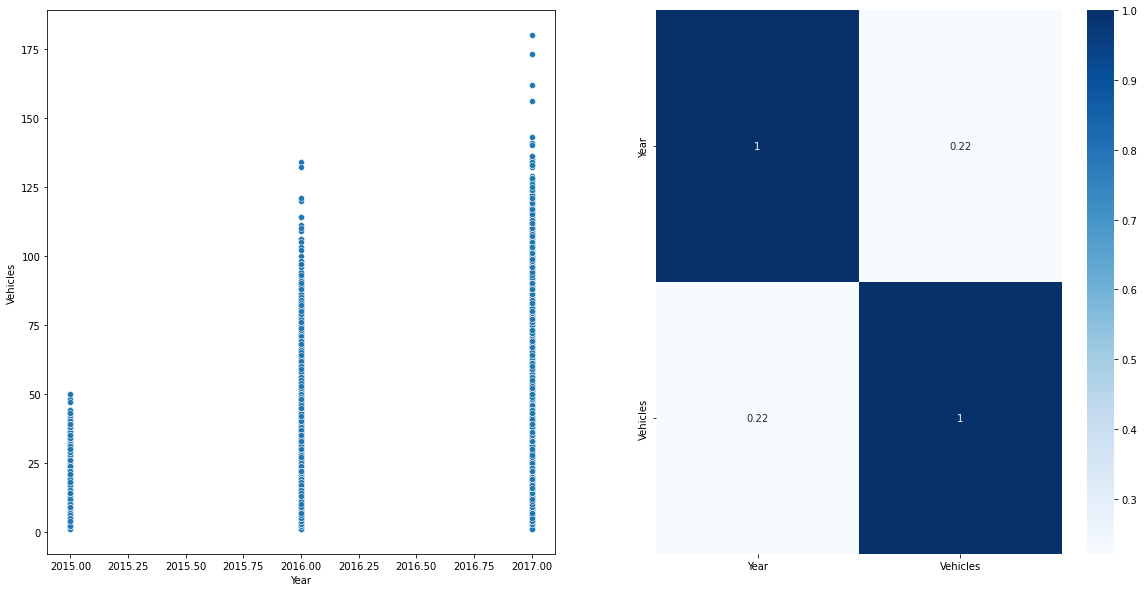

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(df[target_sorted_corrs.index[0]], df[target_var])

plt.subplot(1,2,2)
tmp_corr=df[[target_sorted_corrs.index[0], target_var]].corr()
sns.heatmap(tmp_corr, annot=True,cmap='Blues')

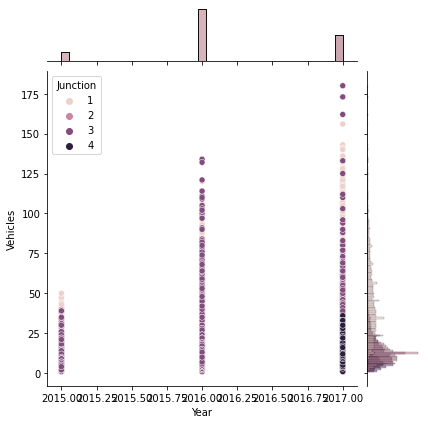

In [ ]:
sns.JointGrid(df[target_sorted_corrs.index[0]], df[target_var], hue=df["Junction"]).plot(sns.scatterplot, sns.histplot);

<AxesSubplot:>

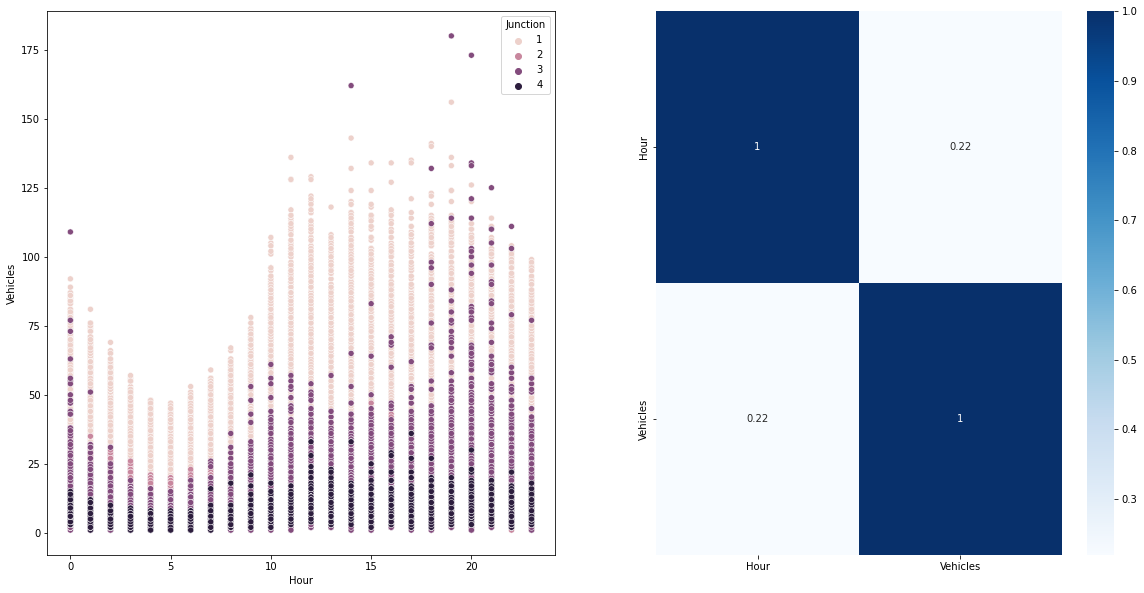

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(df[target_sorted_corrs.index[1]], df[target_var], hue=df["Junction"])

plt.subplot(1,2,2)
tmp_corr=df[[target_sorted_corrs.index[1], target_var]].corr()
sns.heatmap(tmp_corr, annot=True,cmap='Blues')

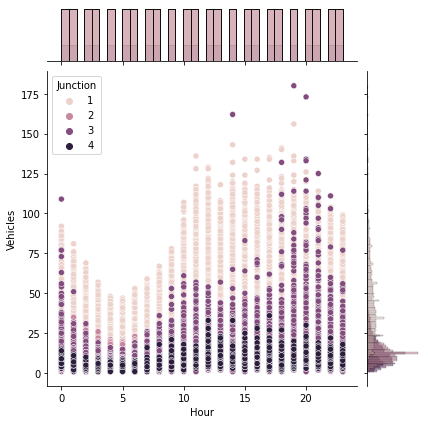

In [ ]:
sns.JointGrid(df[target_sorted_corrs.index[1]], df[target_var], hue=df["Junction"]).plot(sns.scatterplot, sns.histplot);

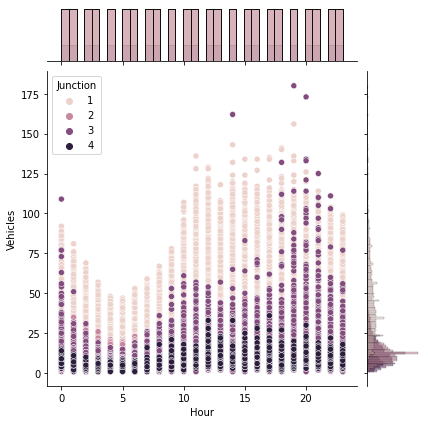

In [ ]:
sns.JointGrid(df[target_sorted_corrs.index[1]], df[target_var],hue=df["Junction"]).plot(sns.scatterplot, sns.histplot);

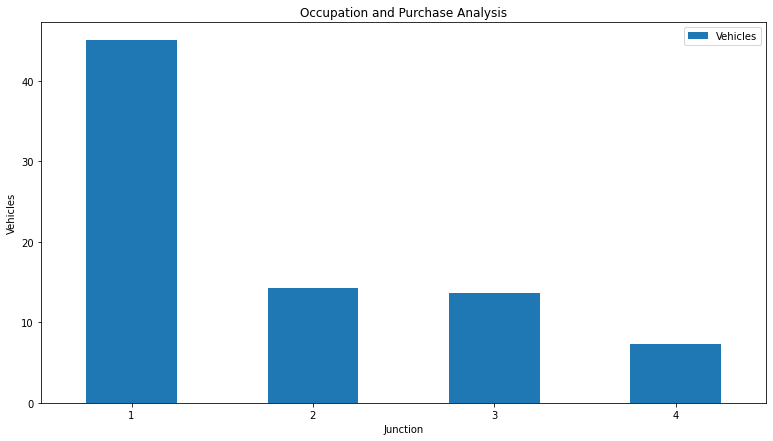

In [ ]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Junction', values='Vehicles', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Junction')
plt.ylabel("Vehicles")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

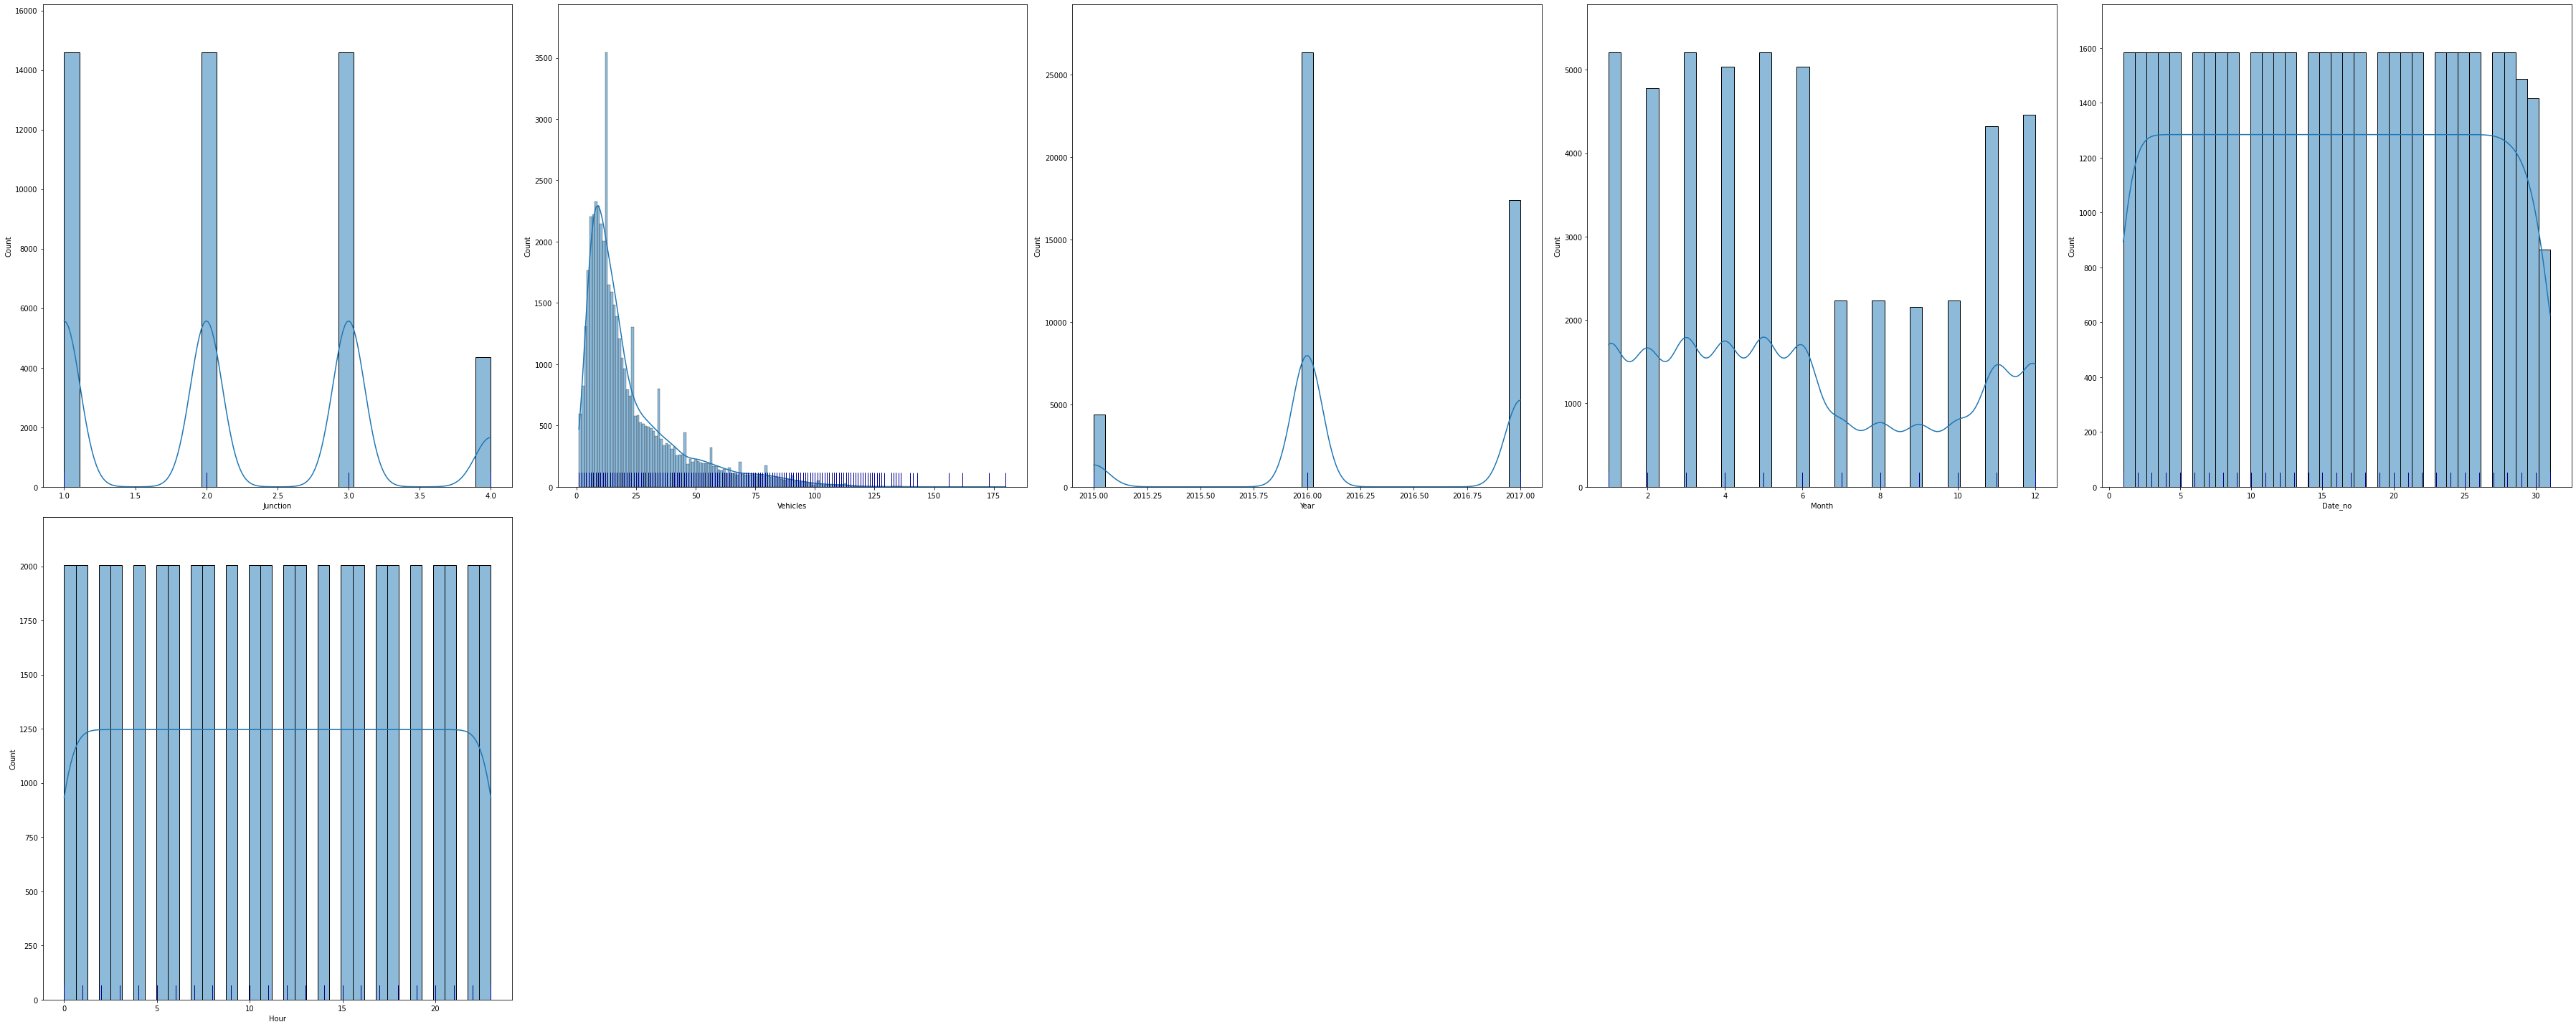

In [ ]:
size = len(num_cols)
cs, rs = (5,size//5+1) if size>=5 else (3,size//3+1)

fig = plt.figure( figsize=(cs*10, rs*10))
for i, col in enumerate(num_cols):
    plt.subplot(rs,cs,i+1)
    sns.histplot(x=df[col], data=df, kde=True) #  hue=df[target_var],
    sns.rugplot(x=df[col], data=df,  height=.03, color='darkblue') # hue=df[target_var],
    
fig.tight_layout()  
plt.show()

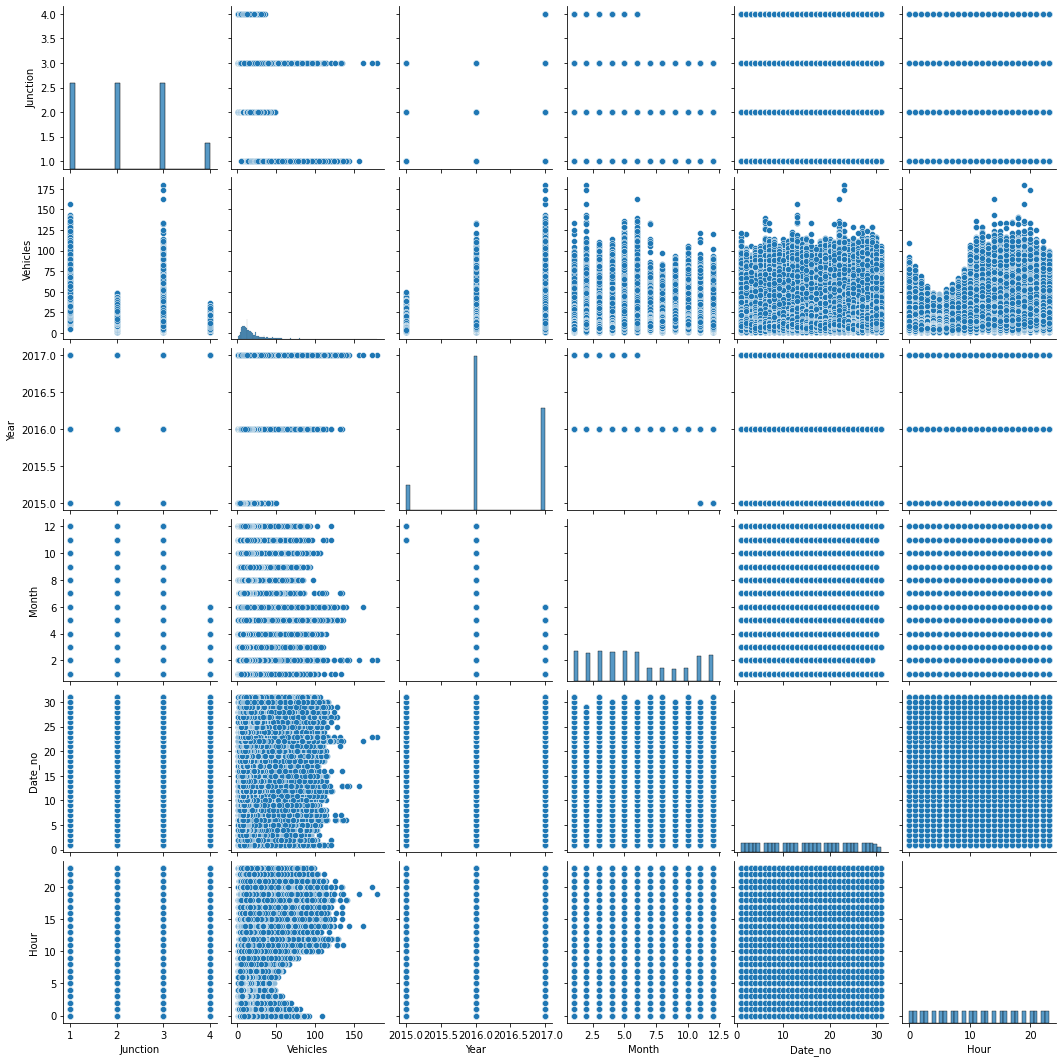

In [ ]:
sns.pairplot(df);

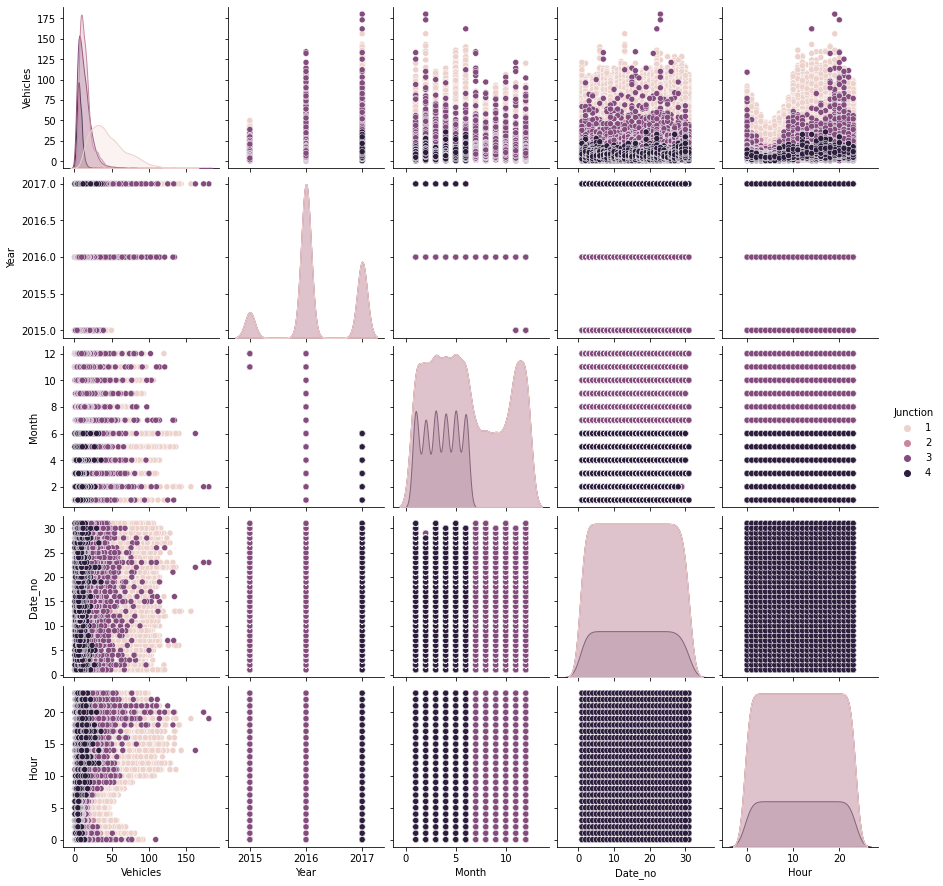

In [ ]:
sns.pairplot(data=df, hue= "Junction")

```python
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df.select_dtypes(exclude=[bool]), diag_sharey=False) # hue=target_var
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot)
g.map(sns.rugplot);
g.add_legend();
```

```python
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df.select_dtypes(exclude=[bool]), diag_sharey=False) # , hue=target_var
g.map_upper(sns.scatterplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.lineplot)
g.map(sns.rugplot)
g.add_legend();
```

```python
plt.figure(figsize=(20,20))

# Create a PairGrid instance
g = sns.PairGrid(df) # ,  hue=target_var
g.map_upper(sns.scatterplot)
g.map_diag(sns.violinplot)
g.map_lower(sns.lineplot)
g.map(sns.rugplot)
g.add_legend();
```

```python
row_size, col_size = len(num_cols), len(num_cols)
fig = plt.figure( figsize=(row_size*3, row_size*3))
for i, row in enumerate(num_cols):
    for j, col in enumerate(num_cols):
        ax=fig.add_subplot(row_size, col_size, (i*col_size)+j+1)
        sns.lineplot(data= df, x=row, y=col, ax=ax) # hue=target_var,
        
fig.tight_layout()  
plt.show()
```

```python
row_size = col_size = len(df.columns)
fig = plt.figure( figsize=(row_size*3, row_size*3))
for i, row in enumerate(num_cols):
    for j, col in enumerate(num_cols):
        ax=fig.add_subplot(row_size, col_size, (i*col_size)+j+1)
        sns.lineplot(data= df, x=row, y=col, ax=ax) #  hue=target_var,
        
fig.tight_layout()  
plt.show()
```

# (E) Model Training

## GRU

### Data Split

In [ ]:
window_size = 32
batch_size = 150 
epochs = 50

In [ ]:
splits = {}
for i, (train, test) in enumerate(zip(df_J_Trains, df_J_Tests)):

  X_train, y_train = Extract_X_y(train, window=window_size)
  X_test, y_test = Extract_X_y(test, window=window_size)

  splits[i+1] = {
      "X_train":X_train,
      "X_test":X_test,
      "y_train":y_train,
      "y_test":y_test

  }

In [ ]:
splits[1]["X_train"].shape

(12949, 32, 1)

### Modelling via GRU
- Splits the dataset into 4 pieces respectly the Junction data category.
- Then train a new model using datatime nad vehicle count per data pieces

#### Architecture

In [ ]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (Conv2D, Input, Flatten, Dense,
                                     LSTM, Dropout, GRU, Bidirectional)


def generate_GRU_model():
  # input
  input = Input(shape=(window_size,1))

  # GRU layers
  x = GRU(units=batch_size, return_sequences=True, input_shape=(window_size,1), activation='tanh')(input)
  x = Dropout(0.2)(x)

  for _ in range(4): 
    # GRU Block
    x = GRU(units=batch_size, return_sequences=True, input_shape=(window_size,1), activation='tanh')(x)
    x = Dropout(0.2)(x)

  x = GRU(units=batch_size, input_shape=(window_size,1), activation='tanh')(x)
  x = Dropout(0.2)(x)

  # Output layer
  output = Dense(units=1)(x)

  # Connecting the model
  model = Model(inputs=input, outputs=output)

  # configurating the model
  model.compile(optimizer=SGD(),loss='mean_squared_error')

  return model

In [ ]:
# Summary of the model
generate_GRU_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 1)]           0         
                                                                 
 gru (GRU)                   (None, 32, 150)           68850     
                                                                 
 dropout (Dropout)           (None, 32, 150)           0         
                                                                 
 gru_1 (GRU)                 (None, 32, 150)           135900    
                                                                 
 dropout_1 (Dropout)         (None, 32, 150)           0         
                                                                 
 gru_2 (GRU)                 (None, 32, 150)           135900    
                                                                 
 dropout_2 (Dropout)         (None, 32, 150)           0     

In [ ]:
# create an model instance
GRU_models = {J_class:generate_GRU_model() for J_class in splits.keys()}

#### Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import (ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger,
                                        LearningRateScheduler, ReduceLROnPlateau, LambdaCallback)
import numpy as np

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

def print_current_lr(epoch, logs):
    print("Learning rate in epoch {} is {}".format(epoch, float(tf.keras.backend.get_value(model.optimizer.lr))))

# Temporary save paths
checkpoint_path = "TemporaryModel_ModelCheckpoint.h5"
tb_log_dir = "./logs"

In [ ]:
callbacks = [
    #LearningRateScheduler(step_decay),
    TensorBoard(log_dir=tb_log_dir),
    ModelCheckpoint(filepath= checkpoint_path, save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True, verbose=1),
    CSVLogger(filename='training.log'),
    #LambdaCallback(on_epoch_end=print_current_lr)
]

In [ ]:
histories={}
for J_class, GRU_model in GRU_models.items():
  # extracting the corresponding data
  X,y = splits[J_class]["X_train"], splits[J_class]["y_train"]

  # training the models
  histories[J_class] = GRU_model.fit(X,y, epochs=epochs, batch_size=batch_size, callbacks=callbacks)

Epoch 1/50
86/87 [============================>.] - ETA: 0s - loss: 0.0647

87/87 [==============================] - 15s 21ms/step - loss: 0.0647
Epoch 2/50
85/87 [============================>.] - ETA: 0s - loss: 0.0617

87/87 [==============================] - 2s 20ms/step - loss: 0.0616
Epoch 3/50
85/87 [============================>.] - ETA: 0s - loss: 0.0584

87/87 [==============================] - 2s 19ms/step - loss: 0.0584
Epoch 4/50
85/87 [============================>.] - ETA: 0s - loss: 0.0551

87/87 [==============================] - 2s 19ms/step - loss: 0.0549
Epoch 5/50
87/87 [==============================] - ETA: 0s - loss: 0.0516

87/87 [==============================] - 2s 20ms/step - loss: 0.0516
Epoch 6/50
85/87 [============================>.] - ETA: 0s - loss: 0.0493

87/87 [==============================] - 2s 20ms/step - loss: 0.0492
Epoch 7/50
85/87 [============================>.] - ETA: 0s - loss: 0.0476

87/87 [==============================] - 2s 20ms/step - loss: 0.0478
Epoch 8/50
85/87 [============================>.] - ETA: 0s - loss: 0.0472

87/87 [==============================] - 2s 20ms/step - loss: 0.0471
Epoch 9/50
85/87 [============================>.] - ETA: 0s - loss: 0.0468

87/87 [==============================] - 2s 20ms/step - loss: 0.0468
Epoch 10/50
85/87 [============================>.] - ETA: 0s - loss: 0.0467

87/87 [==============================] - 2s 20ms/step - loss: 0.0467
Epoch 11/50
85/87 [============================>.] - ETA: 0s - loss: 0.0467

87/87 [==============================] - 2s 20ms/step - loss: 0.0466
Epoch 12/50
85/87 [============================>.] - ETA: 0s - loss: 0.0466

87/87 [==============================] - 2s 20ms/step - loss: 0.0466
Epoch 13/50
85/87 [============================>.] - ETA: 0s - loss: 0.0463

87/87 [==============================] - 2s 20ms/step - loss: 0.0464
Epoch 14/50
85/87 [============================>.] - ETA: 0s - loss: 0.0464

87/87 [==============================] - 2s 20ms/step - loss: 0.0464
Epoch 15/50
85/87 [============================>.] - ETA: 0s - loss: 0.0465

87/87 [==============================] - 2s 20ms/step - loss: 0.0464
Epoch 16/50
85/87 [============================>.] - ETA: 0s - loss: 0.0461

87/87 [==============================] - 2s 20ms/step - loss: 0.0463
Epoch 17/50
85/87 [============================>.] - ETA: 0s - loss: 0.0460

87/87 [==============================] - 2s 20ms/step - loss: 0.0462
Epoch 18/50
85/87 [============================>.] - ETA: 0s - loss: 0.0463

87/87 [==============================] - 2s 20ms/step - loss: 0.0461
Epoch 19/50
85/87 [============================>.] - ETA: 0s - loss: 0.0462

87/87 [==============================] - 2s 21ms/step - loss: 0.0461
Epoch 20/50
86/87 [============================>.] - ETA: 0s - loss: 0.0462

87/87 [==============================] - 2s 21ms/step - loss: 0.0462
Epoch 21/50
85/87 [============================>.] - ETA: 0s - loss: 0.0460

87/87 [==============================] - 2s 20ms/step - loss: 0.0460
Epoch 22/50
85/87 [============================>.] - ETA: 0s - loss: 0.0460

87/87 [==============================] - 2s 20ms/step - loss: 0.0460
Epoch 23/50
85/87 [============================>.] - ETA: 0s - loss: 0.0459

87/87 [==============================] - 2s 20ms/step - loss: 0.0459
Epoch 24/50
85/87 [============================>.] - ETA: 0s - loss: 0.0459

87/87 [==============================] - 2s 20ms/step - loss: 0.0459
Epoch 25/50
85/87 [============================>.] - ETA: 0s - loss: 0.0459

87/87 [==============================] - 2s 20ms/step - loss: 0.0458
Epoch 26/50
87/87 [==============================] - ETA: 0s - loss: 0.0457

87/87 [==============================] - 2s 21ms/step - loss: 0.0457
Epoch 27/50
85/87 [============================>.] - ETA: 0s - loss: 0.0458

87/87 [==============================] - 2s 20ms/step - loss: 0.0457
Epoch 28/50
87/87 [==============================] - ETA: 0s - loss: 0.0456

87/87 [==============================] - 2s 20ms/step - loss: 0.0456
Epoch 29/50
85/87 [============================>.] - ETA: 0s - loss: 0.0455

87/87 [==============================] - 2s 20ms/step - loss: 0.0455
Epoch 30/50
87/87 [==============================] - ETA: 0s - loss: 0.0456

87/87 [==============================] - 2s 21ms/step - loss: 0.0456
Epoch 31/50
85/87 [============================>.] - ETA: 0s - loss: 0.0453

87/87 [==============================] - 2s 20ms/step - loss: 0.0456
Epoch 32/50
85/87 [============================>.] - ETA: 0s - loss: 0.0455

87/87 [==============================] - 2s 20ms/step - loss: 0.0455
Epoch 33/50
87/87 [==============================] - ETA: 0s - loss: 0.0453

87/87 [==============================] - 2s 21ms/step - loss: 0.0453
Epoch 34/50
85/87 [============================>.] - ETA: 0s - loss: 0.0454

87/87 [==============================] - 2s 21ms/step - loss: 0.0454
Epoch 35/50
85/87 [============================>.] - ETA: 0s - loss: 0.0452

87/87 [==============================] - 2s 20ms/step - loss: 0.0452
Epoch 36/50
87/87 [==============================] - ETA: 0s - loss: 0.0451

87/87 [==============================] - 2s 21ms/step - loss: 0.0451
Epoch 37/50
85/87 [============================>.] - ETA: 0s - loss: 0.0451

87/87 [==============================] - 2s 20ms/step - loss: 0.0450
Epoch 38/50
85/87 [============================>.] - ETA: 0s - loss: 0.0451

87/87 [==============================] - 2s 20ms/step - loss: 0.0450
Epoch 39/50
85/87 [============================>.] - ETA: 0s - loss: 0.0451

87/87 [==============================] - 2s 20ms/step - loss: 0.0450
Epoch 40/50
87/87 [==============================] - ETA: 0s - loss: 0.0450

87/87 [==============================] - 2s 21ms/step - loss: 0.0450
Epoch 41/50
85/87 [============================>.] - ETA: 0s - loss: 0.0448

87/87 [==============================] - 2s 20ms/step - loss: 0.0449
Epoch 42/50
85/87 [============================>.] - ETA: 0s - loss: 0.0449

87/87 [==============================] - 2s 24ms/step - loss: 0.0449
Epoch 43/50
87/87 [==============================] - ETA: 0s - loss: 0.0448

87/87 [==============================] - 2s 27ms/step - loss: 0.0448
Epoch 44/50
85/87 [============================>.] - ETA: 0s - loss: 0.0448

87/87 [==============================] - 2s 20ms/step - loss: 0.0447
Epoch 45/50
85/87 [============================>.] - ETA: 0s - loss: 0.0446

87/87 [==============================] - 2s 23ms/step - loss: 0.0447
Epoch 46/50
87/87 [==============================] - ETA: 0s - loss: 0.0448

87/87 [==============================] - 4s 42ms/step - loss: 0.0448
Epoch 47/50
85/87 [============================>.] - ETA: 0s - loss: 0.0447

87/87 [==============================] - 2s 21ms/step - loss: 0.0446
Epoch 48/50
85/87 [============================>.] - ETA: 0s - loss: 0.0447

87/87 [==============================] - 2s 20ms/step - loss: 0.0446
Epoch 49/50
85/87 [============================>.] - ETA: 0s - loss: 0.0445

87/87 [==============================] - 2s 20ms/step - loss: 0.0445
Epoch 50/50
85/87 [============================>.] - ETA: 0s - loss: 0.0444

87/87 [==============================] - 2s 20ms/step - loss: 0.0444
Epoch 1/50
87/88 [============================>.] - ETA: 0s - loss: 0.2430

88/88 [==============================] - 11s 21ms/step - loss: 0.2429
Epoch 2/50
87/88 [============================>.] - ETA: 0s - loss: 0.2260

88/88 [==============================] - 2s 20ms/step - loss: 0.2261
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.2030

88/88 [==============================] - 2s 20ms/step - loss: 0.2030
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.1865

88/88 [==============================] - 2s 20ms/step - loss: 0.1865
Epoch 5/50
86/88 [============================>.] - ETA: 0s - loss: 0.1830

88/88 [==============================] - 2s 21ms/step - loss: 0.1826
Epoch 6/50
87/88 [============================>.] - ETA: 0s - loss: 0.1814

88/88 [==============================] - 2s 20ms/step - loss: 0.1813
Epoch 7/50
88/88 [==============================] - ETA: 0s - loss: 0.1802

88/88 [==============================] - 2s 20ms/step - loss: 0.1802
Epoch 8/50
88/88 [==============================] - ETA: 0s - loss: 0.1786

88/88 [==============================] - 2s 20ms/step - loss: 0.1786
Epoch 9/50
88/88 [==============================] - ETA: 0s - loss: 0.1775

88/88 [==============================] - 2s 20ms/step - loss: 0.1775
Epoch 10/50
88/88 [==============================] - ETA: 0s - loss: 0.1767

88/88 [==============================] - 2s 20ms/step - loss: 0.1767
Epoch 11/50
87/88 [============================>.] - ETA: 0s - loss: 0.1757

88/88 [==============================] - 2s 21ms/step - loss: 0.1756
Epoch 12/50
88/88 [==============================] - ETA: 0s - loss: 0.1748

88/88 [==============================] - 2s 21ms/step - loss: 0.1748
Epoch 13/50
88/88 [==============================] - ETA: 0s - loss: 0.1739

88/88 [==============================] - 2s 20ms/step - loss: 0.1739
Epoch 14/50
88/88 [==============================] - ETA: 0s - loss: 0.1732

88/88 [==============================] - 2s 20ms/step - loss: 0.1732
Epoch 15/50
88/88 [==============================] - ETA: 0s - loss: 0.1719

88/88 [==============================] - 2s 20ms/step - loss: 0.1719
Epoch 16/50
88/88 [==============================] - ETA: 0s - loss: 0.1716

88/88 [==============================] - 2s 20ms/step - loss: 0.1716
Epoch 17/50
88/88 [==============================] - ETA: 0s - loss: 0.1698

88/88 [==============================] - 2s 20ms/step - loss: 0.1698
Epoch 18/50
87/88 [============================>.] - ETA: 0s - loss: 0.1696

88/88 [==============================] - 2s 21ms/step - loss: 0.1696
Epoch 19/50
86/88 [============================>.] - ETA: 0s - loss: 0.1679

88/88 [==============================] - 2s 21ms/step - loss: 0.1682
Epoch 20/50
87/88 [============================>.] - ETA: 0s - loss: 0.1679

88/88 [==============================] - 2s 21ms/step - loss: 0.1679
Epoch 21/50
88/88 [==============================] - ETA: 0s - loss: 0.1675

88/88 [==============================] - 2s 20ms/step - loss: 0.1675
Epoch 22/50
87/88 [============================>.] - ETA: 0s - loss: 0.1666

88/88 [==============================] - 2s 20ms/step - loss: 0.1665
Epoch 23/50
88/88 [==============================] - ETA: 0s - loss: 0.1660

88/88 [==============================] - 2s 20ms/step - loss: 0.1660
Epoch 24/50
88/88 [==============================] - ETA: 0s - loss: 0.1655

88/88 [==============================] - 2s 20ms/step - loss: 0.1655
Epoch 25/50
88/88 [==============================] - ETA: 0s - loss: 0.1653

88/88 [==============================] - 2s 20ms/step - loss: 0.1653
Epoch 26/50
88/88 [==============================] - ETA: 0s - loss: 0.1649

88/88 [==============================] - 2s 20ms/step - loss: 0.1649
Epoch 27/50
88/88 [==============================] - ETA: 0s - loss: 0.1650

88/88 [==============================] - 2s 20ms/step - loss: 0.1650
Epoch 28/50
88/88 [==============================] - ETA: 0s - loss: 0.1648

88/88 [==============================] - 2s 20ms/step - loss: 0.1648
Epoch 29/50
87/88 [============================>.] - ETA: 0s - loss: 0.1650

88/88 [==============================] - 2s 21ms/step - loss: 0.1649
Epoch 30/50
88/88 [==============================] - ETA: 0s - loss: 0.1639

88/88 [==============================] - 2s 20ms/step - loss: 0.1639
Epoch 31/50
88/88 [==============================] - ETA: 0s - loss: 0.1643

88/88 [==============================] - 2s 20ms/step - loss: 0.1643
Epoch 32/50
88/88 [==============================] - ETA: 0s - loss: 0.1639

88/88 [==============================] - 2s 21ms/step - loss: 0.1639
Epoch 33/50
88/88 [==============================] - ETA: 0s - loss: 0.1636

88/88 [==============================] - 2s 21ms/step - loss: 0.1636
Epoch 34/50
88/88 [==============================] - ETA: 0s - loss: 0.1642

88/88 [==============================] - 2s 20ms/step - loss: 0.1642
Epoch 35/50
88/88 [==============================] - ETA: 0s - loss: 0.1638

88/88 [==============================] - 2s 20ms/step - loss: 0.1638
Epoch 36/50
88/88 [==============================] - ETA: 0s - loss: 0.1631

88/88 [==============================] - 2s 20ms/step - loss: 0.1631
Epoch 37/50
88/88 [==============================] - ETA: 0s - loss: 0.1635

88/88 [==============================] - 2s 20ms/step - loss: 0.1635
Epoch 38/50
88/88 [==============================] - ETA: 0s - loss: 0.1634

88/88 [==============================] - 2s 20ms/step - loss: 0.1634
Epoch 39/50
88/88 [==============================] - ETA: 0s - loss: 0.1632

88/88 [==============================] - 2s 20ms/step - loss: 0.1632
Epoch 40/50
88/88 [==============================] - ETA: 0s - loss: 0.1629

88/88 [==============================] - 2s 21ms/step - loss: 0.1629
Epoch 41/50
88/88 [==============================] - ETA: 0s - loss: 0.1631

88/88 [==============================] - 2s 20ms/step - loss: 0.1631
Epoch 42/50
88/88 [==============================] - ETA: 0s - loss: 0.1627

88/88 [==============================] - 2s 20ms/step - loss: 0.1627
Epoch 43/50
88/88 [==============================] - ETA: 0s - loss: 0.1624

88/88 [==============================] - 2s 20ms/step - loss: 0.1624
Epoch 44/50
88/88 [==============================] - ETA: 0s - loss: 0.1625

88/88 [==============================] - 2s 20ms/step - loss: 0.1625
Epoch 45/50
88/88 [==============================] - ETA: 0s - loss: 0.1627

88/88 [==============================] - 2s 20ms/step - loss: 0.1627
Epoch 46/50
86/88 [============================>.] - ETA: 0s - loss: 0.1624

88/88 [==============================] - 2s 23ms/step - loss: 0.1624
Epoch 47/50
87/88 [============================>.] - ETA: 0s - loss: 0.1629

88/88 [==============================] - 2s 24ms/step - loss: 0.1628
Epoch 48/50
88/88 [==============================] - ETA: 0s - loss: 0.1624

88/88 [==============================] - 2s 22ms/step - loss: 0.1624
Epoch 49/50
88/88 [==============================] - ETA: 0s - loss: 0.1625

88/88 [==============================] - 2s 20ms/step - loss: 0.1625
Epoch 50/50
88/88 [==============================] - ETA: 0s - loss: 0.1624

88/88 [==============================] - 2s 20ms/step - loss: 0.1624
Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.1210

88/88 [==============================] - 11s 21ms/step - loss: 0.1210
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.1208

88/88 [==============================] - 2s 20ms/step - loss: 0.1208
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.1209

88/88 [==============================] - 2s 21ms/step - loss: 0.1209
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.1207

88/88 [==============================] - 2s 20ms/step - loss: 0.1207
Epoch 5/50
88/88 [==============================] - ETA: 0s - loss: 0.1206

88/88 [==============================] - 2s 20ms/step - loss: 0.1206
Epoch 6/50
88/88 [==============================] - ETA: 0s - loss: 0.1205

88/88 [==============================] - 2s 20ms/step - loss: 0.1205
Epoch 7/50
88/88 [==============================] - ETA: 0s - loss: 0.1204

88/88 [==============================] - 2s 20ms/step - loss: 0.1204
Epoch 8/50
88/88 [==============================] - ETA: 0s - loss: 0.1204

88/88 [==============================] - 2s 20ms/step - loss: 0.1204
Epoch 9/50
88/88 [==============================] - ETA: 0s - loss: 0.1203

88/88 [==============================] - 2s 20ms/step - loss: 0.1203
Epoch 10/50
88/88 [==============================] - ETA: 0s - loss: 0.1202

88/88 [==============================] - 2s 21ms/step - loss: 0.1202
Epoch 11/50
87/88 [============================>.] - ETA: 0s - loss: 0.1201

88/88 [==============================] - 2s 20ms/step - loss: 0.1201
Epoch 12/50
88/88 [==============================] - ETA: 0s - loss: 0.1201

88/88 [==============================] - 2s 20ms/step - loss: 0.1201
Epoch 13/50
88/88 [==============================] - ETA: 0s - loss: 0.1199

88/88 [==============================] - 2s 20ms/step - loss: 0.1199
Epoch 14/50
88/88 [==============================] - ETA: 0s - loss: 0.1198

88/88 [==============================] - 2s 20ms/step - loss: 0.1198
Epoch 15/50
88/88 [==============================] - ETA: 0s - loss: 0.1198

88/88 [==============================] - 2s 20ms/step - loss: 0.1198
Epoch 16/50
88/88 [==============================] - ETA: 0s - loss: 0.1196

88/88 [==============================] - 2s 20ms/step - loss: 0.1196
Epoch 17/50
86/88 [============================>.] - ETA: 0s - loss: 0.1193

88/88 [==============================] - 2s 22ms/step - loss: 0.1196
Epoch 18/50
88/88 [==============================] - ETA: 0s - loss: 0.1194

88/88 [==============================] - 2s 21ms/step - loss: 0.1194
Epoch 19/50
88/88 [==============================] - ETA: 0s - loss: 0.1193

88/88 [==============================] - 2s 20ms/step - loss: 0.1193
Epoch 20/50
88/88 [==============================] - ETA: 0s - loss: 0.1191

88/88 [==============================] - 2s 20ms/step - loss: 0.1191
Epoch 21/50
88/88 [==============================] - ETA: 0s - loss: 0.1190

88/88 [==============================] - 2s 20ms/step - loss: 0.1190
Epoch 22/50
88/88 [==============================] - ETA: 0s - loss: 0.1189

88/88 [==============================] - 2s 20ms/step - loss: 0.1189
Epoch 23/50
88/88 [==============================] - ETA: 0s - loss: 0.1187

88/88 [==============================] - 2s 21ms/step - loss: 0.1187
Epoch 24/50
86/88 [============================>.] - ETA: 0s - loss: 0.1185

88/88 [==============================] - 2s 22ms/step - loss: 0.1186
Epoch 25/50
86/88 [============================>.] - ETA: 0s - loss: 0.1183

88/88 [==============================] - 2s 21ms/step - loss: 0.1184
Epoch 26/50
88/88 [==============================] - ETA: 0s - loss: 0.1183

88/88 [==============================] - 2s 20ms/step - loss: 0.1183
Epoch 27/50
87/88 [============================>.] - ETA: 0s - loss: 0.1181

88/88 [==============================] - 2s 20ms/step - loss: 0.1181
Epoch 28/50
88/88 [==============================] - ETA: 0s - loss: 0.1180

88/88 [==============================] - 2s 20ms/step - loss: 0.1180
Epoch 29/50
88/88 [==============================] - ETA: 0s - loss: 0.1178

88/88 [==============================] - 2s 20ms/step - loss: 0.1178
Epoch 30/50
88/88 [==============================] - ETA: 0s - loss: 0.1175

88/88 [==============================] - 2s 21ms/step - loss: 0.1175
Epoch 31/50
88/88 [==============================] - ETA: 0s - loss: 0.1174

88/88 [==============================] - 2s 22ms/step - loss: 0.1174
Epoch 32/50
87/88 [============================>.] - ETA: 0s - loss: 0.1171

88/88 [==============================] - 2s 20ms/step - loss: 0.1171
Epoch 33/50
88/88 [==============================] - ETA: 0s - loss: 0.1169

88/88 [==============================] - 2s 20ms/step - loss: 0.1169
Epoch 34/50
88/88 [==============================] - ETA: 0s - loss: 0.1167

88/88 [==============================] - 2s 20ms/step - loss: 0.1167
Epoch 35/50
88/88 [==============================] - ETA: 0s - loss: 0.1166

88/88 [==============================] - 2s 20ms/step - loss: 0.1166
Epoch 36/50
88/88 [==============================] - ETA: 0s - loss: 0.1164

88/88 [==============================] - 2s 20ms/step - loss: 0.1164
Epoch 37/50
87/88 [============================>.] - ETA: 0s - loss: 0.1163

88/88 [==============================] - 2s 21ms/step - loss: 0.1162
Epoch 38/50
88/88 [==============================] - ETA: 0s - loss: 0.1160

88/88 [==============================] - 2s 21ms/step - loss: 0.1160
Epoch 39/50
88/88 [==============================] - ETA: 0s - loss: 0.1157

88/88 [==============================] - 2s 20ms/step - loss: 0.1157
Epoch 40/50
88/88 [==============================] - ETA: 0s - loss: 0.1157

88/88 [==============================] - 2s 20ms/step - loss: 0.1157
Epoch 41/50
88/88 [==============================] - ETA: 0s - loss: 0.1154

88/88 [==============================] - 2s 20ms/step - loss: 0.1154
Epoch 42/50
88/88 [==============================] - ETA: 0s - loss: 0.1151

88/88 [==============================] - 2s 20ms/step - loss: 0.1151
Epoch 43/50
88/88 [==============================] - ETA: 0s - loss: 0.1151

88/88 [==============================] - 2s 20ms/step - loss: 0.1151
Epoch 44/50
88/88 [==============================] - ETA: 0s - loss: 0.1151

88/88 [==============================] - 2s 20ms/step - loss: 0.1151
Epoch 45/50
88/88 [==============================] - ETA: 0s - loss: 0.1149

88/88 [==============================] - 2s 21ms/step - loss: 0.1149
Epoch 46/50
88/88 [==============================] - ETA: 0s - loss: 0.1148

88/88 [==============================] - 2s 20ms/step - loss: 0.1148
Epoch 47/50
88/88 [==============================] - ETA: 0s - loss: 0.1148

88/88 [==============================] - 2s 20ms/step - loss: 0.1148
Epoch 48/50
88/88 [==============================] - ETA: 0s - loss: 0.1146

88/88 [==============================] - 2s 20ms/step - loss: 0.1146
Epoch 49/50
87/88 [============================>.] - ETA: 0s - loss: 0.1143

88/88 [==============================] - 2s 20ms/step - loss: 0.1144
Epoch 50/50
88/88 [==============================] - ETA: 0s - loss: 0.1145

88/88 [==============================] - 2s 20ms/step - loss: 0.1145
Epoch 1/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6402

26/26 [==============================] - 9s 25ms/step - loss: 0.6409
Epoch 2/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6408

26/26 [==============================] - 1s 21ms/step - loss: 0.6413
Epoch 3/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6429

26/26 [==============================] - 1s 20ms/step - loss: 0.6410
Epoch 4/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6403

26/26 [==============================] - 1s 20ms/step - loss: 0.6410
Epoch 5/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6394

26/26 [==============================] - 1s 20ms/step - loss: 0.6409
Epoch 6/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6427

26/26 [==============================] - 1s 20ms/step - loss: 0.6410
Epoch 7/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6452

26/26 [==============================] - 1s 20ms/step - loss: 0.6407
Epoch 8/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6432

26/26 [==============================] - 1s 20ms/step - loss: 0.6404
Epoch 9/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6386

26/26 [==============================] - 1s 20ms/step - loss: 0.6404
Epoch 10/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6389

26/26 [==============================] - 1s 20ms/step - loss: 0.6404
Epoch 11/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6412

26/26 [==============================] - 1s 21ms/step - loss: 0.6403
Epoch 12/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6362

26/26 [==============================] - 1s 21ms/step - loss: 0.6407
Epoch 13/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6384

26/26 [==============================] - 1s 21ms/step - loss: 0.6403
Epoch 14/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6412

26/26 [==============================] - 1s 21ms/step - loss: 0.6406
Epoch 15/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6386

26/26 [==============================] - 1s 21ms/step - loss: 0.6400
Epoch 16/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6412

26/26 [==============================] - 1s 20ms/step - loss: 0.6399
Epoch 17/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6419

26/26 [==============================] - 1s 21ms/step - loss: 0.6401
Epoch 18/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6422

26/26 [==============================] - 1s 21ms/step - loss: 0.6396
Epoch 19/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6360

26/26 [==============================] - 1s 20ms/step - loss: 0.6403
Epoch 20/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6413

26/26 [==============================] - 1s 20ms/step - loss: 0.6399
Epoch 21/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6410

26/26 [==============================] - 1s 21ms/step - loss: 0.6400
Epoch 22/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6414

26/26 [==============================] - 1s 21ms/step - loss: 0.6393
Epoch 23/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6393

26/26 [==============================] - 1s 21ms/step - loss: 0.6394
Epoch 24/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6411

26/26 [==============================] - 1s 21ms/step - loss: 0.6394
Epoch 25/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6372

26/26 [==============================] - 1s 21ms/step - loss: 0.6392
Epoch 26/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6382

26/26 [==============================] - 1s 21ms/step - loss: 0.6392
Epoch 27/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6367

26/26 [==============================] - 1s 20ms/step - loss: 0.6390
Epoch 28/50
24/26 [==========================>...] - ETA: 0s - loss: 0.6365

26/26 [==============================] - 1s 21ms/step - loss: 0.6388
Epoch 29/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6396

26/26 [==============================] - 1s 21ms/step - loss: 0.6390
Epoch 30/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6345

26/26 [==============================] - 1s 20ms/step - loss: 0.6392
Epoch 31/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6405

26/26 [==============================] - 1s 20ms/step - loss: 0.6384
Epoch 32/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6349

26/26 [==============================] - 1s 21ms/step - loss: 0.6384
Epoch 33/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6437

26/26 [==============================] - 1s 21ms/step - loss: 0.6375
Epoch 34/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6403

26/26 [==============================] - 1s 21ms/step - loss: 0.6385
Epoch 35/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6336

26/26 [==============================] - 1s 21ms/step - loss: 0.6379
Epoch 36/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6386

26/26 [==============================] - 1s 20ms/step - loss: 0.6380
Epoch 37/50
24/26 [==========================>...] - ETA: 0s - loss: 0.6385

26/26 [==============================] - 1s 21ms/step - loss: 0.6379
Epoch 38/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6408

26/26 [==============================] - 1s 21ms/step - loss: 0.6378
Epoch 39/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6345

26/26 [==============================] - 1s 21ms/step - loss: 0.6378
Epoch 40/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6379

26/26 [==============================] - 1s 21ms/step - loss: 0.6375
Epoch 41/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6332

26/26 [==============================] - 1s 21ms/step - loss: 0.6369
Epoch 42/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6351

26/26 [==============================] - 1s 21ms/step - loss: 0.6373
Epoch 43/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6373

26/26 [==============================] - 1s 21ms/step - loss: 0.6373
Epoch 44/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6338

26/26 [==============================] - 1s 21ms/step - loss: 0.6374
Epoch 45/50
24/26 [==========================>...] - ETA: 0s - loss: 0.6313

26/26 [==============================] - 1s 22ms/step - loss: 0.6370
Epoch 46/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6352

26/26 [==============================] - 1s 21ms/step - loss: 0.6366
Epoch 47/50
24/26 [==========================>...] - ETA: 0s - loss: 0.6330

26/26 [==============================] - 1s 22ms/step - loss: 0.6364
Epoch 48/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6375

26/26 [==============================] - 1s 21ms/step - loss: 0.6366
Epoch 49/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6418

26/26 [==============================] - 1s 21ms/step - loss: 0.6362
Epoch 50/50
25/26 [===========================>..] - ETA: 0s - loss: 0.6357

26/26 [==============================] - 1s 20ms/step - loss: 0.6358


#### Results

##### Utils

In [ ]:
import matplotlib.pyplot as plt
def visualizate_Train_hist(history):
  #Display of the accuracy and the loss values
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='val accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()


  plt.subplot(2,1,2)
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

#To calculate the root mean squred error in predictions
def RMSE_Value(actual,preds):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    print("The root mean squared error is {}.".format(rmse))
    return np.round(rmse, 5)

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(actual, pred):
    
    plt.plot(actual, label="True Value", alpha=0.5 )
    plt.plot(pred, label="Predicted Values")
    
    plt.title("GRU Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    
    plt.legend()

##### Metric Results

In [ ]:
splits.keys()

dict_keys(['train', 'test'])

In [ ]:
stationary_data["avg"]


dict_keys(['norm_diffs', 'avg', 'std'])

In [ ]:
random_data  = np.random.normal(stationary_data["avg"], stationary_data["std"], size=(64))
random_data = np.int64(random_data)
random_data

array([ 4,  8,  2,  7,  8,  9,  8,  5,  6,  3, 12,  4,  1,  0, 13,  0,  8,
        5,  3,  9, 11,  5,  1,  0,  6,  5,  9,  8,  4, 12,  8,  2,  7, 11,
        7,  3,  8, 10, 10,  7, 11,  5, 15, 14,  4,  9,  5,  6,  9,  6,  3,
        7,  2, 10,  8,  3,  9,  7,  6,  7,  3,  7, 10,  9])

In [ ]:
GRU_models[1].predict(random_data.reshape(-1, 32, 1))

1/1 [==============================] - 2s 2s/step


array([[2.6830318],
       [2.8373156]], dtype=float32)

In [ ]:
pred_results ={}
for J_class, GRU_model in GRU_models.items():
  # extracting the corresponding data
  X,y = splits[J_class]["X_test"], splits[J_class]["y_test"]

  # predicting
  pred = GRU_model.predict(X)

  # Collecting the results
  results = {
      "actual":y,
      "pred":pred,
      "RMSE":RMSE_Value(y,pred)
  }
  pred_results[J_class] = results

45/45 [==============================] - 2s 7ms/step
The root mean squared error is 0.31053973865176343.
45/45 [==============================] - 2s 7ms/step
The root mean squared error is 0.6299776399085625.
45/45 [==============================] - 2s 7ms/step
The root mean squared error is 0.6253195406867021.
13/13 [==============================] - 2s 9ms/step
The root mean squared error is 1.1111591083153796.


J_class: 1 RMSE:  0.31054 
J_class: 2 RMSE:  0.62998 
J_class: 3 RMSE:  0.62532 
J_class: 4 RMSE:  1.11116 


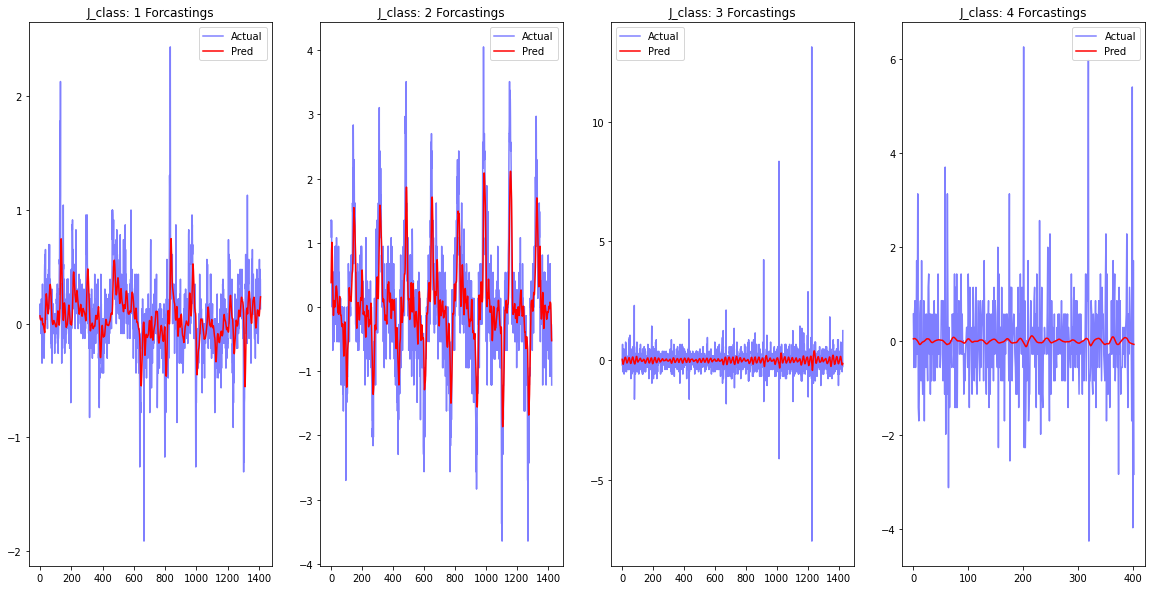

In [ ]:
plt.figure(figsize=(20, 10))
for J_class, results in pred_results.items():
  print(f"J_class: {J_class} RMSE:  {results['RMSE']:<8}")

  actual, pred = results["actual"], results["pred"]
  
  plt.subplot(1, 4, J_class)
  plt.plot(actual, label="Actual", alpha=0.5,color="blue" )
  plt.plot(pred, label="Pred", color="red")
  plt.title(f"J_class: {J_class} Forcastings")
  plt.legend()


##### Utils

In [ ]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison

def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0] , data=df_1)
    axes[0].set(ylabel ="Prediction")
    
    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

##### Invers Transforms

In [ ]:
def innverse_diffs_full(statioried_data, preds):
  #statioried_data["J_class"]["norm_diffs"]

  # extracting the data
  norm_diffs = statioried_data["norm_diffs"]
  std = statioried_data["std"]
  avg = statioried_data["avg"]

  # recovering norm
  recover = pd.DataFrame(norm_diffs["Norm"][-(len(preds)+1):-1], columns = ["Norm"])
  recover["preds"]= preds

  # reversing the difference
  Transform_reverssed = inverse_difference(recover.Norm, recover.preds)
  Transform_reverssed.columns = pd.DataFrame(Transform_reverssed ,columns=["Pred_Normed"])
  
  # Re-Transforming the prediction
  Final_Preds = (Transform_reverssed.values * std) + avg

  return Final_Preds

In [ ]:
re_transformed_preds = {}
for J_class, results in pred_results.items():
  pred = results["pred"]
  statioried_data_cur = statioried_data[str(J_class)]
  
  re_transformed_preds[J_class] = innverse_diffs_full(statioried_data_cur, pred)


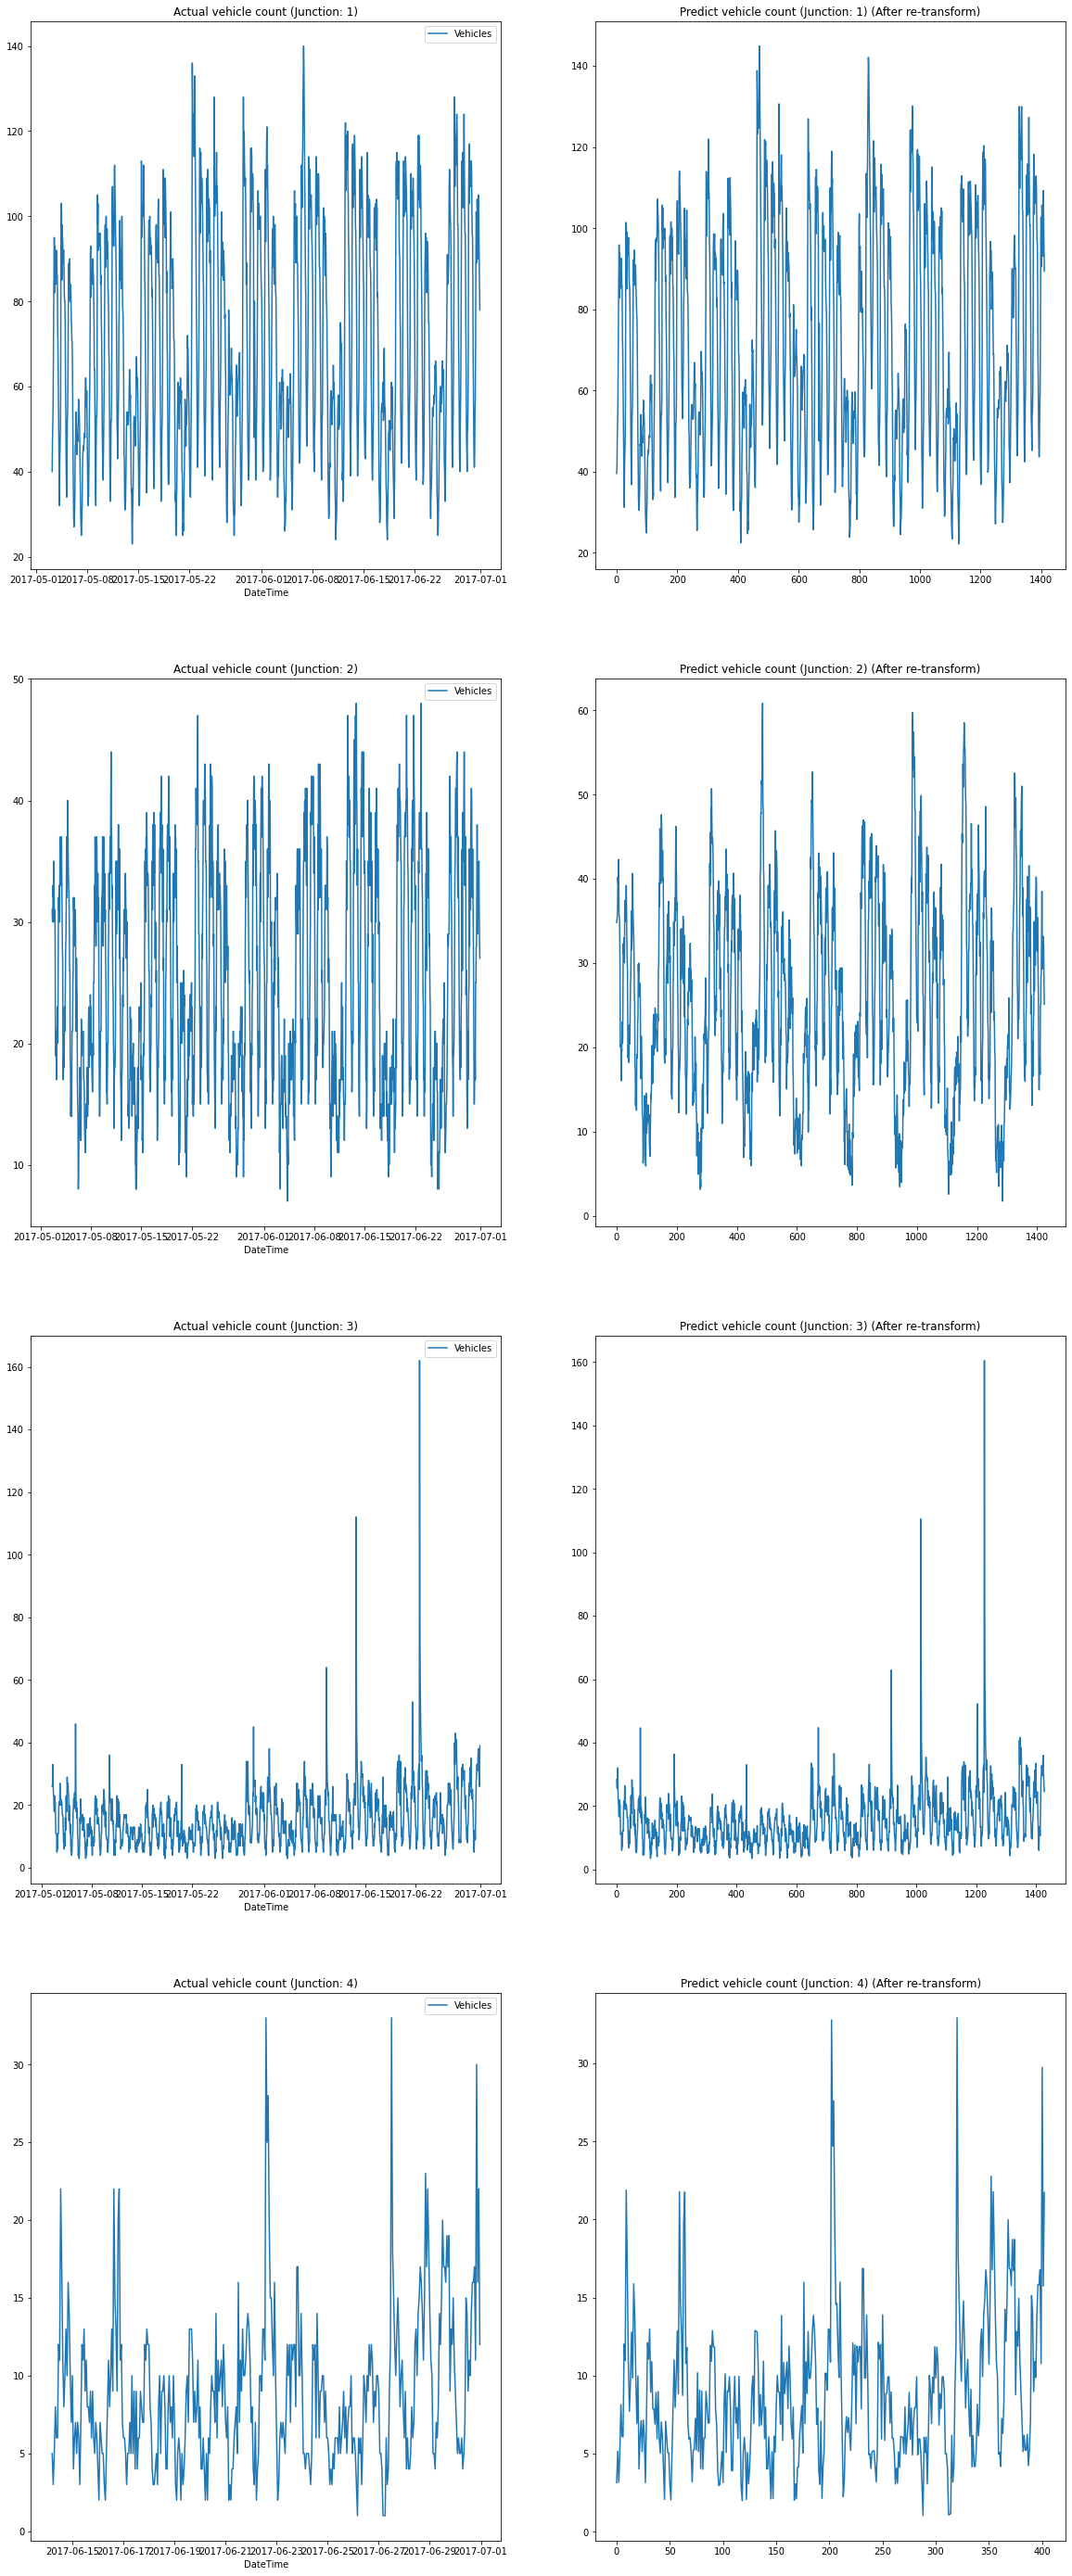

In [ ]:
from itertools import count

plt.figure(figsize=(20, 50))
for i, (J_class, re_trfm_preds) in zip(count(step=2), re_transformed_preds.items()):
  re_trfm_actual = list_dfs[i//2]

  plt.subplot(4,2,i+1)
  sns.lineplot(data=re_trfm_actual[-len(re_trfm_preds):])
  plt.title(f"Actual vehicle count (Junction: {J_class})")

  plt.subplot(4,2,i+2)
  sns.lineplot(data=re_trfm_preds)
  plt.title(f"Predict vehicle count (Junction: {J_class}) (After re-transform)")

#### Saving the models

In [ ]:
model_paths = {}
for J_class, GRU_model in GRU_models.items():
  model_path = f"tf_Junction_{str(J_class)}.h5"
  model_paths[J_class] = model_path
  GRU_model.save(model_path)

In [ ]:
model_paths

{1: 'tf_Junction_1.h5',
 2: 'tf_Junction_2.h5',
 3: 'tf_Junction_3.h5',
 4: 'tf_Junction_4.h5'}

In [ ]:
model_path_dir = {i:path.replace(".h5", "") for i, path in model_paths.items()}
model_path_dir

{1: 'tf_Junction_1',
 2: 'tf_Junction_2',
 3: 'tf_Junction_3',
 4: 'tf_Junction_4'}

In [ ]:
# zipping the model
import os 
#for J_class, path in model_paths.items(): os.system(f"zip {path}.zip {path}")

In [ ]:
# downloading the models
from google.colab import files
for J_class, path in model_paths.items(): files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prophet

### Data Split

In [76]:
list_dfs

[                     Vehicles
 DateTime                     
 2015-11-01 00:00:00      15.0
 2015-11-01 01:00:00      13.0
 2015-11-01 02:00:00      10.0
 2015-11-01 03:00:00       7.0
 2015-11-01 04:00:00       9.0
 ...                       ...
 2017-06-30 19:00:00     105.0
 2017-06-30 20:00:00      96.0
 2017-06-30 21:00:00      90.0
 2017-06-30 22:00:00      84.0
 2017-06-30 23:00:00      78.0
 
 [14592 rows x 1 columns],
                      Vehicles
 DateTime                     
 2015-11-01 00:00:00       6.0
 2015-11-01 01:00:00       6.0
 2015-11-01 02:00:00       5.0
 2015-11-01 03:00:00       6.0
 2015-11-01 04:00:00       7.0
 ...                       ...
 2017-06-30 19:00:00      34.0
 2017-06-30 20:00:00      35.0
 2017-06-30 21:00:00      31.0
 2017-06-30 22:00:00      29.0
 2017-06-30 23:00:00      27.0
 
 [14592 rows x 1 columns],
                      Vehicles
 DateTime                     
 2015-11-01 00:00:00       9.0
 2015-11-01 01:00:00       7.0
 2015-11-01 

In [77]:
list_dfs[0]

Vehicles
DateTime                     
2015-11-01 00:00:00      15.0
2015-11-01 01:00:00      13.0
2015-11-01 02:00:00      10.0
2015-11-01 03:00:00       7.0
2015-11-01 04:00:00       9.0
...                       ...
2017-06-30 19:00:00     105.0
2017-06-30 20:00:00      96.0
2017-06-30 21:00:00      90.0
2017-06-30 22:00:00      84.0
2017-06-30 23:00:00      78.0

[14592 rows x 1 columns]

In [78]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [79]:
from sklearn.model_selection import train_test_split

size = 60
simple_splits = {}
for i, df_J_n in enumerate(list_dfs):
  df_J_n_tmp = df_J_n.resample('D').sum()
  train, test = train_test_split(df_J_n_tmp, test_size=size/len(df_J_n_tmp), shuffle=False)
  
  train["ds"] = train.index
  train["y"] = train["Vehicles"] 
  
  test["ds"] = test.index
  test["y"] = test["Vehicles"]
  
  train = pd.DataFrame(train[["y","ds"]], columns=["y","ds"])
  test = pd.DataFrame(test[["y","ds"]], columns=["y","ds"])


  simple_splits[i] =  {"train":train, "test":test}

In [80]:
simple_splits[0]["train"].head()

y         ds
DateTime                    
2015-11-01  327.0 2015-11-01
2015-11-02  546.0 2015-11-02
2015-11-03  544.0 2015-11-03
2015-11-04  498.0 2015-11-04
2015-11-05  464.0 2015-11-05

In [81]:
simple_splits[0]["train"].tail()

y         ds
DateTime                     
2017-04-27  1693.0 2017-04-27
2017-04-28  1463.0 2017-04-28
2017-04-29  1095.0 2017-04-29
2017-04-30  1041.0 2017-04-30
2017-05-01  1347.0 2017-05-01

In [82]:
simple_splits[0]["test"].head()

y         ds
DateTime                     
2017-05-02  1764.0 2017-05-02
2017-05-03  1747.0 2017-05-03
2017-05-04  1767.0 2017-05-04
2017-05-05  1637.0 2017-05-05
2017-05-06  1098.0 2017-05-06

In [83]:
simple_splits[0]["test"].tail()

y         ds
DateTime                     
2017-06-26  1774.0 2017-06-26
2017-06-27  2187.0 2017-06-27
2017-06-28  2080.0 2017-06-28
2017-06-29  2086.0 2017-06-29
2017-06-30  1883.0 2017-06-30

### Modelling via Prophet
- Just uses DataTime and vehicle count

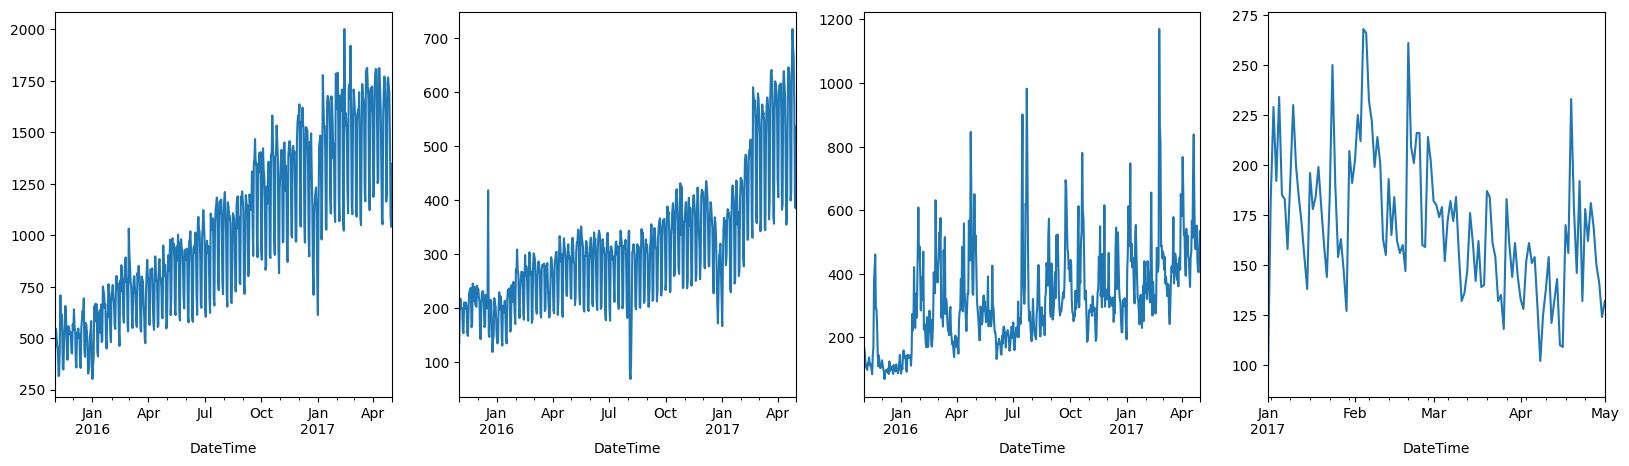

In [123]:
plt.figure(figsize=(20,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  simple_splits[i]["train"]["y"].plot()

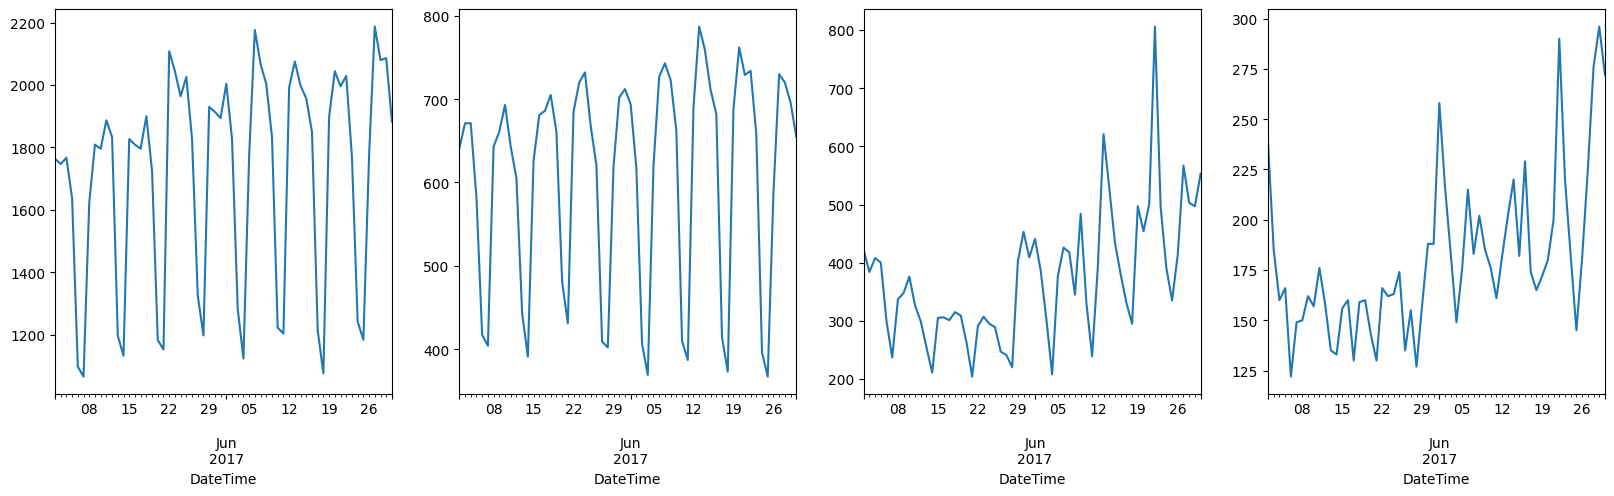

In [124]:
plt.figure(figsize=(20,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  simple_splits[i]["test"]["y"].plot()

#### Training

In [84]:
from prophet import Prophet

Prophet_models = {}
for i, splits in simple_splits.items():
  # Unpackaging the data
  train = splits["train"]
  
  # training
  model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
  Prophet_models[i] = model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd25bx4f0/u5ooz4uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd25bx4f0/5cxxyz38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70261', 'data', 'file=/tmp/tmpd25bx4f0/u5ooz4uu.json', 'init=/tmp/tmpd25bx4f0/5cxxyz38.json', 'output', 'file=/tmp/tmpd25bx4f0/prophet_model4a_abm3e/prophet_model-20230417103155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:31:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd25

#### Prediction

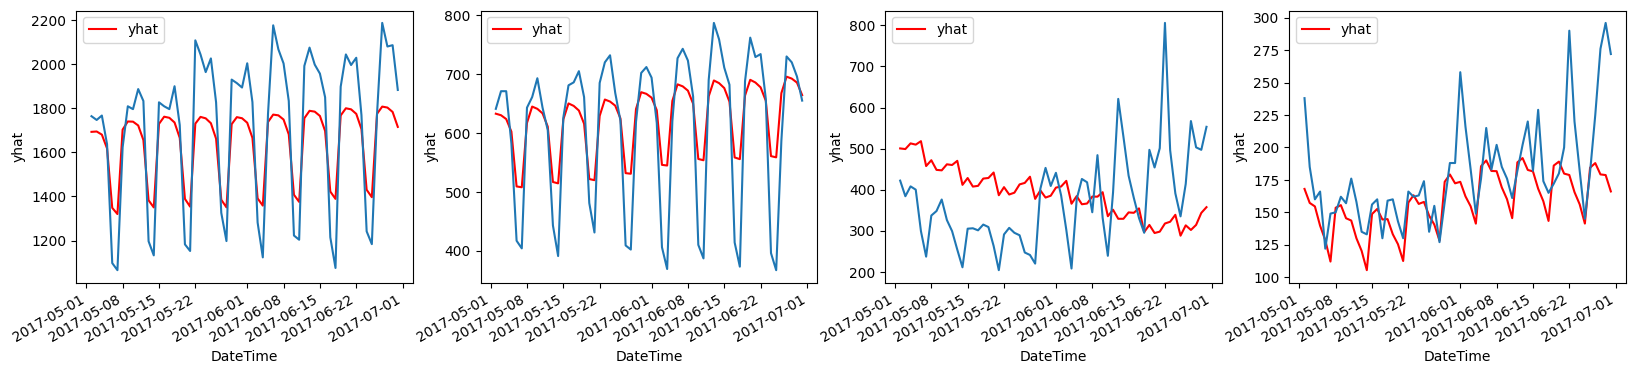

In [129]:
plt.figure(figsize=(20,4))
forecasts = {}
for i, model in Prophet_models.items():
    # Creating next days to forecast
    future = model.make_future_dataframe(periods=60)
    
    # forcasting
    forecast = model.predict(future)
    
    # collecting the resuşts
    forecasts[i] = forecast

    plt.subplot(1,4,i+1)
    sns.lineplot(data = forecast.iloc[-60:,:], x="ds", y="yhat", label="yhat", color='red')
    simple_splits[i]["test"]["y"].plot()

In [ ]:
rs, cs = 1, len(Prophet_models)
plt.figure(figsize=(cs*10, rs*10))
for i, forcast in forecasts.items():

  plt.subplot(rs, cs, i+1)
  actual_y = simple_splits[i]["test"]
  sns.lineplot(data=actual_y, x="ds", y="y", label="actual_y")
  

  pred = forecast.iloc[-60:, :]


  sns.lineplot(data = forecast, x="ds", y="yhat", label="yhat", color='red')
  sns.lineplot(data = forecast, x="ds", y="yhat_lower", label="yhat_lower", color='green')
  sns.lineplot(data = forecast, x="ds", y="yhat_upper", label="yhat_upper", color='orange')

  plt.title("Forecastings")

#### Visualization

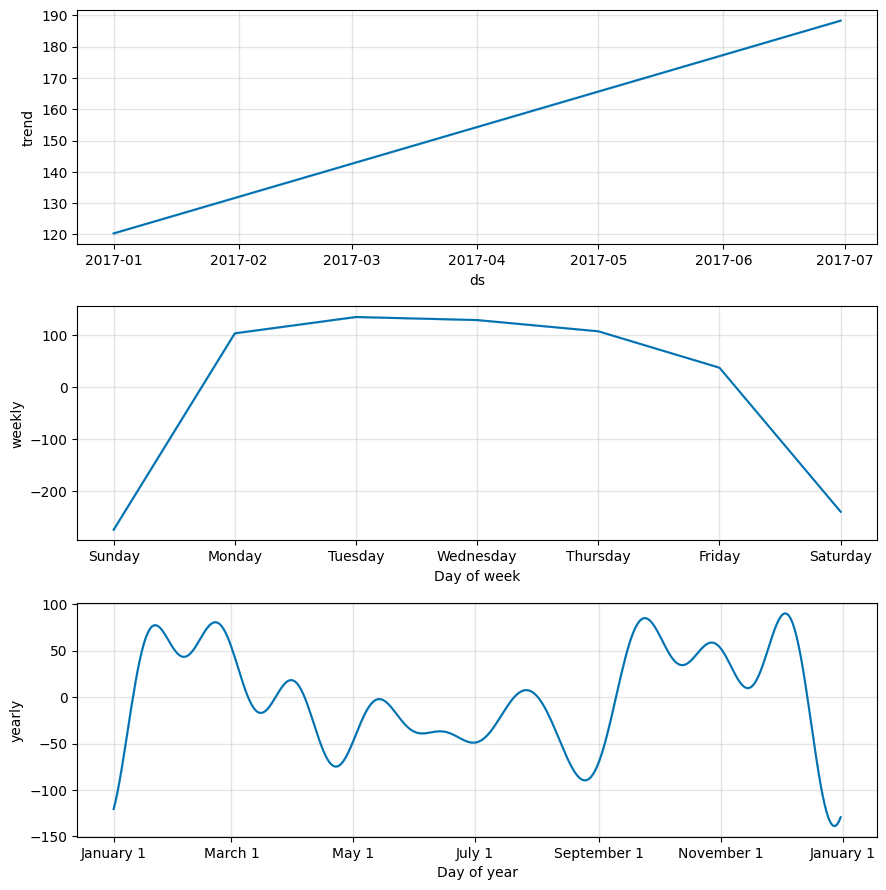

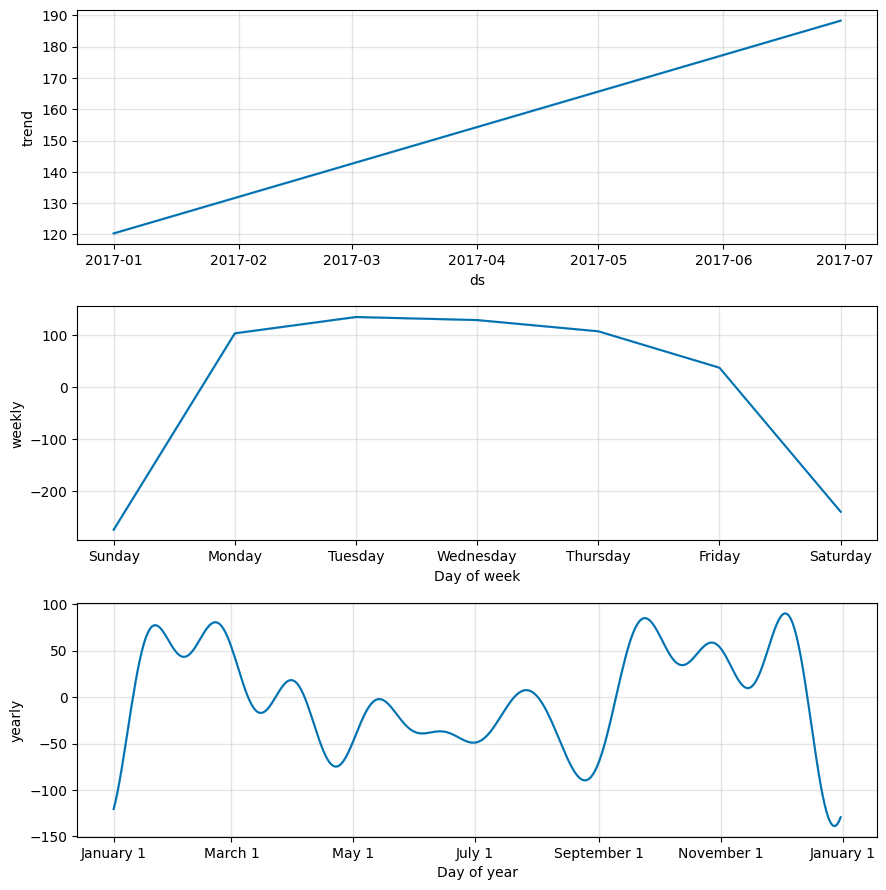

In [86]:
Prophet_models[0].plot_components(forecast)

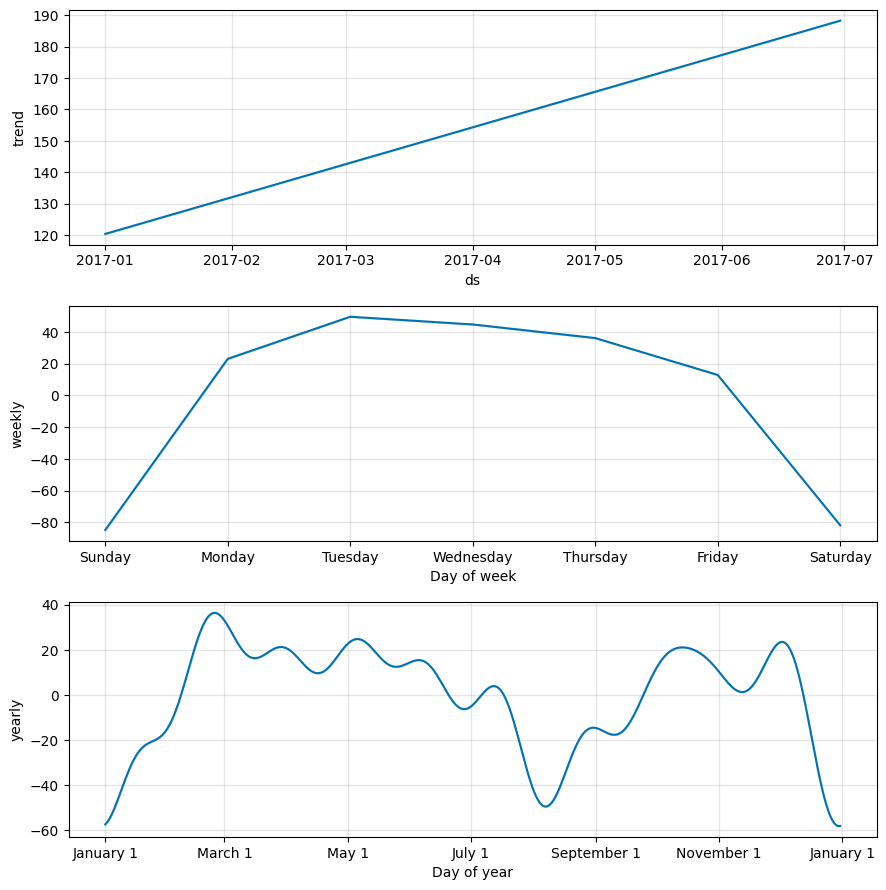

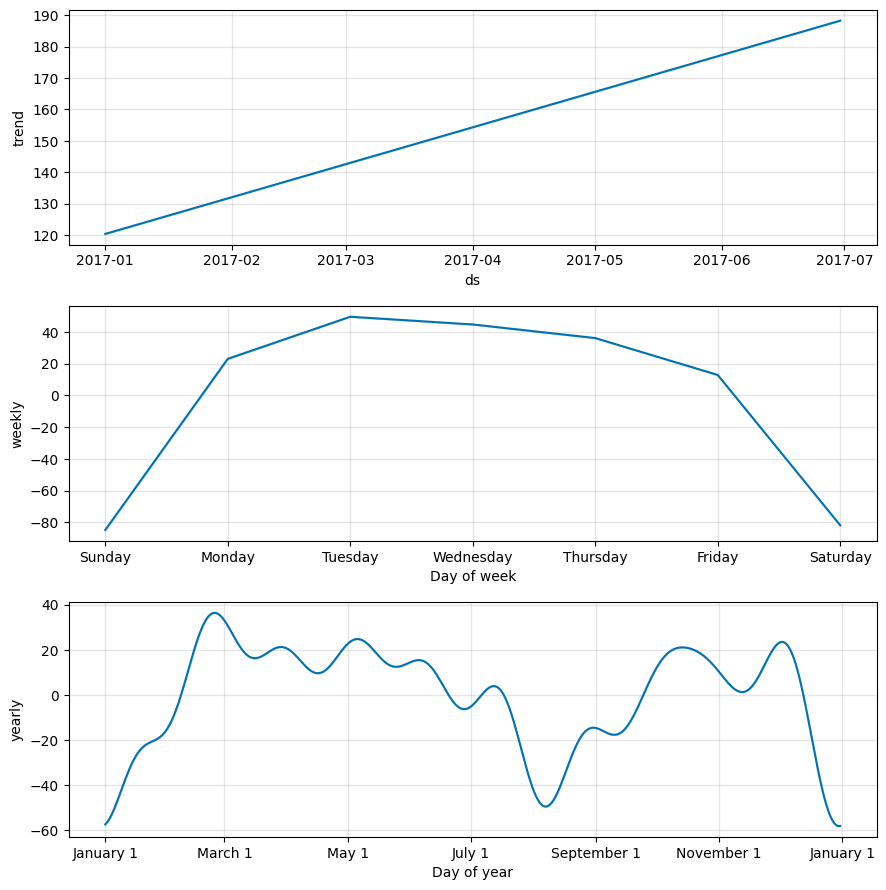

In [87]:
Prophet_models[1].plot_components(forecast)

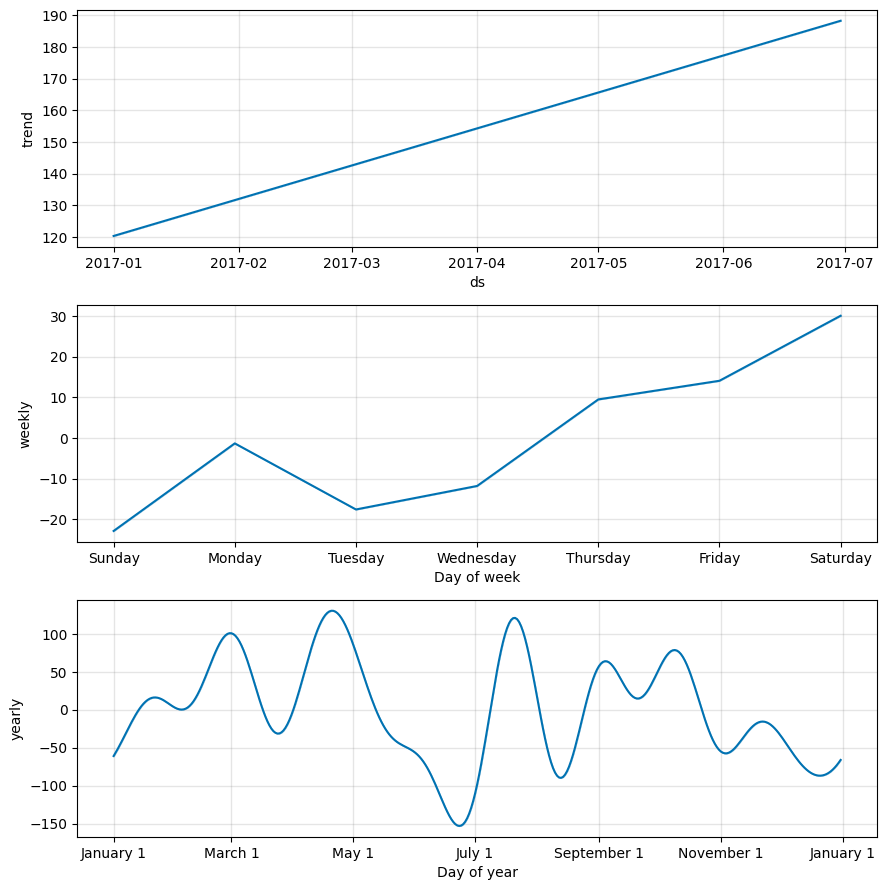

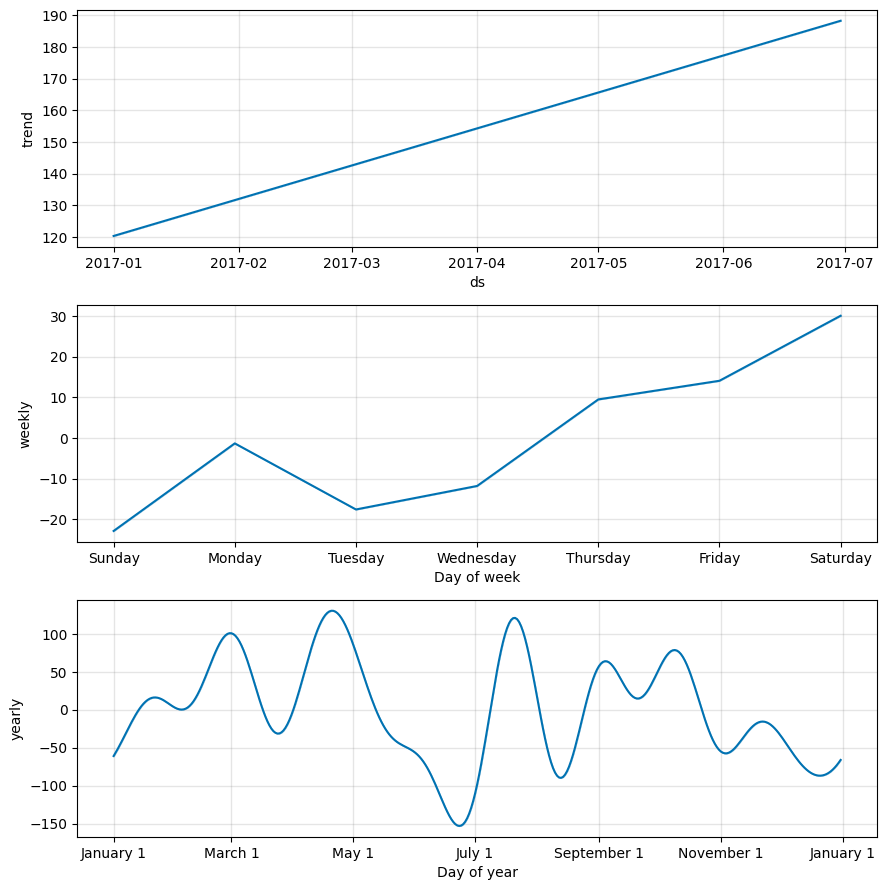

In [88]:
Prophet_models[2].plot_components(forecast)

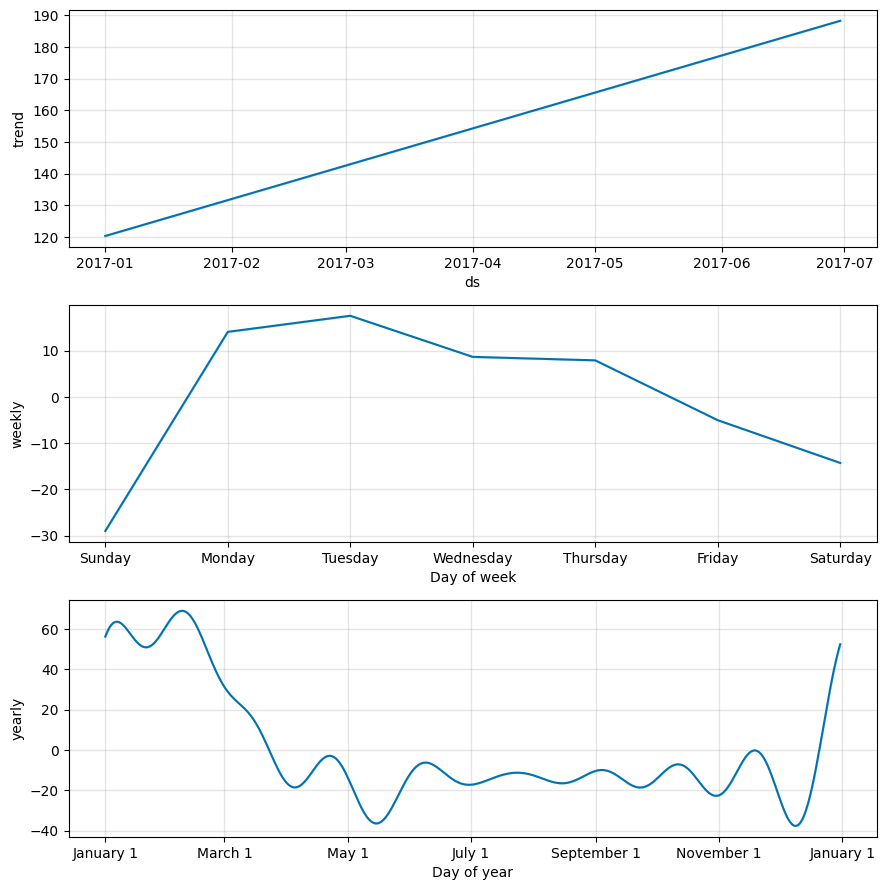

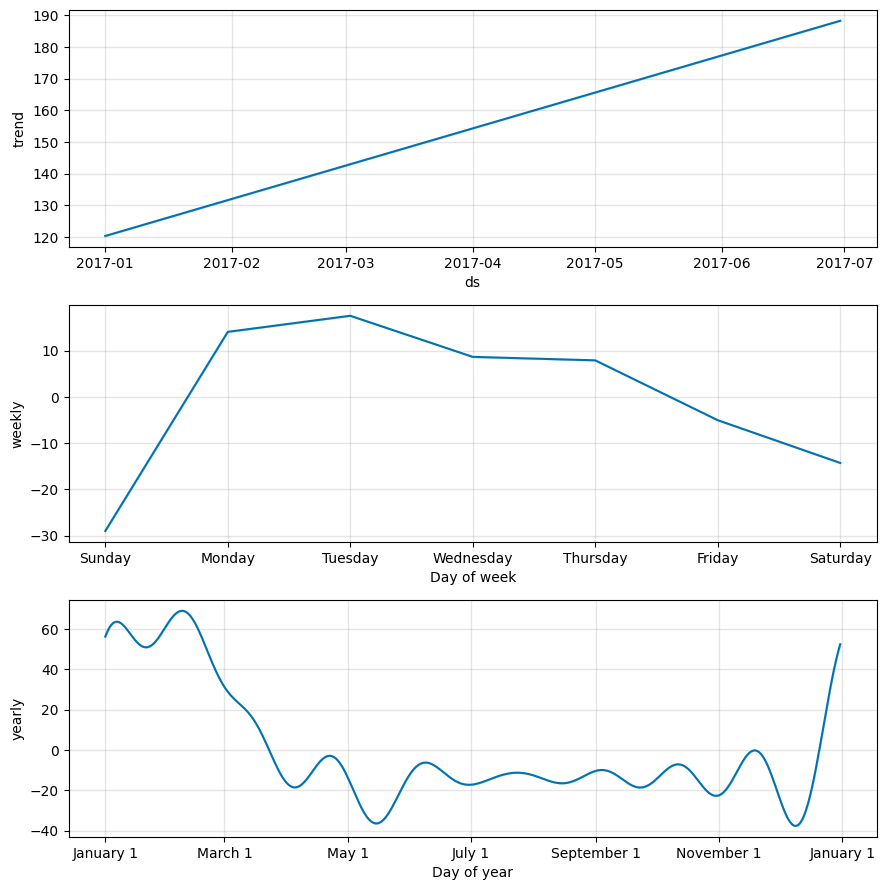

In [89]:
Prophet_models[3].plot_components(forecast)

In [90]:
simple_splits[0]["test"]

y         ds
DateTime                     
2017-05-02  1764.0 2017-05-02
2017-05-03  1747.0 2017-05-03
2017-05-04  1767.0 2017-05-04
2017-05-05  1637.0 2017-05-05
2017-05-06  1098.0 2017-05-06
2017-05-07  1066.0 2017-05-07
2017-05-08  1623.0 2017-05-08
2017-05-09  1809.0 2017-05-09
2017-05-10  1796.0 2017-05-10
2017-05-11  1887.0 2017-05-11
2017-05-12  1833.0 2017-05-12
2017-05-13  1197.0 2017-05-13
2017-05-14  1133.0 2017-05-14
2017-05-15  1827.0 2017-05-15
2017-05-16  1809.0 2017-05-16
2017-05-17  1796.0 2017-05-17
2017-05-18  1900.0 2017-05-18
2017-05-19  1724.0 2017-05-19
2017-05-20  1183.0 2017-05-20
2017-05-21  1153.0 2017-05-21
2017-05-22  2108.0 2017-05-22
2017-05-23  2044.0 2017-05-23
2017-05-24  1964.0 2017-05-24
2017-05-25  2026.0 2017-05-25
2017-05-26  1827.0 2017-05-26
2017-05-27  1326.0 2017-05-27
2017-05-28  1198.0 2017-05-28
2017-05-29  1930.0 2017-05-29
2017-05-30  1914.0 2017-05-30
2017-05-31  1894.0 2017-05-31
2017-06-01  2004.0 2017-06-01
2017-06-02  1828.0 2017-06-02
2017-06-03  1282.0 2017-06-03
2017-06-04  1124.0 2017-06-04
2017-06-05  1774.0 2017-06-05
2017-06-06  2176.0 2017-06-06
2017-06-07  2067.0 2017-06-07
2017-06-08  2003.0 2017-06-08
2017-06-09  1833.0 2017-06-09
2017-06-10  1223.0 2017-06-10
2017-06-11  1204.0 2017-06-11
2017-06-12  1992.0 2017-06-12
2017-06-13  2075.0 2017-06-13
2017-06-14  1998.0 2017-06-14
2017-06-15  1957.0 2017-06-15
2017-06-16  1850.0 2017-06-16
2017-06-17  1215.0 2017-06-17
2017-06-18  1076.0 2017-06-18
2017-06-19  1898.0 2017-06-19
2017-06-20  2044.0 2017-06-20
2017-06-21  1996.0 2017-06-21
2017-06-22  2029.0 2017-06-22
2017-06-23  1769.0 2017-06-23
2017-06-24  1242.0 2017-06-24
2017-06-25  1184.0 2017-06-25
2017-06-26  1774.0 2017-06-26
2017-06-27  2187.0 2017-06-27
2017-06-28  2080.0 2017-06-28
2017-06-29  2086.0 2017-06-29
2017-06-30  1883.0 2017-06-30

In [91]:
time = simple_splits[0]["test"].index[0]
time

Timestamp('2017-05-02 00:00:00', freq='D')

In [92]:
forecasts[0]["ds"].tail(10)

598   2017-06-21
599   2017-06-22
600   2017-06-23
601   2017-06-24
602   2017-06-25
603   2017-06-26
604   2017-06-27
605   2017-06-28
606   2017-06-29
607   2017-06-30
Name: ds, dtype: datetime64[ns]

In [93]:
forecasts[0]["ds"][forecasts[0]["ds"].index==time]

Series([], Name: ds, dtype: datetime64[ns])

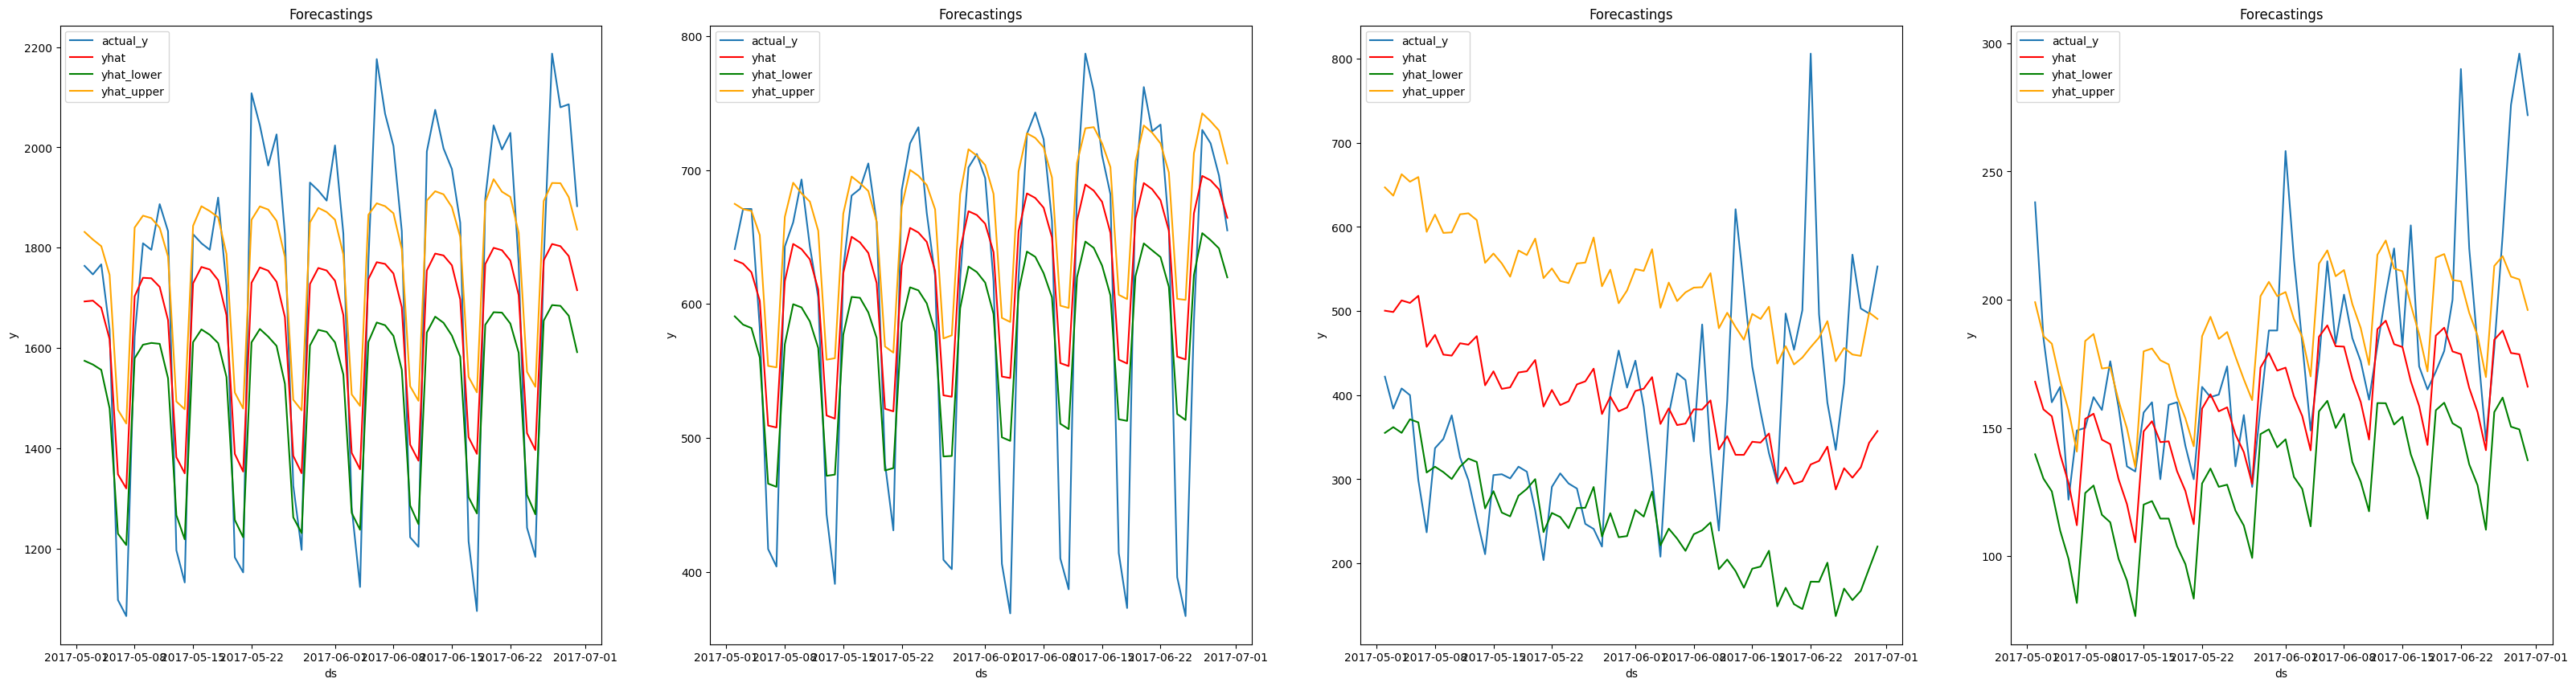

In [131]:
rs, cs = 1, len(Prophet_models)
plt.figure(figsize=(cs*10, rs*10))
for i, forcast in forecasts.items():

  plt.subplot(rs, cs, i+1)
  actual_y = simple_splits[i]["test"]
  sns.lineplot(data=actual_y, x="ds", y="y", label="actual_y")
  

  pred = forcast.iloc[-60:, :]


  sns.lineplot(data = pred, x="ds", y="yhat", label="yhat", color='red')
  sns.lineplot(data = pred, x="ds", y="yhat_lower", label="yhat_lower", color='green')
  sns.lineplot(data = pred, x="ds", y="yhat_upper", label="yhat_upper", color='orange')

  plt.title("Forecastings")

In [101]:
forecasts.keys()

dict_keys([0, 1, 2, 3])

#### Saving the models

In [95]:
import pickle

prophet_model_paths = {}
for J_class, Prophet_model in Prophet_models.items():
  model_path = f"tf_Junction_{str(J_class)}.sav"
  prophet_model_paths[J_class] = model_path
  pickle.dump(Prophet_model, open(model_path, 'wb'))

In [ ]:
# downloading the models
from google.colab import files
for J_class, path in prophet_model_paths.items(): files.download(path)

# (G) Deployment as App

## APP (loading from file)

### Declerations & Util Funcs

In [132]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 

In [133]:
import pickle
import json 
import numpy as np
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import glob

# File Paths
model_paths = [ 'tf_Junction_0.sav', 'tf_Junction_1.sav',
               'tf_Junction_2.sav', 'tf_Junction_3.sav' ]

# Loading the files
models = {i:pickle.load(open(model_path, 'rb')) for i, model_path in zip(range(1,5), model_paths)}

In [134]:

def forecast(J_class, num_days):
  
  # extracting the model
  model = models[int(J_class)]

  # Creating next days to forecast
  future = model.make_future_dataframe(periods=num_days)
  
  # forcasting
  predicts = model.predict(future).iloc[-num_days:,:]
  
  return predicts

def clean_buffer():
  for img in glob.glob('*.png'):
    os.remove(img)

def visualizate(predicts):

  fig = plt.figure()
  sns.lineplot(data = predicts, x="ds", y="yhat", label="yhat", color='red')
  sns.lineplot(data = predicts, x="ds", y="yhat_lower", label="yhat_lower", color='green')
  sns.lineplot(data = predicts, x="ds", y="yhat_upper", label="yhat_upper", color='orange')

  # Save the figure to a buffer
  clean_buffer()

  time = datetime.now().strftime("%H:%M:%S")
  save_path = f"temp_fig_{time}.png"
  
  fig.savefig(save_path, format='png')

  return save_path


In [135]:
def predict(J_class, num_days):
  return visualizate(forecast(J_class, num_days))

In [136]:
Junction_no = gr.inputs.Dropdown(["1","2","3","4"], default="1", label="Junction No:")
num_day =gr.inputs.Slider(minimum=1, maximum=30, default=5, step=1, label="Number of next days to forcest")
inputs = [Junction_no, num_day]

demo = gr.Interface(predict, inputs, "image" ).launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>